# **A species-specific approach to benthic foraminifera pore patterns as a paleoxygenation proxy in the Southeast Pacific**
## Garrido et al.

## Welcome! 
### This script allows you to analyze the pore patterns of foraminifera in relation to various environmental parameters, such as bottom water dissolved oxygen (BWDO). While this code is currently set to analyze BWDO, you can easily modify it to study other variables like nitrate concentration or temperature by making the appropriate changes in the code.
### The Principal Component Analysis includes all environmental variables compared to pore patterns.

#### Preparation Steps:
1. **Main Folder Structure:**
   - Ensure you have a main folder where this script is located. This will serve as the base directory for your work.


2. **Subfolders:**
   - Within the main folder, create a folder named 'Datasets'. This folder will store all your datasets.
   - Inside the 'Datasets' folder, create two additional folders:
     - **'Created datasets':** This folder will be used to save the subsets of your data that you generate with the script.
     - **'Created Figures':** This folder will store the plots and visualizations produced by the script.


3. **Dataset Requirements:**
   - You need to provide a dataset in .csv format. If you don't have your own dataset, you can use ours provided with this script.
   - The details of the columns are explained below to help you understand the required data structure in case you want to run the script with your own data.

### If you want to replace BWDO with other environmental variables, say bottom water nitrate content, we recommend selecting the entire code (Ctrl+A), copying it (Ctrl+C), and then pasting it (Ctrl+V) into a new text document .txt in Notepad. There, you can use the tool Replace (Ctrl+H), so you can select to replace 'DIVA oxygen' with 'NO3' (column with nitrate data). You can do the same with the other variables. 

### Information found in our dataset:
#### Each line represents a column with data.

#### Location

- Sample: Site
- Lat.: Latitude in Degrees N
- Long.: Longitude in degrees E
- Water depth (m)
- cm: centimetre of benthic foraminifera collection 
- Foram_IMG: analysed image
- Cruise: scientific cruise of collection
- Year: year of collection

#### Pore patterns

- POROSITY AVERAGE: averaged porosity (%)
- POROSITY DEV STD: averaged standard deviation for porosity
- Threshold: ImageJ threshold at where measurements were made
- PORE NUMBER AVERAGE: averaged number of pores 
- PORE NUMBER DEV STD: averaged standard deviation for pore number
- DIAMETER AVERAGE: averaged size of each pore, diameter (µm)
- DIAMETER DEV STD: averaged standard deviation for pore size
- TEST AREA AVERAGE: averaged test area measured (µm²)
- TEST AREA DEV STD: averaged standard deviation for the test area
- FORAM SIZE AVERAGE: specimen size (µm)
- FORAM SIZE DEV STD: averaged standard deviation for specimen size
- PORE DENSITY AVERAGE: averaged pore density (pores/µm²)
- PORE DENSITY DEV STD: averaged standard deviation for pore density
  
#### Specimen and measurements details
- Side: measured side (either ventral/umbilical or dorsal/spiral)
- Chamber: measured area (either all chambers/whole umbilical or spiral side, or penultimate and antepenultimate chambers, PAC)
- SpecimenID: ID given to each specimen in this work
- Morphotype: only for C. wuellerstorfi if morphotype is C. wuellerstorfi forma plana or forma convexa
- Species: species analysed
- Status of preservation: how well the specimen is preserved, ranked from 1 to 5 (from poor to excellent preservation).
- Missing chambers VENTRAL: amount of chambers missing on the umbilical side
- Missing chambers DORSAL: amount of chambers missing on the spiral side
- Chambers last whorl: how many chambers are visible on the last whorl
- Image pixel size: resolution of the image
- Image magnification (x): mangification used for the SEM image; for penultimate and antepenultimate chambers is always used 400x
- Stained or Not Stained: Rose Bengal staining status of the specimen
- Fraction: sediment fraction where the specimen was collected: 
- 14C age 0 = Modern (for graphs): age of the sediment sample
- ±: error associated to the 14C age

#### Bulk sediment, available for a few samples 
- Corg-korr: organic carbon
- CaCO3: carbonate content
- Opalgehalt: opal content
- C/Nentk: C/N ratio

#### Granulometry of the sediment, available for a few samples 
- Mean
- Median
- Mean/Median
- Mode
- StanDev
- Skewness
- Kurtosis
- %Clay
- %Silt
- %Sand

#### Environmental parameters
- DIVA oxygen: bottom water oxygen content (µmol/kg)
- Temp: bottom water temperature (°C)
- Salinity: bottom water salinity
- pH: bottom water pH
- CO3: bottom water carbonate content (µmol/kg)
- d13C-DIC: bottom water dissolved inorganic carbon δ¹³C
- NO3: bottom water nitrate content (µmol/kg)
- Phosphate: bottom water phosphate content (µmol/kg)
- SiO4: bottom water silica content (µmol/kg)
- modischlorophyll_CollectionMonth: Chlorophyll content in the collection month
- MODIS Updated CbPM: Ocean Net Primary Productivity (g C/m²/day)

#### El Niño/La Niña, La Vieja/El Viejo indices at the moment of sample's collection  
- ONI3.4
- ONI1.2
- PDO NOAA-NCDC
- PDO Nathan Mantua

#### Others
- Age: age assigned to the specimen by this work
- Comments (P = penultimate, AP = antepenultimate): notes and comments about the specimen

### If you want to compare pore patterns with other variables, we recommend finding oxygen (DIVA oxygen) in the code and entering the desired variable (productivity, temperature, nitrate, etc.) instead.

### Some of the plots will have a regression line; this line can be modified within the code with the "a" and "b" parameters obtained from the calculated regressions in this work. So, in order for the line to represent its proper variability, these parameters must be changed and read from the regression report.

# [0] Importing Dataset
## You need to say if you want to work with a specific species (*Cibicidoides wuellerstorfi*, *Cibicidoides lobatulus*, *Cibicidoides ungerianus*, *Planulina limbata*, *Planulina ornata*, *Planulina ariminensis*). No abbreviations. 
## If you don't want to work with a specific species and you want to analyze a group of species instead, just type 'All species' or the name of your preference and set this in the 'Selecting the specific species or group of species you will use' section. 

In [35]:
import numpy as np
import pandas as pd

# Import the CSV file.

"""
Be aware that the .csv dataset must be in the same folder of this script; if not, name the path: 
'Datasets/Dataset Pore Measurements Garrido et al..csv' if you, for example, created a folder within this folder named 'Datasets'
"""

file_path = 'Datasets/Dataset Pore Measurements Garrido et al..csv' #this is going to read the dataset
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Prompt the user to enter the species name; this is going to ask you to enter the name of a species or group of species. See next.
species_name = input("\nOptions:\nCibicidoides wuellerstorfi (morphotypes: Cibicidoides wuellerstorfi forma plana, Cibicidoides wuellerstorfi forma convexa)\nCibicidoides lobatulus\nCibicidoides ungerianus\nPlanulina ornata\nPlanulina limbata\nPlanulina ariminensis\n \nIf you need to select a group of different species, just type here 'All species' and set the selection later\nin the section 'Selecting the specific species or group of species you will use'\n  \nEnter the species name:")

print(df.head())


Options:
Cibicidoides wuellerstorfi (morphotypes: Cibicidoides wuellerstorfi forma plana, Cibicidoides wuellerstorfi forma convexa)
Cibicidoides lobatulus
Cibicidoides ungerianus
Planulina ornata
Planulina limbata
Planulina ariminensis
 
If you need to select a group of different species, just type here 'All species' and set the selection later
in the section 'Selecting the specific species or group of species you will use'
  
Enter the species name: Cibicidoides lobatulus


        Sample   Lat.  Long.  Water depth (m)      cm          Foram_IMG  \
0  GeoB15022-2 -27.29 -71.05              545  02-Mar  20221103_0001.tif   
1  GeoB15022-2 -27.29 -71.05              545  02-Mar  20221103_0002.tif   
2  GeoB15022-2 -27.29 -71.05              545  02-Mar  20220703_0005.tif   
3  GeoB15022-2 -27.29 -71.05              545  02-Mar  20221503_0002.tif   
4  GeoB15022-2 -27.29 -71.05              545  02-Mar  20221503_0003.tif   

   POROSITY AVERAGE  POROSITY DEV STD  Threshold  PORE NUMBER AVERAGE  ...  \
0         15.148667          0.225778        169             8.666667  ...   
1         16.704333          1.492444        165            11.333333  ...   
2          9.195482          0.801872        167           882.000000  ...   
3         14.547000          0.242000        156             7.500000  ...   
4         17.341333          0.249111        161             9.666667  ...   

   ONI3.4  ONI1.2  PDO NOAA-NCDC  PDO Nathan Mantua     Cruise  Year  \
0 

## Selecting the specific species or group of species you will use

In [38]:
# Subsets based on a combination of species

"""
You must write between the brackets in between " " the name of the species (plural) you want. 
Some combinations will be ready for you to use (only cibicidids, only planulinids, etc).
You must add the # symbol at the beginning of the lines you WON'T use.
If you work with a group of species, your 'species_name' value must be the name of the group you will work with (you can be creative). 
"""

#subset_species = df[df['Species'].isin(["Cibicidoides wuellerstorfi", "Cibicidoides lobatulus", "Planulina ariminensis", "Planulina limbata", "Cibicidoides ungerianus", "Planulina ornata"])]
#subset_species = df[df['Species'].isin(["Cibicidoides wuellerstorfi", "Cibicidoides lobatulus", "Cibicidoides ungerianus"])]
#subset_species = df[df['Species'].isin(["Planulina ariminensis", "Planulina limbata", "Planulina ornata"])]
#subset_species = df[df['Species'].isin(["Planulina ariminensis", "Planulina ornata"])]

'\nYou must write between the brackets in between " " the name of the species (plural) you want. \nSome combinations will be ready for you to use (only cibicidids, only planulinids, etc).\nYou must add the # symbol at the beginning of the lines you WON\'T use.\nIf you work with a group of species, your \'species_name\' value must be the name of the group you will work with (you can be creative). \n'

In [39]:
# Alternatively, if you don't want a group of species, you can select a specific species or subspecies

"""
You must add the # symbol at the beginning of the lines you WON'T use.
If you want either a specific species or subspecies/morphotype, 
your 'species_name' value must be the exact name of the species in the dataset.
"""

#subset_species = df[df['Morphotype'] == species_name]
subset_species = df[df['Species'] == species_name]

## Creating subsets for ventral (umbilical) and dorsal (spiral) sides.

##### The code will create subsets for each type of measurement (entire umbilical or spiral side/all chambers, and also on the penultimate and antepenultimate/PAC) in the folder 'Created datasets'.

In [40]:
""" Ventral (UMBILICAL SIDE; the side facing the water column) """

# Subset based on the "Side" column - Ventral
subset_ventral = subset_species[subset_species['Side'] == 'Ventral']

# Subset based on the "Chamber" column - Ventral and Penultimate or Antepenultimate
subset_ventral_penultimate_antepenultimate = subset_ventral[
    (subset_ventral['Chamber'] == 'Penultimate') | (subset_ventral['Chamber'] == 'Antepenultimate')]

# Check if 'Ventral' column exists in the DataFrame
if 'Ventral' in subset_ventral_penultimate_antepenultimate.columns:
    # Convert 'Ventral' column to numeric, non-numeric values will be converted to NaN
    subset_ventral_penultimate_antepenultimate['Ventral'] = pd.to_numeric(
        subset_ventral_penultimate_antepenultimate['Ventral'], errors='coerce'
    )

# Group by 'Specimen ID' and calculate the mean for numeric values, keep one value for non-numeric values
subset_ventral_penultimate_antepenultimate_averaged = subset_ventral_penultimate_antepenultimate.groupby('SpecimenID').agg(lambda x: x.mean() if pd.api.types.is_numeric_dtype(x) else x.iloc[0]).reset_index()
subset_ventral_penultimate_antepenultimate_std = subset_ventral_penultimate_antepenultimate.groupby('SpecimenID').agg(lambda x: x.std() if pd.api.types.is_numeric_dtype(x) else x.iloc[0]).reset_index()

# Subset based on the "Chamber" column - Ventral and Whole test
subset_ventral_whole_test = subset_ventral[subset_ventral['Chamber'] == 'Whole test']

In [41]:
""" Dorsal (SPIRAL SIDE; the side facing the sediment) """

# Subset based on the "Side" column - Dorsal
subset_dorsal = subset_species[subset_species['Side'] == 'Dorsal']

# Subset based on the "Chamber" column - Dorsal and Penultimate or Antepenultimate
subset_dorsal_penultimate_antepenultimate = subset_dorsal[
    (subset_dorsal['Chamber'] == 'Penultimate') | (subset_dorsal['Chamber'] == 'Antepenultimate')]

# Check if 'Dorsal' column exists in the DataFrame
if 'Dorsal' in subset_dorsal_penultimate_antepenultimate.columns:
    # Convert 'Dorsal' column to numeric, non-numeric values will be converted to NaN
    subset_dorsal_penultimate_antepenultimate['Dorsal'] = pd.to_numeric(subset_dorsal_penultimate_antepenultimate['Dorsal'], errors='coerce')

# Group by 'Specimen ID' and calculate the mean for numeric values, keep one value for non-numeric values
subset_dorsal_penultimate_antepenultimate_averaged = subset_dorsal_penultimate_antepenultimate.groupby('SpecimenID').agg(lambda x: x.mean() if pd.api.types.is_numeric_dtype(x) else x.iloc[0]).reset_index()
subset_dorsal_penultimate_antepenultimate_std = subset_dorsal_penultimate_antepenultimate.groupby('SpecimenID').agg(lambda x: x.std() if pd.api.types.is_numeric_dtype(x) else x.iloc[0]).reset_index()

# Subset based on the "Chamber" column - Dorsal and Whole test
subset_dorsal_whole_test = subset_dorsal[subset_dorsal['Chamber'] == 'Whole test']

In [42]:
""" Saving datasets. It will create 4 datasets:
1. Umbilical side (ventral) penultimate and antepenultimate chambers
2. Umbilical side (ventral) whole test (refers to all chambers measured)
1. Spiral side (dorsal) penultimate and antepenultimate chambers
2. Spiral side (dorsal) whole test (refers to all chambers measured)
"""

# Define filenames based on species name
filename_ventral_penultimate_antepenultimate = f"Datasets/Created datasets/Filtered by species/subset_{species_name}_ventral_penultimate_antepenultimate_averaged.csv"
filename_ventral_whole_test = f"Datasets/Created datasets/Filtered by species/subset_{species_name}_ventral_whole_test.csv"
filename_dorsal_penultimate_antepenultimate = f"Datasets/Created datasets/Filtered by species/subset_{species_name}_dorsal_penultimate_antepenultimate_averaged.csv"
filename_dorsal_whole_test = f"Datasets/Created datasets/Filtered by species/subset_{species_name}_dorsal_whole_test.csv"

# Save the DataFrames as separate CSV files
subset_ventral_penultimate_antepenultimate_averaged.to_csv(filename_ventral_penultimate_antepenultimate, index=False)
subset_ventral_whole_test.to_csv(filename_ventral_whole_test, index=False)
subset_dorsal_penultimate_antepenultimate_averaged.to_csv(filename_dorsal_penultimate_antepenultimate, index=False)
subset_dorsal_whole_test.to_csv(filename_dorsal_whole_test, index=False)

# Print success message
print("Data subsets saved as CSV files.")

Data subsets saved as CSV files.


# [1] BWDO vs pore patterns / penultimate and antepenultimate chambers

### Attention! Each cell will create:

- 4 regressions repprts 
  - Linear for all specimens
  - Linear for all samples (specimens averaged by sample)
  - Logarithmic for all specimens
  - Logarithmic for all samples (specimens averaged by sample)
- A plot

## Umbilical side (ventral) - porosity

WLS Regression for Individual Data Points:
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            WLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     10.51
Date:                Tue, 11 Jun 2024   Prob (F-statistic):            0.00247
Time:                        18:26:03   Log-Likelihood:                -134.67
No. Observations:                  40   AIC:                             273.3
Df Residuals:                      38   BIC:                             276.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Mean Values):
Intercept: 2.2981904435602085 - 15.529166751748935
Coefficient_1: -0.07482947729453587 - 0.016775302918355394
Mean RMSE across Monte Carlo runs (Mean Values): 132.50036013398469
Std RMSE across Monte Carlo runs (Mean Values): 1.6215040067825353
Mean Prediction Interval across Monte Carlo runs (Mean Values): 8.173801631237051
Std Prediction Interval across Monte Carlo runs (Mean Values): 2.164853678094061

Bootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):
Intercept: 3.463597669521522 - 21.01846832116765
Coefficient_1: -0.12226710531357549 - 0.009222657540426086
Mean RMSE across bootstraps (Mean Values): 129.22805988224405
Std RMSE across bootstraps (Mean Values): 21.040821226856412
Mean Prediction Interval across bootstraps (Mean Values): 7.569858793415375
Std Prediction Interval across bootstraps (Mean Values): 1.632974188728046

WLS Logarithmic Regression for Individual Data Points:


C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 0.5200410540893703 - 3.4396515250925934
Coefficient_1: -0.0179943400121443 - 0.0029530536458178902
Mean RMSE across Monte Carlo runs: 133.75821497162949
Std RMSE across Monte Carlo runs: 0.9499413071238648
Mean Prediction Interval across Monte Carlo runs: 1.8899112063500374
Std Prediction Interval across Monte Carlo runs: 0.4643441692129035

Bootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 3.699919566627521 - 21.219909667661195
Coefficient_1: -0.12159291462875729 - 0.008077435232230997
Mean RMSE across bootstraps: 15053014.246038344
Std RMSE across bootstraps: 147669834.7424045
Mean Prediction Interval across bootstraps: 27035352.66493568
Std Prediction Interval across bootstraps: 270804977.198857


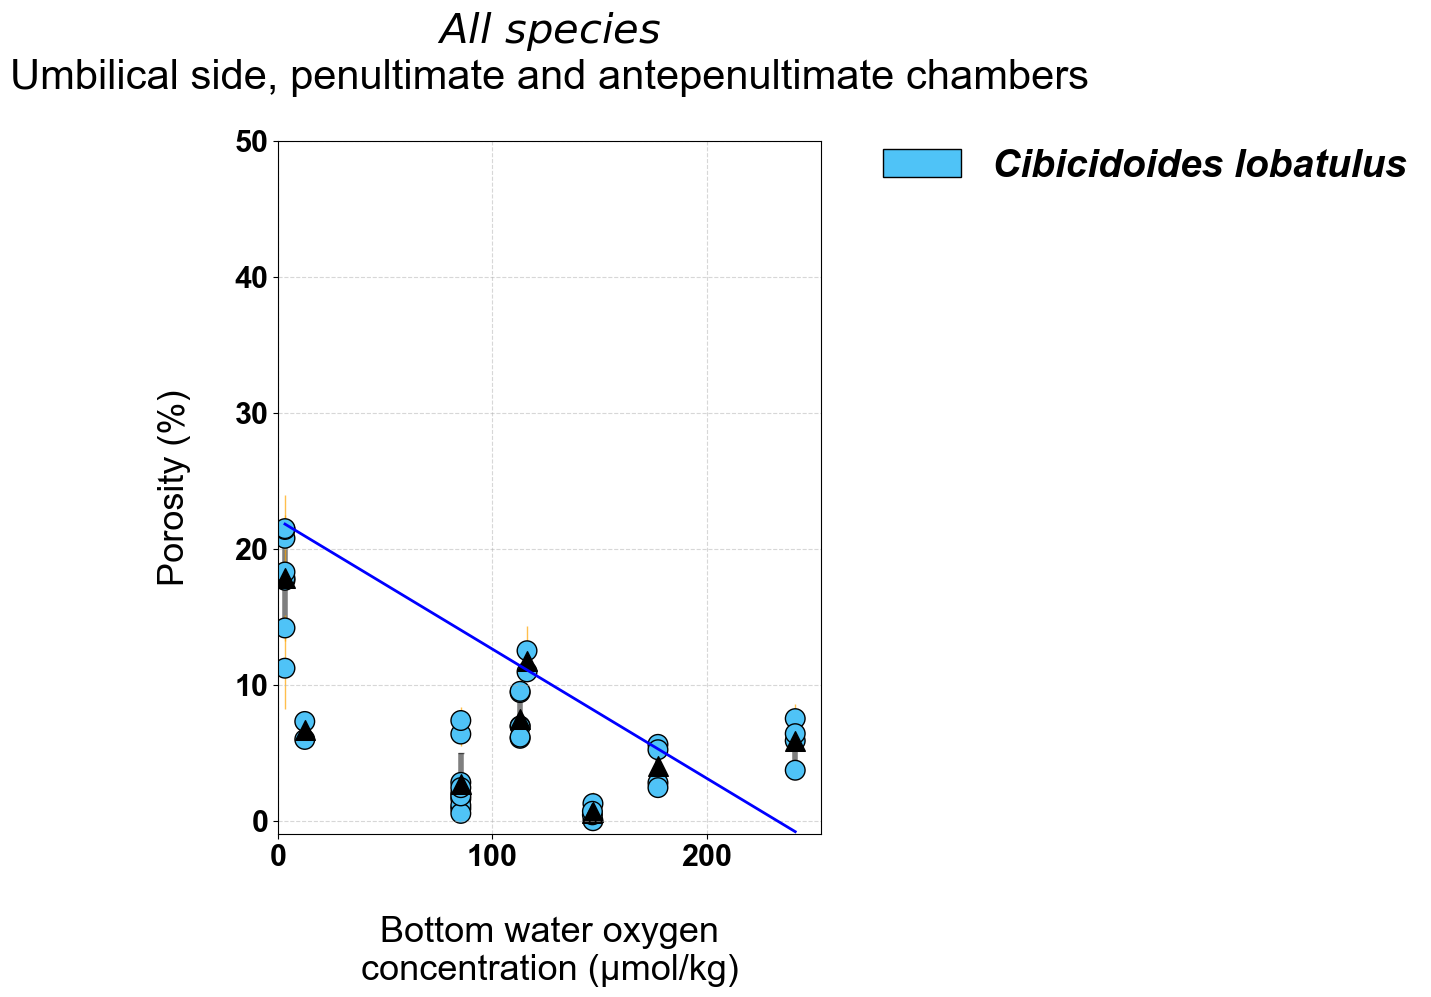

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Defining colors for the morphotypes (only applies for C. wuellerstorfi). 
species_colors = {
    'Cibicidoides lobatulus': '#4FC3F7',
    'Cibicidoides ungerianus': '#FFD54F',
    'Cibicidoides wuellerstorfi': '#EC407A',
    'Cibicidoides wuellerstorfi forma plana': '#B98AB6',
    'Cibicidoides wuellerstorfi forma convexa': '#C53FE3',
    'Planulina ariminensis': '#26A69A',
    'Planulina limbata': '#6D4C41',
    'Planulina ornata': '#AB47BC'
}

# Define the unique species values
unique_species = subset_ventral_penultimate_antepenultimate['Species'].unique()

# Define a color palette with five colors
color_palette = sns.color_palette('Set1', n_colors=len(unique_species))

# Get the species values from the dataframe
species = subset_ventral_penultimate_antepenultimate['Species']

# Create a list of colors corresponding to each species value
colors = [species_colors.get(s, 'black') for s in species]

# First dataset with unique values from the 'Sample' column 
listofsamples = subset_ventral_penultimate_antepenultimate['Sample'].unique()

x = subset_ventral_penultimate_antepenultimate['DIVA oxygen']
y = subset_ventral_penultimate_antepenultimate['POROSITY AVERAGE']
yerror = subset_ventral_penultimate_antepenultimate['POROSITY DEV STD']

porosity_avg = subset_ventral_penultimate_antepenultimate.groupby('Sample')['POROSITY AVERAGE'].mean().reset_index()
porosity_std = subset_ventral_penultimate_antepenultimate.groupby('Sample')['POROSITY AVERAGE'].std().reset_index()
o2_avg = subset_ventral_penultimate_antepenultimate.groupby('Sample')['DIVA oxygen'].mean().reset_index()

a = o2_avg['DIVA oxygen'].to_numpy()  # Convert to numpy array
b = porosity_avg['POROSITY AVERAGE'].to_numpy()  # Convert to numpy array
error_y = porosity_std['POROSITY AVERAGE'].to_numpy()  # Convert to numpy array

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate weights with added epsilon to avoid division by zero for individual data points
weights_individual = 1 / (yerror ** 2 + epsilon)

# Replace any NaN or infinite values in the data arrays with zeros for individual data points
x = np.nan_to_num(x)
y = np.nan_to_num(y)
weights_individual = np.nan_to_num(weights_individual)

# Add a constant to the independent variable (if needed) for individual data points
X_individual = sm.add_constant(x)

# Perform WLS regression for individual data points
model_individual = sm.WLS(y, X_individual, weights=weights_individual, missing='drop')
results_individual = model_individual.fit()

# Get regression summary for individual data points
print("WLS Regression for Individual Data Points:")
print(results_individual.summary())

# Predicted values from the first WLS regression
predicted_values_individual = results_individual.predict(X_individual)

# Calculate RMSE
rmse_individual = np.sqrt(mean_squared_error(x, predicted_values_individual))
print("RMSE for WLS regression for individual data points:", rmse_individual)

# Define generic column names for coefficients
column_names = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_individual.shape[1])]

# Perform Monte Carlo by resampling residuals
num_simulations = 1000  # Number of Monte Carlo simulations
simulated_coefficients = []
simulated_rmse_values = []  # List to store RMSE values
prediction_intervals = []  # List to store prediction intervals

for _ in range(num_simulations):
    # Generate random residuals with the same distribution
    simulated_residuals = np.random.normal(0, np.std(results_individual.resid), len(results_individual.resid))
    simulated_y = results_individual.fittedvalues + simulated_residuals

    # Fit the WLS model to the simulated data
    simulated_model = sm.WLS(simulated_y, X_individual, weights=weights_individual, missing='drop')
    simulated_results = simulated_model.fit()

    # Store the coefficients for each simulation
    simulated_coefficients.append(simulated_results.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values = np.dot(X_individual, simulated_results.params)
    rmse = np.sqrt(mean_squared_error(x, simulated_predicted_values))
    simulated_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval = 1.96 * np.std(simulated_residuals)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients
confidence_intervals = np.percentile(simulated_coefficients, [2.5, 97.5], axis=0)
print("Monte Carlo Confidence Intervals for Coefficients:")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {confidence_intervals[0][i]} - {confidence_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse = np.mean(simulated_rmse_values)
std_rmse = np.std(simulated_rmse_values)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse}")

# Calculate and print prediction intervals
mean_prediction_interval = np.mean(prediction_intervals)
std_prediction_interval = np.std(prediction_intervals)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval}")

# Perform bootstrapping for the first WLS regression for individual data points
num_bootstraps = 1000  # Number of bootstraps
bootstrap_coefficients = []
bootstrap_rmse_values = []  # List to store RMSE values
bootstrap_prediction_intervals = []  # List to store prediction intervals

for _ in range(num_bootstraps):
    # Resample data with replacement
    indices = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample = x[indices]
    bootstrap_y_sample = y[indices]
    bootstrap_weights_sample = weights_individual[indices]
    X_bootstrap_sample = sm.add_constant(bootstrap_x_sample)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model = sm.WLS(bootstrap_y_sample, X_bootstrap_sample, weights=bootstrap_weights_sample, missing='drop')
    bootstrap_results = bootstrap_model.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients.append(bootstrap_results.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values = np.dot(X_bootstrap_sample, bootstrap_results.params)
    rmse = np.sqrt(mean_squared_error(bootstrap_x_sample, bootstrap_predicted_values))
    bootstrap_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals = bootstrap_y_sample - bootstrap_predicted_values
    prediction_interval = 1.96 * np.std(bootstrap_residuals)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals = np.percentile(bootstrap_coefficients, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (First Regression):")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {bootstrap_intervals[0][i]} - {bootstrap_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse = np.mean(bootstrap_rmse_values)
std_bootstrap_rmse = np.std(bootstrap_rmse_values)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval = np.mean(bootstrap_prediction_intervals)
std_bootstrap_prediction_interval = np.std(bootstrap_prediction_intervals)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval}")

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate the sample size (number of specimens) for each site
sample_sizes = subset_ventral_penultimate_antepenultimate.groupby('Sample')['Species'].count().reset_index()

# Calculate the inverse of sample sizes to use as weights for mean values
weights_mean = 1 / (sample_sizes['Species'] + epsilon)  # Use epsilon to avoid division by zero

# Replace any NaN or infinite values in the data arrays with zeros for mean values
a = np.nan_to_num(a)
b = np.nan_to_num(b)
weights_mean = np.nan_to_num(weights_mean)

# Add a constant to the independent variable (if needed) for mean values
X_mean = sm.add_constant(a)

# Perform WLS regression for mean values with sample size-based weights
model_mean_weighted = sm.WLS(b, X_mean, weights=weights_mean, missing='drop')
results_mean_weighted = model_mean_weighted.fit()

# Get regression summary for mean values with sample size-based weights
print("\nLinear WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_mean_weighted.summary())

# Predicted values from the second WLS regression
predicted_values_mean_weighted = results_mean_weighted.predict(X_mean)

# Calculate RMSE for mean values with sample size-based weights
rmse_mean_weighted = np.sqrt(mean_squared_error(a, predicted_values_mean_weighted))
print("RMSE for WLS regression for mean values with sample size-based weights:", rmse_mean_weighted)

# Define generic column names for coefficients
column_names_mean = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_mean.shape[1])]

# Perform Monte Carlo by resampling residuals for mean values
num_simulations_mean = 1000  # Number of Monte Carlo simulations for mean values
simulated_coefficients_mean = []
simulated_rmse_values_mean = []  # List to store RMSE values for mean values
prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_simulations_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_mean = np.random.normal(0, np.std(results_mean_weighted.resid), len(results_mean_weighted.resid))
    simulated_b = results_mean_weighted.fittedvalues + simulated_residuals_mean

    # Fit the WLS model to the simulated data for mean values
    simulated_model_mean = sm.WLS(simulated_b, X_mean, weights=weights_mean, missing='drop')
    simulated_results_mean = simulated_model_mean.fit()

    # Store the coefficients for each simulation for mean values
    simulated_coefficients_mean.append(simulated_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    simulated_predicted_values_mean = np.dot(X_mean, simulated_results_mean.params)
    rmse_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_mean))
    simulated_rmse_values_mean.append(rmse_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    prediction_interval_mean = 1.96 * np.std(simulated_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_mean.append(prediction_interval_mean)

# Calculate and print confidence intervals for coefficients for mean values
confidence_intervals_mean = np.percentile(simulated_coefficients_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {confidence_intervals_mean[0][i]} - {confidence_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values for mean values
mean_rmse_mean = np.mean(simulated_rmse_values_mean)
std_rmse_mean = np.std(simulated_rmse_values_mean)
print(f"Mean RMSE across Monte Carlo runs (Mean Values): {mean_rmse_mean}")
print(f"Std RMSE across Monte Carlo runs (Mean Values): {std_rmse_mean}")

# Calculate and print prediction intervals for mean values
mean_prediction_interval_mean = np.mean(prediction_intervals_mean)
std_prediction_interval_mean = np.std(prediction_intervals_mean)
print(f"Mean Prediction Interval across Monte Carlo runs (Mean Values): {mean_prediction_interval_mean}")
print(f"Std Prediction Interval across Monte Carlo runs (Mean Values): {std_prediction_interval_mean}")

# Perform bootstrapping for the second WLS regression for mean values
num_bootstraps_mean = 1000  # Number of bootstraps for mean values
bootstrap_coefficients_mean = []
bootstrap_rmse_values_mean = []  # List to store RMSE values for mean values
bootstrap_prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_bootstraps_mean):
    # Resample data with replacement for mean values
    indices_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample = a[indices_mean]
    bootstrap_b_sample = b[indices_mean]
    bootstrap_weights_sample_mean = weights_mean[indices_mean]
    X_bootstrap_sample_mean = sm.add_constant(bootstrap_a_sample)

    # Fit the WLS model to the bootstrapped data for mean values
    bootstrap_model_mean = sm.WLS(bootstrap_b_sample, X_bootstrap_sample_mean, weights=bootstrap_weights_sample_mean, missing='drop')
    bootstrap_results_mean = bootstrap_model_mean.fit()

    # Store the coefficients for each bootstrap sample for mean values
    bootstrap_coefficients_mean.append(bootstrap_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    bootstrap_predicted_values_mean = np.dot(X_bootstrap_sample_mean, bootstrap_results_mean.params)
    rmse_mean_bootstrap = np.sqrt(mean_squared_error(bootstrap_a_sample, bootstrap_predicted_values_mean))
    bootstrap_rmse_values_mean.append(rmse_mean_bootstrap)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    bootstrap_residuals_mean = bootstrap_b_sample - bootstrap_predicted_values_mean
    prediction_interval_mean_bootstrap = 1.96 * np.std(bootstrap_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_mean.append(prediction_interval_mean_bootstrap)

# Calculate and print confidence intervals for coefficients for the second regression for mean values
bootstrap_intervals_mean = np.percentile(bootstrap_coefficients_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_mean[0][i]} - {bootstrap_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping for mean values
mean_bootstrap_rmse_mean = np.mean(bootstrap_rmse_values_mean)
std_bootstrap_rmse_mean = np.std(bootstrap_rmse_values_mean)
print(f"Mean RMSE across bootstraps (Mean Values): {mean_bootstrap_rmse_mean}")
print(f"Std RMSE across bootstraps (Mean Values): {std_bootstrap_rmse_mean}")

# Calculate and print prediction intervals for bootstrapping for mean values
mean_bootstrap_prediction_interval_mean = np.mean(bootstrap_prediction_intervals_mean)
std_bootstrap_prediction_interval_mean = np.std(bootstrap_prediction_intervals_mean)
print(f"Mean Prediction Interval across bootstraps (Mean Values): {mean_bootstrap_prediction_interval_mean}")
print(f"Std Prediction Interval across bootstraps (Mean Values): {std_bootstrap_prediction_interval_mean}")

# Define the logarithmic function for the regression model
def logarithmic_model(x, params):
    a, b = params
    return a * np.log(x) + b

# Fit the logarithmic model using WLS for individual data points
log_y = np.log(np.maximum(y, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_individual = np.nan_to_num(weights_individual)
log_weights_individual[log_y == -np.inf] = 0  # Set weights to zero for invalid values
log_X_individual = sm.add_constant(x)
results_log_individual = sm.WLS(log_y, log_X_individual, weights=log_weights_individual, missing='drop').fit()

# Get regression summary for individual data points
print("\nWLS Logarithmic Regression for Individual Data Points:")
print(results_log_individual.summary())

# Predicted values from the first logarithmic regression
predicted_values_log_individual = results_log_individual.predict(log_X_individual)

# Calculate RMSE
rmse_log_individual = np.sqrt(mean_squared_error(x, np.exp(predicted_values_log_individual)))
print("RMSE for logarithmic regression for individual data points:", rmse_log_individual)

# Define generic column names for coefficients
column_names_log = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log = []
simulated_rmse_values_log = []  # List to store RMSE values
prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_simulations_log):
    # Generate random residuals with the same distribution
    simulated_residuals_log = np.random.normal(0, np.std(results_log_individual.resid), len(results_log_individual.resid))
    simulated_log_y = results_log_individual.fittedvalues + simulated_residuals_log

    # Fit the WLS model to the simulated data
    simulated_model_log = sm.WLS(simulated_log_y, log_X_individual, weights=log_weights_individual, missing='drop')
    simulated_results_log = simulated_model_log.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log.append(simulated_results_log.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log = np.exp(simulated_results_log.predict(log_X_individual))
    rmse_log = np.sqrt(mean_squared_error(x, simulated_predicted_values_log))
    simulated_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log = 1.96 * np.std(simulated_residuals_log)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log = np.percentile(simulated_coefficients_log, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {confidence_intervals_log[0][i]} - {confidence_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log = np.mean(simulated_rmse_values_log)
std_rmse_log = np.std(simulated_rmse_values_log)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log}")

# Calculate and print prediction intervals
mean_prediction_interval_log = np.mean(prediction_intervals_log)
std_prediction_interval_log = np.std(prediction_intervals_log)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log}")

# Perform bootstrapping for the first WLS logarithmic regression for individual data points
num_bootstraps_log = 1000  # Number of bootstraps
bootstrap_coefficients_log = []
bootstrap_rmse_values_log = []  # List to store RMSE values
bootstrap_prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_bootstraps_log):
    # Resample data with replacement
    indices_log = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample_log = x[indices_log]
    bootstrap_y_sample_log = y[indices_log]
    bootstrap_weights_sample_log = log_weights_individual[indices_log]
    X_bootstrap_sample_log = sm.add_constant(bootstrap_x_sample_log)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log = sm.WLS(bootstrap_y_sample_log, X_bootstrap_sample_log, weights=bootstrap_weights_sample_log, missing='drop')
    bootstrap_results_log = bootstrap_model_log.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log.append(bootstrap_results_log.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log = np.exp(bootstrap_results_log.predict(X_bootstrap_sample_log))
    rmse_log = np.sqrt(mean_squared_error(bootstrap_x_sample_log, bootstrap_predicted_values_log))
    bootstrap_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log = bootstrap_y_sample_log - bootstrap_predicted_values_log
    prediction_interval_log = 1.96 * np.std(bootstrap_residuals_log)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals_log = np.percentile(bootstrap_coefficients_log, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - First Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {bootstrap_intervals_log[0][i]} - {bootstrap_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log = np.mean(bootstrap_rmse_values_log)
std_bootstrap_rmse_log = np.std(bootstrap_rmse_values_log)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log = np.mean(bootstrap_prediction_intervals_log)
std_bootstrap_prediction_interval_log = np.std(bootstrap_prediction_intervals_log)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log}")

# Fit the logarithmic model using WLS for mean values with sample size-based weights
log_b = np.log(np.maximum(b, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_mean = np.nan_to_num(weights_mean)
log_weights_mean[log_b == -np.inf] = 0  # Set weights to zero for invalid values
log_X_mean = sm.add_constant(a)
results_log_mean_weighted = sm.WLS(log_b, log_X_mean, weights=log_weights_mean, missing='drop').fit()

# Get regression summary for mean values with sample size-based weights
print("\nLogarithmic WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_log_mean_weighted.summary())

# Predicted values from the logarithmic regression
predicted_values_log_mean_weighted = results_log_mean_weighted.predict(log_X_mean)

# Calculate RMSE
rmse_log_mean_weighted = np.sqrt(mean_squared_error(a, np.exp(predicted_values_log_mean_weighted)))
print("RMSE for logarithmic regression for mean values with sample size-based weights:", rmse_log_mean_weighted)

# Define generic column names for coefficients
column_names_log_mean = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log_mean = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log_mean = []
simulated_rmse_values_log_mean = []  # List to store RMSE values
prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_simulations_log_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_log_mean = np.random.normal(0, np.std(results_log_mean_weighted.resid), len(results_log_mean_weighted.resid))
    simulated_log_b = results_log_mean_weighted.fittedvalues + simulated_residuals_log_mean

    # Fit the WLS model to the simulated data
    simulated_model_log_mean = sm.WLS(simulated_log_b, log_X_mean, weights=log_weights_mean, missing='drop')
    simulated_results_log_mean = simulated_model_log_mean.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log_mean.append(simulated_results_log_mean.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log_mean = np.exp(simulated_results_log_mean.predict(log_X_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_log_mean))
    simulated_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log_mean = 1.96 * np.std(simulated_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log_mean = np.percentile(simulated_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {confidence_intervals_log_mean[0][i]} - {confidence_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log_mean = np.mean(simulated_rmse_values_log_mean)
std_rmse_log_mean = np.std(simulated_rmse_values_log_mean)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log_mean}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log_mean}")

# Calculate and print prediction intervals
mean_prediction_interval_log_mean = np.mean(prediction_intervals_log_mean)
std_prediction_interval_log_mean = np.std(prediction_intervals_log_mean)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log_mean}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log_mean}")

# Perform bootstrapping for the logarithmic regression for mean values with sample size-based weights
num_bootstraps_log_mean = 1000  # Number of bootstraps
bootstrap_coefficients_log_mean = []
bootstrap_rmse_values_log_mean = []  # List to store RMSE values
bootstrap_prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_bootstraps_log_mean):
    # Resample data with replacement
    indices_log_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample_log_mean = a[indices_log_mean]
    bootstrap_b_sample_log_mean = b[indices_log_mean]
    bootstrap_weights_sample_log_mean = log_weights_mean[indices_log_mean]
    X_bootstrap_sample_log_mean = sm.add_constant(bootstrap_a_sample_log_mean)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log_mean = sm.WLS(bootstrap_b_sample_log_mean, X_bootstrap_sample_log_mean, weights=bootstrap_weights_sample_log_mean, missing='drop')
    bootstrap_results_log_mean = bootstrap_model_log_mean.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log_mean.append(bootstrap_results_log_mean.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log_mean = np.exp(bootstrap_results_log_mean.predict(X_bootstrap_sample_log_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(bootstrap_a_sample_log_mean, bootstrap_predicted_values_log_mean))
    bootstrap_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log_mean = bootstrap_b_sample_log_mean - bootstrap_predicted_values_log_mean
    prediction_interval_log_mean = 1.96 * np.std(bootstrap_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients for the bootstrapped regression
bootstrap_intervals_log_mean = np.percentile(bootstrap_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_log_mean[0][i]} - {bootstrap_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log_mean = np.mean(bootstrap_rmse_values_log_mean)
std_bootstrap_rmse_log_mean = np.std(bootstrap_rmse_values_log_mean)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log_mean}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log_mean}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log_mean = np.mean(bootstrap_prediction_intervals_log_mean)
std_bootstrap_prediction_interval_log_mean = np.std(bootstrap_prediction_intervals_log_mean)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log_mean}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log_mean}")

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(7, 9))
ax.scatter(x, y, c=colors, s=200, alpha=1, marker='o', label="Individual measurement", zorder=0, edgecolors='black', linewidths=1)
ax.errorbar(x, y, yerr=yerror, fmt='none', color='orange', alpha=0.7, capsize=0, zorder=-1, linewidth=1, label="Porosity dev. std.")
ax.scatter(a, b, color='black', s=200, alpha=1, marker='^', label="Mean by site", zorder=1)  # Customize marker color, transparency, and edge color
ax.errorbar(a, b, yerr=error_y, fmt='none', color='black', alpha=0.5, capsize=2, zorder=-5, linewidth=4, label="Porosity dev. std.")

# Extract coefficients from WLS regression results
intercept, slope = 7.1567, -0.1387  # Replace with actual coefficients from your WLS regression results

# Generate predicted y values for the regression line
# We use the range of x values for generating a smooth line
x_range = np.linspace(min(x), max(x), 500)  # Replace 'min(x)' and 'max(x)' with the actual range of your 'x' data
predicted_log_y = intercept + slope * x_range

# Convert predicted logarithmic values back to the original scale using exponential
predicted_y = np.exp(predicted_log_y)

# Plot the regression line on the existing scatter plot
#ax.plot(x_range, predicted_y, color='red', linewidth=2, label='Logarithmic Regression Line')

# Extract coefficients from WLS regression results for mean values
intercept_mean, slope_mean =  22.1303, -0.0950

# Generate x values for the prediction
x_range_mean = np.linspace(min(a), max(a), 500)  # Ensure 'a' is your 'x' data for mean values

# Calculate the predicted y values for the regression line
predicted_y_mean = intercept_mean + slope_mean * x_range_mean

# Plot the regression line for mean values on the existing scatter plot
ax.plot(x_range_mean, predicted_y_mean, color='blue', linewidth=2, label='Linear Regression Line (Mean Values)')

# Add error bars on the y-axis
ax.set_ylim(0, 50)
ax.set_xlabel('\nBottom water oxygen\nconcentration (µmol/kg)', fontsize=26, fontname='Arial')
ax.set_ylabel('Porosity (%)\n', fontsize=26, fontname='Arial')
ax.set_title(r'$\mathit{All\ species}$' + '\nUmbilical side, penultimate and antepenultimate chambers\n', fontsize=30, fontname='Arial')

# Customize tick label font size
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)

# Change tick label font to Arial
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontname('Arial')
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontname('Arial')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5, zorder=-5)

# Create color-coded patches (circles) with italic labels for the legend
legend_patches = [mpatches.Circle((0.5, 0.5), radius=0.25, facecolor=species_colors[species], edgecolor='black') for species in unique_species]
legend_labels = [f"{species}" for species in unique_species]

# Customize legend patches and labels
for patch in legend_patches:
    patch.set_label('')  # Clear default label
    patch.set_facecolor(patch.get_facecolor())
    patch.set_edgecolor(patch.get_edgecolor())

# Add legend with color-coded labels in italic
ax.legend(handles=legend_patches, labels=legend_labels, bbox_to_anchor=(1.05, 1.04), loc='upper left', frameon=False, prop={'family': 'Arial', 'size': 28, 'style': 'italic'})

ax.set_xlim(left=0)  # Set the left limit of the x-axis to 0
ax.set_ylim(bottom=-1)  # Set the bottom limit of the y-axis to 0

#plt.savefig("Plots/PAP Umbilical Porosity Oxygen.jpg", dpi=700, bbox_inches='tight')

save_path = f"Datasets/Created Figures/Porosity {species_name} PAP Umbilical.jpg"
plt.savefig(save_path, dpi=999, bbox_inches='tight')

plt.show()

## Spiral side (dorsal) - porosity

WLS Regression for Individual Data Points:
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            WLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                   0.04984
Date:                Tue, 11 Jun 2024   Prob (F-statistic):              0.825
Time:                        18:26:09   Log-Likelihood:                -104.82
No. Observations:                  32   AIC:                             213.6
Df Residuals:                      30   BIC:                             216.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Mean Values):
Intercept: 6.442260132643125 - 15.56641349529015
Coefficient_1: -0.047799433193951135 - 0.022281893083202785
Mean RMSE across Monte Carlo runs (Mean Values): 122.66249381458474
Std RMSE across Monte Carlo runs (Mean Values): 1.266767856907769
Mean Prediction Interval across Monte Carlo runs (Mean Values): 5.828085133134222
Std Prediction Interval across Monte Carlo runs (Mean Values): 1.5505141068873136

Bootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):
Intercept: 7.45220978114206 - 19.655745176085954
Coefficient_1: -0.06397786695879965 - 0.022492385428908305
Mean RMSE across bootstraps (Mean Values): 119.89917116254844
Std RMSE across bootstraps (Mean Values): 23.770909364021477
Mean Prediction Interval across bootstraps (Mean Values): 5.392049307770021
Std Prediction Interval across bootstraps (Mean Values): 1.482948973687309

WLS Logarithmic Regression for Individual Data Points:
 

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 1.9200618577853918 - 2.7719950525554817
Coefficient_1: -0.004557955243230662 - 0.001865098938774349
Mean RMSE across Monte Carlo runs: 122.85734925738858
Std RMSE across Monte Carlo runs: 1.0641316426024654
Mean Prediction Interval across Monte Carlo runs: 0.5615329462987426
Std Prediction Interval across Monte Carlo runs: 0.14411454280852828

Bootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 7.250458314299721 - 18.915681665160374
Coefficient_1: -0.062293950635507356 - 0.022763873966489576
Mean RMSE across bootstraps: 1146231.3301906763
Std RMSE across bootstraps: 2543945.984856099
Mean Prediction Interval across bootstraps: 1989567.267564887
Std Prediction Interval across bootstraps: 4587284.91782449


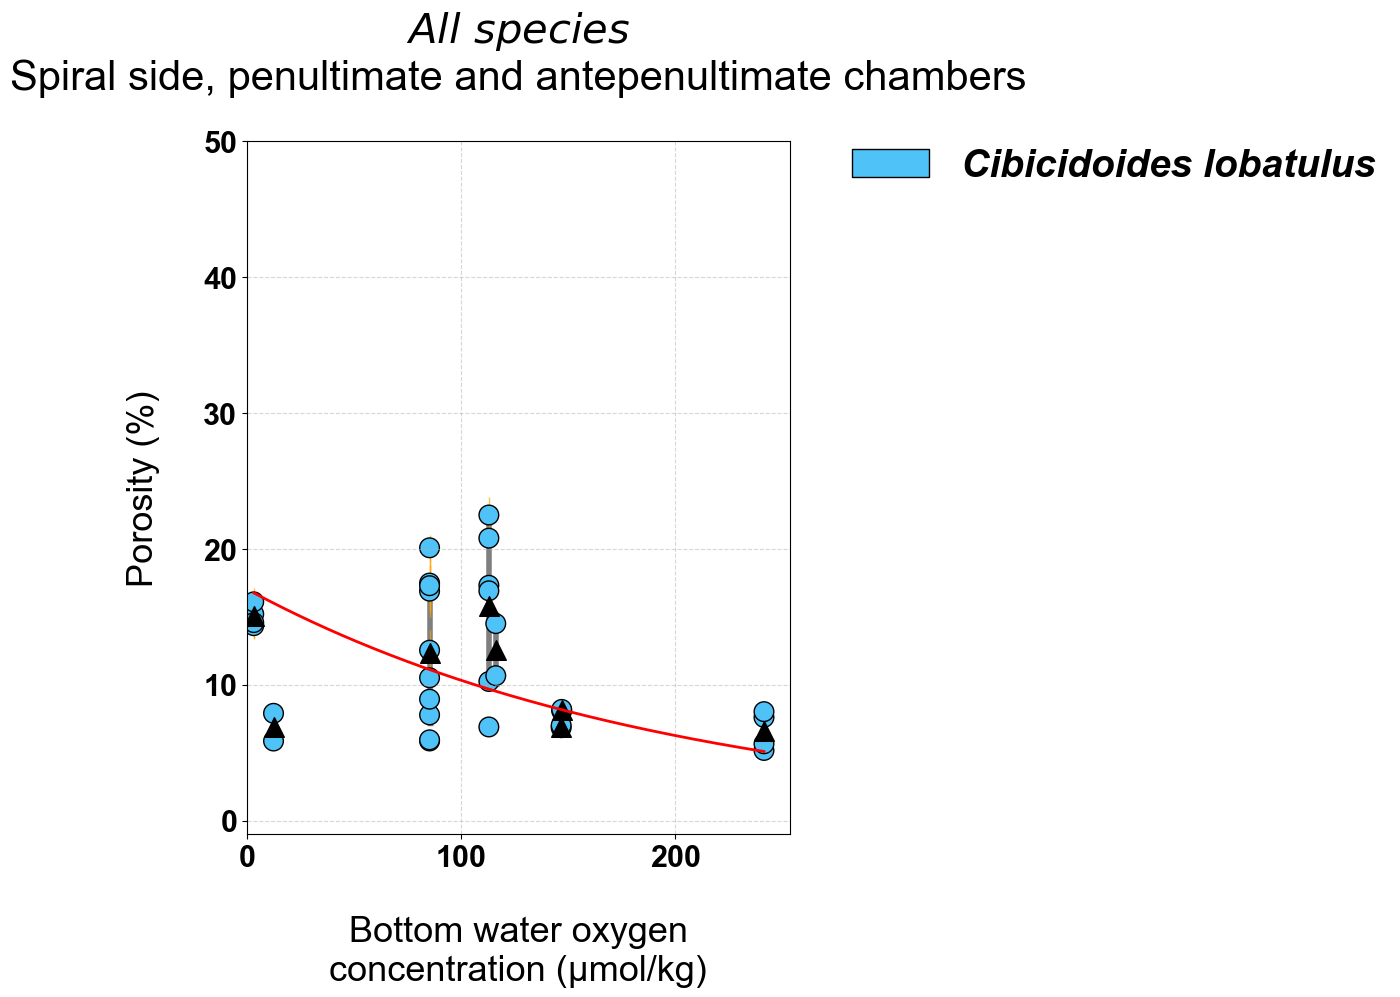

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Create a dictionary mapping each species to a color
species_colors = {
    'Cibicidoides lobatulus': '#4FC3F7',
    'Cibicidoides ungerianus': '#FFD54F',
    'Cibicidoides wuellerstorfi': '#EC407A',
    'Cibicidoides wuellerstorfi forma plana': '#B98AB6',
    'Cibicidoides wuellerstorfi forma convexa': '#C53FE3',
    'Planulina ariminensis': '#26A69A',
    'Planulina limbata': '#6D4C41',
    'Planulina ornata': '#AB47BC'
}


# Define the unique species values
unique_species = subset_dorsal_penultimate_antepenultimate['Species'].unique()

# Define a color palette with five colors
color_palette = sns.color_palette('Set1', n_colors=len(unique_species))

# Get the species values from the dataframe
species = subset_dorsal_penultimate_antepenultimate['Species']

# Create a list of colors corresponding to each species value
colors = [species_colors.get(s, 'black') for s in species]

# First dataset with unique values from the 'Sample' column
listofsamples = subset_dorsal_penultimate_antepenultimate['Sample'].unique()

x = subset_dorsal_penultimate_antepenultimate['DIVA oxygen']
y = subset_dorsal_penultimate_antepenultimate['POROSITY AVERAGE']
yerror = subset_dorsal_penultimate_antepenultimate['POROSITY DEV STD']

porosity_avg = subset_dorsal_penultimate_antepenultimate.groupby('Sample')['POROSITY AVERAGE'].mean().reset_index()
porosity_std = subset_dorsal_penultimate_antepenultimate.groupby('Sample')['POROSITY AVERAGE'].std().reset_index()
o2_avg = subset_dorsal_penultimate_antepenultimate.groupby('Sample')['DIVA oxygen'].mean().reset_index()

a = o2_avg['DIVA oxygen'].to_numpy()  # Convert to numpy array
b = porosity_avg['POROSITY AVERAGE'].to_numpy()  # Convert to numpy array
error_y = porosity_std['POROSITY AVERAGE'].to_numpy()  # Convert to numpy array

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate weights with added epsilon to avoid division by zero for individual data points
weights_individual = 1 / (yerror ** 2 + epsilon)

# Replace any NaN or infinite values in the data arrays with zeros for individual data points
x = np.nan_to_num(x)
y = np.nan_to_num(y)
weights_individual = np.nan_to_num(weights_individual)

# Add a constant to the independent variable (if needed) for individual data points
X_individual = sm.add_constant(x)

# Perform WLS regression for individual data points
model_individual = sm.WLS(y, X_individual, weights=weights_individual, missing='drop')
results_individual = model_individual.fit()

# Get regression summary for individual data points
print("WLS Regression for Individual Data Points:")
print(results_individual.summary())

# Predicted values from the first WLS regression
predicted_values_individual = results_individual.predict(X_individual)

# Calculate RMSE
rmse_individual = np.sqrt(mean_squared_error(x, predicted_values_individual))
print("RMSE for WLS regression for individual data points:", rmse_individual)

# Define generic column names for coefficients
column_names = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_individual.shape[1])]

# Perform Monte Carlo by resampling residuals
num_simulations = 1000  # Number of Monte Carlo simulations
simulated_coefficients = []
simulated_rmse_values = []  # List to store RMSE values
prediction_intervals = []  # List to store prediction intervals

for _ in range(num_simulations):
    # Generate random residuals with the same distribution
    simulated_residuals = np.random.normal(0, np.std(results_individual.resid), len(results_individual.resid))
    simulated_y = results_individual.fittedvalues + simulated_residuals

    # Fit the WLS model to the simulated data
    simulated_model = sm.WLS(simulated_y, X_individual, weights=weights_individual, missing='drop')
    simulated_results = simulated_model.fit()

    # Store the coefficients for each simulation
    simulated_coefficients.append(simulated_results.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values = np.dot(X_individual, simulated_results.params)
    rmse = np.sqrt(mean_squared_error(x, simulated_predicted_values))
    simulated_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval = 1.96 * np.std(simulated_residuals)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients
confidence_intervals = np.percentile(simulated_coefficients, [2.5, 97.5], axis=0)
print("Monte Carlo Confidence Intervals for Coefficients:")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {confidence_intervals[0][i]} - {confidence_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse = np.mean(simulated_rmse_values)
std_rmse = np.std(simulated_rmse_values)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse}")

# Calculate and print prediction intervals
mean_prediction_interval = np.mean(prediction_intervals)
std_prediction_interval = np.std(prediction_intervals)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval}")

# Perform bootstrapping for the first WLS regression for individual data points
num_bootstraps = 1000  # Number of bootstraps
bootstrap_coefficients = []
bootstrap_rmse_values = []  # List to store RMSE values
bootstrap_prediction_intervals = []  # List to store prediction intervals

for _ in range(num_bootstraps):
    # Resample data with replacement
    indices = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample = x[indices]
    bootstrap_y_sample = y[indices]
    bootstrap_weights_sample = weights_individual[indices]
    X_bootstrap_sample = sm.add_constant(bootstrap_x_sample)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model = sm.WLS(bootstrap_y_sample, X_bootstrap_sample, weights=bootstrap_weights_sample, missing='drop')
    bootstrap_results = bootstrap_model.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients.append(bootstrap_results.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values = np.dot(X_bootstrap_sample, bootstrap_results.params)
    rmse = np.sqrt(mean_squared_error(bootstrap_x_sample, bootstrap_predicted_values))
    bootstrap_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals = bootstrap_y_sample - bootstrap_predicted_values
    prediction_interval = 1.96 * np.std(bootstrap_residuals)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals = np.percentile(bootstrap_coefficients, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (First Regression):")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {bootstrap_intervals[0][i]} - {bootstrap_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse = np.mean(bootstrap_rmse_values)
std_bootstrap_rmse = np.std(bootstrap_rmse_values)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval = np.mean(bootstrap_prediction_intervals)
std_bootstrap_prediction_interval = np.std(bootstrap_prediction_intervals)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval}")

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate the sample size (number of specimens) for each site
sample_sizes = subset_dorsal_penultimate_antepenultimate.groupby('Sample')['Species'].count().reset_index()

# Calculate the inverse of sample sizes to use as weights for mean values
weights_mean = 1 / (sample_sizes['Species'] + epsilon)  # Use epsilon to avoid division by zero

# Replace any NaN or infinite values in the data arrays with zeros for mean values
a = np.nan_to_num(a)
b = np.nan_to_num(b)
weights_mean = np.nan_to_num(weights_mean)

# Add a constant to the independent variable (if needed) for mean values
X_mean = sm.add_constant(a)

# Perform WLS regression for mean values with sample size-based weights
model_mean_weighted = sm.WLS(b, X_mean, weights=weights_mean, missing='drop')
results_mean_weighted = model_mean_weighted.fit()

# Get regression summary for mean values with sample size-based weights
print("\nLinear WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_mean_weighted.summary())

# Predicted values from the second WLS regression
predicted_values_mean_weighted = results_mean_weighted.predict(X_mean)

# Calculate RMSE for mean values with sample size-based weights
rmse_mean_weighted = np.sqrt(mean_squared_error(a, predicted_values_mean_weighted))
print("RMSE for WLS regression for mean values with sample size-based weights:", rmse_mean_weighted)

# Define generic column names for coefficients
column_names_mean = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_mean.shape[1])]

# Perform Monte Carlo by resampling residuals for mean values
num_simulations_mean = 1000  # Number of Monte Carlo simulations for mean values
simulated_coefficients_mean = []
simulated_rmse_values_mean = []  # List to store RMSE values for mean values
prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_simulations_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_mean = np.random.normal(0, np.std(results_mean_weighted.resid), len(results_mean_weighted.resid))
    simulated_b = results_mean_weighted.fittedvalues + simulated_residuals_mean

    # Fit the WLS model to the simulated data for mean values
    simulated_model_mean = sm.WLS(simulated_b, X_mean, weights=weights_mean, missing='drop')
    simulated_results_mean = simulated_model_mean.fit()

    # Store the coefficients for each simulation for mean values
    simulated_coefficients_mean.append(simulated_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    simulated_predicted_values_mean = np.dot(X_mean, simulated_results_mean.params)
    rmse_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_mean))
    simulated_rmse_values_mean.append(rmse_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    prediction_interval_mean = 1.96 * np.std(simulated_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_mean.append(prediction_interval_mean)

# Calculate and print confidence intervals for coefficients for mean values
confidence_intervals_mean = np.percentile(simulated_coefficients_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {confidence_intervals_mean[0][i]} - {confidence_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values for mean values
mean_rmse_mean = np.mean(simulated_rmse_values_mean)
std_rmse_mean = np.std(simulated_rmse_values_mean)
print(f"Mean RMSE across Monte Carlo runs (Mean Values): {mean_rmse_mean}")
print(f"Std RMSE across Monte Carlo runs (Mean Values): {std_rmse_mean}")

# Calculate and print prediction intervals for mean values
mean_prediction_interval_mean = np.mean(prediction_intervals_mean)
std_prediction_interval_mean = np.std(prediction_intervals_mean)
print(f"Mean Prediction Interval across Monte Carlo runs (Mean Values): {mean_prediction_interval_mean}")
print(f"Std Prediction Interval across Monte Carlo runs (Mean Values): {std_prediction_interval_mean}")

# Perform bootstrapping for the second WLS regression for mean values
num_bootstraps_mean = 1000  # Number of bootstraps for mean values
bootstrap_coefficients_mean = []
bootstrap_rmse_values_mean = []  # List to store RMSE values for mean values
bootstrap_prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_bootstraps_mean):
    # Resample data with replacement for mean values
    indices_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample = a[indices_mean]
    bootstrap_b_sample = b[indices_mean]
    bootstrap_weights_sample_mean = weights_mean[indices_mean]
    X_bootstrap_sample_mean = sm.add_constant(bootstrap_a_sample)

    # Fit the WLS model to the bootstrapped data for mean values
    bootstrap_model_mean = sm.WLS(bootstrap_b_sample, X_bootstrap_sample_mean, weights=bootstrap_weights_sample_mean, missing='drop')
    bootstrap_results_mean = bootstrap_model_mean.fit()

    # Store the coefficients for each bootstrap sample for mean values
    bootstrap_coefficients_mean.append(bootstrap_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    bootstrap_predicted_values_mean = np.dot(X_bootstrap_sample_mean, bootstrap_results_mean.params)
    rmse_mean_bootstrap = np.sqrt(mean_squared_error(bootstrap_a_sample, bootstrap_predicted_values_mean))
    bootstrap_rmse_values_mean.append(rmse_mean_bootstrap)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    bootstrap_residuals_mean = bootstrap_b_sample - bootstrap_predicted_values_mean
    prediction_interval_mean_bootstrap = 1.96 * np.std(bootstrap_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_mean.append(prediction_interval_mean_bootstrap)

# Calculate and print confidence intervals for coefficients for the second regression for mean values
bootstrap_intervals_mean = np.percentile(bootstrap_coefficients_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_mean[0][i]} - {bootstrap_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping for mean values
mean_bootstrap_rmse_mean = np.mean(bootstrap_rmse_values_mean)
std_bootstrap_rmse_mean = np.std(bootstrap_rmse_values_mean)
print(f"Mean RMSE across bootstraps (Mean Values): {mean_bootstrap_rmse_mean}")
print(f"Std RMSE across bootstraps (Mean Values): {std_bootstrap_rmse_mean}")

# Calculate and print prediction intervals for bootstrapping for mean values
mean_bootstrap_prediction_interval_mean = np.mean(bootstrap_prediction_intervals_mean)
std_bootstrap_prediction_interval_mean = np.std(bootstrap_prediction_intervals_mean)
print(f"Mean Prediction Interval across bootstraps (Mean Values): {mean_bootstrap_prediction_interval_mean}")
print(f"Std Prediction Interval across bootstraps (Mean Values): {std_bootstrap_prediction_interval_mean}")

# Define the logarithmic function for the regression model
def logarithmic_model(x, params):
    a, b = params
    return a * np.log(x) + b

# Fit the logarithmic model using WLS for individual data points
log_y = np.log(np.maximum(y, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_individual = np.nan_to_num(weights_individual)
log_weights_individual[log_y == -np.inf] = 0  # Set weights to zero for invalid values
log_X_individual = sm.add_constant(x)
results_log_individual = sm.WLS(log_y, log_X_individual, weights=log_weights_individual, missing='drop').fit()

# Get regression summary for individual data points
print("\nWLS Logarithmic Regression for Individual Data Points:")
print(results_log_individual.summary())

# Predicted values from the first logarithmic regression
predicted_values_log_individual = results_log_individual.predict(log_X_individual)

# Calculate RMSE
rmse_log_individual = np.sqrt(mean_squared_error(x, np.exp(predicted_values_log_individual)))
print("RMSE for logarithmic regression for individual data points:", rmse_log_individual)

# Define generic column names for coefficients
column_names_log = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log = []
simulated_rmse_values_log = []  # List to store RMSE values
prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_simulations_log):
    # Generate random residuals with the same distribution
    simulated_residuals_log = np.random.normal(0, np.std(results_log_individual.resid), len(results_log_individual.resid))
    simulated_log_y = results_log_individual.fittedvalues + simulated_residuals_log

    # Fit the WLS model to the simulated data
    simulated_model_log = sm.WLS(simulated_log_y, log_X_individual, weights=log_weights_individual, missing='drop')
    simulated_results_log = simulated_model_log.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log.append(simulated_results_log.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log = np.exp(simulated_results_log.predict(log_X_individual))
    rmse_log = np.sqrt(mean_squared_error(x, simulated_predicted_values_log))
    simulated_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log = 1.96 * np.std(simulated_residuals_log)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log = np.percentile(simulated_coefficients_log, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {confidence_intervals_log[0][i]} - {confidence_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log = np.mean(simulated_rmse_values_log)
std_rmse_log = np.std(simulated_rmse_values_log)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log}")

# Calculate and print prediction intervals
mean_prediction_interval_log = np.mean(prediction_intervals_log)
std_prediction_interval_log = np.std(prediction_intervals_log)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log}")

# Perform bootstrapping for the first WLS logarithmic regression for individual data points
num_bootstraps_log = 1000  # Number of bootstraps
bootstrap_coefficients_log = []
bootstrap_rmse_values_log = []  # List to store RMSE values
bootstrap_prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_bootstraps_log):
    # Resample data with replacement
    indices_log = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample_log = x[indices_log]
    bootstrap_y_sample_log = y[indices_log]
    bootstrap_weights_sample_log = log_weights_individual[indices_log]
    X_bootstrap_sample_log = sm.add_constant(bootstrap_x_sample_log)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log = sm.WLS(bootstrap_y_sample_log, X_bootstrap_sample_log, weights=bootstrap_weights_sample_log, missing='drop')
    bootstrap_results_log = bootstrap_model_log.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log.append(bootstrap_results_log.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log = np.exp(bootstrap_results_log.predict(X_bootstrap_sample_log))
    rmse_log = np.sqrt(mean_squared_error(bootstrap_x_sample_log, bootstrap_predicted_values_log))
    bootstrap_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log = bootstrap_y_sample_log - bootstrap_predicted_values_log
    prediction_interval_log = 1.96 * np.std(bootstrap_residuals_log)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals_log = np.percentile(bootstrap_coefficients_log, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - First Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {bootstrap_intervals_log[0][i]} - {bootstrap_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log = np.mean(bootstrap_rmse_values_log)
std_bootstrap_rmse_log = np.std(bootstrap_rmse_values_log)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log = np.mean(bootstrap_prediction_intervals_log)
std_bootstrap_prediction_interval_log = np.std(bootstrap_prediction_intervals_log)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log}")

# Fit the logarithmic model using WLS for mean values with sample size-based weights
log_b = np.log(np.maximum(b, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_mean = np.nan_to_num(weights_mean)
log_weights_mean[log_b == -np.inf] = 0  # Set weights to zero for invalid values
log_X_mean = sm.add_constant(a)
results_log_mean_weighted = sm.WLS(log_b, log_X_mean, weights=log_weights_mean, missing='drop').fit()

# Get regression summary for mean values with sample size-based weights
print("\nLogarithmic WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_log_mean_weighted.summary())

# Predicted values from the logarithmic regression
predicted_values_log_mean_weighted = results_log_mean_weighted.predict(log_X_mean)

# Calculate RMSE
rmse_log_mean_weighted = np.sqrt(mean_squared_error(a, np.exp(predicted_values_log_mean_weighted)))
print("RMSE for logarithmic regression for mean values with sample size-based weights:", rmse_log_mean_weighted)

# Define generic column names for coefficients
column_names_log_mean = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log_mean = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log_mean = []
simulated_rmse_values_log_mean = []  # List to store RMSE values
prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_simulations_log_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_log_mean = np.random.normal(0, np.std(results_log_mean_weighted.resid), len(results_log_mean_weighted.resid))
    simulated_log_b = results_log_mean_weighted.fittedvalues + simulated_residuals_log_mean

    # Fit the WLS model to the simulated data
    simulated_model_log_mean = sm.WLS(simulated_log_b, log_X_mean, weights=log_weights_mean, missing='drop')
    simulated_results_log_mean = simulated_model_log_mean.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log_mean.append(simulated_results_log_mean.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log_mean = np.exp(simulated_results_log_mean.predict(log_X_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_log_mean))
    simulated_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log_mean = 1.96 * np.std(simulated_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log_mean = np.percentile(simulated_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {confidence_intervals_log_mean[0][i]} - {confidence_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log_mean = np.mean(simulated_rmse_values_log_mean)
std_rmse_log_mean = np.std(simulated_rmse_values_log_mean)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log_mean}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log_mean}")

# Calculate and print prediction intervals
mean_prediction_interval_log_mean = np.mean(prediction_intervals_log_mean)
std_prediction_interval_log_mean = np.std(prediction_intervals_log_mean)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log_mean}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log_mean}")

# Perform bootstrapping for the logarithmic regression for mean values with sample size-based weights
num_bootstraps_log_mean = 1000  # Number of bootstraps
bootstrap_coefficients_log_mean = []
bootstrap_rmse_values_log_mean = []  # List to store RMSE values
bootstrap_prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_bootstraps_log_mean):
    # Resample data with replacement
    indices_log_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample_log_mean = a[indices_log_mean]
    bootstrap_b_sample_log_mean = b[indices_log_mean]
    bootstrap_weights_sample_log_mean = log_weights_mean[indices_log_mean]
    X_bootstrap_sample_log_mean = sm.add_constant(bootstrap_a_sample_log_mean)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log_mean = sm.WLS(bootstrap_b_sample_log_mean, X_bootstrap_sample_log_mean, weights=bootstrap_weights_sample_log_mean, missing='drop')
    bootstrap_results_log_mean = bootstrap_model_log_mean.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log_mean.append(bootstrap_results_log_mean.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log_mean = np.exp(bootstrap_results_log_mean.predict(X_bootstrap_sample_log_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(bootstrap_a_sample_log_mean, bootstrap_predicted_values_log_mean))
    bootstrap_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log_mean = bootstrap_b_sample_log_mean - bootstrap_predicted_values_log_mean
    prediction_interval_log_mean = 1.96 * np.std(bootstrap_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients for the bootstrapped regression
bootstrap_intervals_log_mean = np.percentile(bootstrap_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_log_mean[0][i]} - {bootstrap_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log_mean = np.mean(bootstrap_rmse_values_log_mean)
std_bootstrap_rmse_log_mean = np.std(bootstrap_rmse_values_log_mean)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log_mean}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log_mean}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log_mean = np.mean(bootstrap_prediction_intervals_log_mean)
std_bootstrap_prediction_interval_log_mean = np.std(bootstrap_prediction_intervals_log_mean)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log_mean}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log_mean}")

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(7, 9))
ax.scatter(x, y, c=colors, s=200, alpha=1, marker='o', label="Individual measurement", zorder=0, edgecolors='black', linewidths=1)
ax.errorbar(x, y, yerr=yerror, fmt='none', color='orange', alpha=0.7, capsize=0, zorder=-1, linewidth=1, label="Porosity dev. std.")
ax.scatter(a, b, color='black', s=200, alpha=1, marker='^', label="Mean by site", zorder=1)  # Customize marker color, transparency, and edge color
ax.errorbar(a, b, yerr=error_y, fmt='none', color='black', alpha=0.5, capsize=2, zorder=-5, linewidth=4, label="Porosity dev. std.")

# Extract coefficients from WLS regression results
intercept, slope = 2.8355, -0.0050  # Replace with actual coefficients from your WLS regression results

# Generate predicted y values for the regression line
# We use the range of x values for generating a smooth line
x_range = np.linspace(min(x), max(x), 500)  # Replace 'min(x)' and 'max(x)' with the actual range of your 'x' data
predicted_log_y = intercept + slope * x_range

# Convert predicted logarithmic values back to the original scale using exponential
predicted_y = np.exp(predicted_log_y)

# Plot the regression line on the existing scatter plot
ax.plot(x_range, predicted_y, color='red', linewidth=2, label='Logarithmic Regression Line')

# Extract coefficients from WLS regression results for mean values
intercept_mean, slope_mean =   17.3170, -0.0671

# Generate x values for the prediction
x_range_mean = np.linspace(min(a), max(a), 500)  # Ensure 'a' is your 'x' data for mean values

# Calculate the predicted y values for the regression line
predicted_y_mean = intercept_mean + slope_mean * x_range_mean

# Plot the regression line for mean values on the existing scatter plot
#ax.plot(x_range_mean, predicted_y_mean, color='blue', linewidth=2, label='Linear Regression Line (Mean Values)')

# Add error bars on the y-axis
ax.set_ylim(0, 50)
ax.set_xlabel('\nBottom water oxygen\nconcentration (µmol/kg)', fontsize=26, fontname='Arial')
ax.set_ylabel('Porosity (%)\n', fontsize=26, fontname='Arial')
ax.set_title(r'$\mathit{All\ species}$' + '\nSpiral side, penultimate and antepenultimate chambers\n', fontsize=30, fontname='Arial')

# Customize tick label font size
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)

# Change tick label font to Arial
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontname('Arial')
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontname('Arial')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5, zorder=-5)

# Create color-coded patches (circles) with italic labels for the legend
legend_patches = [mpatches.Circle((0.5, 0.5), radius=0.25, facecolor=species_colors[species], edgecolor='black') for species in unique_species]
legend_labels = [f"{species}" for species in unique_species]

# Customize legend patches and labels
for patch in legend_patches:
    patch.set_label('')  # Clear default label
    patch.set_facecolor(patch.get_facecolor())
    patch.set_edgecolor(patch.get_edgecolor())

# Add legend with color-coded labels in italic
ax.legend(handles=legend_patches, labels=legend_labels, bbox_to_anchor=(1.05, 1.04), loc='upper left', frameon=False, prop={'family': 'Arial', 'size': 28, 'style': 'italic'})

ax.set_xlim(left=0)  # Set the left limit of the x-axis to 0
ax.set_ylim(bottom=-1)  # Set the bottom limit of the y-axis to 0

#plt.savefig("Plots/PAP Spiral Porosity Oxygen.jpg", dpi=700, bbox_inches='tight')

save_path = f"Datasets/Created Figures/Porosity {species_name} PAC Spiral.jpg"
plt.savefig(save_path, dpi=999, bbox_inches='tight')

plt.show()

## Umbilical side (ventral) - pore density

WLS Regression for Individual Data Points:
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            WLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     12.29
Date:                Tue, 11 Jun 2024   Prob (F-statistic):            0.00119
Time:                        18:26:15   Log-Likelihood:                 153.32
No. Observations:                  40   AIC:                            -302.6
Df Residuals:                      38   BIC:                            -299.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Mean Values):
Intercept: 0.0019938697327798673 - 0.012090260541425124
Coefficient_1: -6.377697093150014e-05 - 6.492536962298999e-06
Mean RMSE across Monte Carlo runs (Mean Values): 136.02348363932066
Std RMSE across Monte Carlo runs (Mean Values): 0.0012463004761493934
Mean Prediction Interval across Monte Carlo runs (Mean Values): 0.006235431919553291
Std Prediction Interval across Monte Carlo runs (Mean Values): 0.0015639468299538048

Bootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):
Intercept: -6.09936399083095e-05 - 0.013543100955468618
Coefficient_1: -8.308664943464605e-05 - 1.3593783144168606e-05
Mean RMSE across bootstraps (Mean Values): 134.1180258371797
Std RMSE across bootstraps (Mean Values): 21.362047860309822
Mean Prediction Interval across bootstraps (Mean Values): 0.005793698190829332
Std Prediction Interval across bootstraps (Mean Values): 0.0013736777964063515

WLS Logarithmic Regr

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: -6.757804288783067 - -3.6564647027694246
Coefficient_1: -0.019276221309451457 - 0.0019219723397929929
Mean RMSE across Monte Carlo runs: 136.02407709347764
Std RMSE across Monte Carlo runs: 0.0006102045615201666
Mean Prediction Interval across Monte Carlo runs: 1.9698027626304393
Std Prediction Interval across Monte Carlo runs: 0.49739885344667356

Bootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: -0.00026756987915074287 - 0.014009609281238867
Coefficient_1: -8.750429649011761e-05 - 1.451148308623809e-05
Mean RMSE across bootstraps: 133.83666028061322
Std RMSE across bootstraps: 20.53167649171491
Mean Prediction Interval across bootstraps: 0.005677236220112599
Std Prediction Interval across bootstraps: 0.0014519542428343048


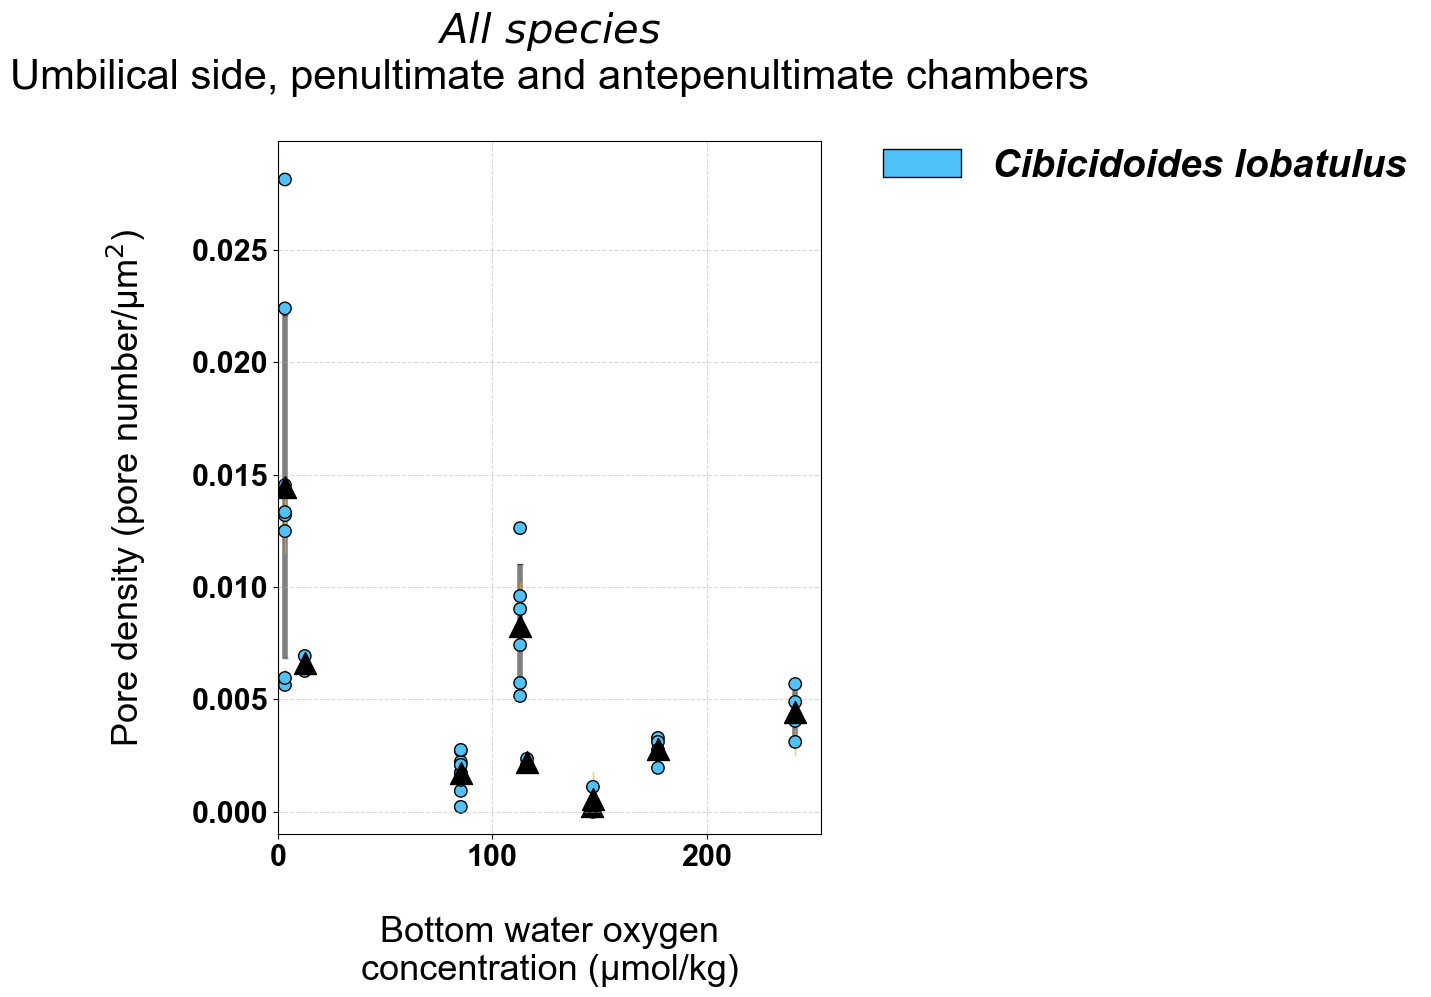

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Create a dictionary mapping each species to a color
species_colors = {
    'Cibicidoides lobatulus': '#4FC3F7',
    'Cibicidoides ungerianus': '#FFD54F',
    'Cibicidoides wuellerstorfi': '#EC407A',
    'Cibicidoides wuellerstorfi forma plana': '#B98AB6',
    'Cibicidoides wuellerstorfi forma convexa': '#C53FE3',
    'Planulina ariminensis': '#26A69A',
    'Planulina limbata': '#6D4C41',
    'Planulina ornata': '#AB47BC'
}


# Define the unique species values
unique_species = subset_ventral_penultimate_antepenultimate['Species'].unique()

# Define a color palette with five colors
color_palette = sns.color_palette('Set1', n_colors=len(unique_species))

# Get the species values from the dataframe
species = subset_ventral_penultimate_antepenultimate['Species']

# Create a list of colors corresponding to each species value
colors = [species_colors.get(s, 'black') for s in species]

# First dataset with unique values from the 'Sample' column
listofsamples = subset_ventral_penultimate_antepenultimate['Sample'].unique()

x = subset_ventral_penultimate_antepenultimate['DIVA oxygen']
y = subset_ventral_penultimate_antepenultimate['PORE DENSITY AVERAGE']
yerror = subset_ventral_penultimate_antepenultimate['PORE DENSITY DEV STD']

porosity_avg = subset_ventral_penultimate_antepenultimate.groupby('Sample')['PORE DENSITY AVERAGE'].mean().reset_index()
porosity_std = subset_ventral_penultimate_antepenultimate.groupby('Sample')['PORE DENSITY AVERAGE'].std().reset_index()
o2_avg = subset_ventral_penultimate_antepenultimate.groupby('Sample')['DIVA oxygen'].mean().reset_index()

a = o2_avg['DIVA oxygen'].to_numpy()  # Convert to numpy array
b = porosity_avg['PORE DENSITY AVERAGE'].to_numpy()  # Convert to numpy array
error_y = porosity_std['PORE DENSITY AVERAGE'].to_numpy()  # Convert to numpy array

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate weights with added epsilon to avoid division by zero for individual data points
weights_individual = 1 / (yerror ** 2 + epsilon)

# Replace any NaN or infinite values in the data arrays with zeros for individual data points
x = np.nan_to_num(x)
y = np.nan_to_num(y)
weights_individual = np.nan_to_num(weights_individual)

# Add a constant to the independent variable (if needed) for individual data points
X_individual = sm.add_constant(x)

# Perform WLS regression for individual data points
model_individual = sm.WLS(y, X_individual, weights=weights_individual, missing='drop')
results_individual = model_individual.fit()

# Get regression summary for individual data points
print("WLS Regression for Individual Data Points:")
print(results_individual.summary())

# Predicted values from the first WLS regression
predicted_values_individual = results_individual.predict(X_individual)

# Calculate RMSE
rmse_individual = np.sqrt(mean_squared_error(x, predicted_values_individual))
print("RMSE for WLS regression for individual data points:", rmse_individual)

# Define generic column names for coefficients
column_names = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_individual.shape[1])]

# Perform Monte Carlo by resampling residuals
num_simulations = 1000  # Number of Monte Carlo simulations
simulated_coefficients = []
simulated_rmse_values = []  # List to store RMSE values
prediction_intervals = []  # List to store prediction intervals

for _ in range(num_simulations):
    # Generate random residuals with the same distribution
    simulated_residuals = np.random.normal(0, np.std(results_individual.resid), len(results_individual.resid))
    simulated_y = results_individual.fittedvalues + simulated_residuals

    # Fit the WLS model to the simulated data
    simulated_model = sm.WLS(simulated_y, X_individual, weights=weights_individual, missing='drop')
    simulated_results = simulated_model.fit()

    # Store the coefficients for each simulation
    simulated_coefficients.append(simulated_results.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values = np.dot(X_individual, simulated_results.params)
    rmse = np.sqrt(mean_squared_error(x, simulated_predicted_values))
    simulated_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval = 1.96 * np.std(simulated_residuals)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients
confidence_intervals = np.percentile(simulated_coefficients, [2.5, 97.5], axis=0)
print("Monte Carlo Confidence Intervals for Coefficients:")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {confidence_intervals[0][i]} - {confidence_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse = np.mean(simulated_rmse_values)
std_rmse = np.std(simulated_rmse_values)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse}")

# Calculate and print prediction intervals
mean_prediction_interval = np.mean(prediction_intervals)
std_prediction_interval = np.std(prediction_intervals)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval}")

# Perform bootstrapping for the first WLS regression for individual data points
num_bootstraps = 1000  # Number of bootstraps
bootstrap_coefficients = []
bootstrap_rmse_values = []  # List to store RMSE values
bootstrap_prediction_intervals = []  # List to store prediction intervals

for _ in range(num_bootstraps):
    # Resample data with replacement
    indices = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample = x[indices]
    bootstrap_y_sample = y[indices]
    bootstrap_weights_sample = weights_individual[indices]
    X_bootstrap_sample = sm.add_constant(bootstrap_x_sample)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model = sm.WLS(bootstrap_y_sample, X_bootstrap_sample, weights=bootstrap_weights_sample, missing='drop')
    bootstrap_results = bootstrap_model.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients.append(bootstrap_results.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values = np.dot(X_bootstrap_sample, bootstrap_results.params)
    rmse = np.sqrt(mean_squared_error(bootstrap_x_sample, bootstrap_predicted_values))
    bootstrap_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals = bootstrap_y_sample - bootstrap_predicted_values
    prediction_interval = 1.96 * np.std(bootstrap_residuals)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals = np.percentile(bootstrap_coefficients, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (First Regression):")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {bootstrap_intervals[0][i]} - {bootstrap_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse = np.mean(bootstrap_rmse_values)
std_bootstrap_rmse = np.std(bootstrap_rmse_values)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval = np.mean(bootstrap_prediction_intervals)
std_bootstrap_prediction_interval = np.std(bootstrap_prediction_intervals)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval}")

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate the sample size (number of specimens) for each site
sample_sizes = subset_ventral_penultimate_antepenultimate.groupby('Sample')['Species'].count().reset_index()

# Calculate the inverse of sample sizes to use as weights for mean values
weights_mean = 1 / (sample_sizes['Species'] + epsilon)  # Use epsilon to avoid division by zero

# Replace any NaN or infinite values in the data arrays with zeros for mean values
a = np.nan_to_num(a)
b = np.nan_to_num(b)
weights_mean = np.nan_to_num(weights_mean)

# Add a constant to the independent variable (if needed) for mean values
X_mean = sm.add_constant(a)

# Perform WLS regression for mean values with sample size-based weights
model_mean_weighted = sm.WLS(b, X_mean, weights=weights_mean, missing='drop')
results_mean_weighted = model_mean_weighted.fit()

# Get regression summary for mean values with sample size-based weights
print("\nLinear WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_mean_weighted.summary())

# Predicted values from the second WLS regression
predicted_values_mean_weighted = results_mean_weighted.predict(X_mean)

# Calculate RMSE for mean values with sample size-based weights
rmse_mean_weighted = np.sqrt(mean_squared_error(a, predicted_values_mean_weighted))
print("RMSE for WLS regression for mean values with sample size-based weights:", rmse_mean_weighted)

# Define generic column names for coefficients
column_names_mean = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_mean.shape[1])]

# Perform Monte Carlo by resampling residuals for mean values
num_simulations_mean = 1000  # Number of Monte Carlo simulations for mean values
simulated_coefficients_mean = []
simulated_rmse_values_mean = []  # List to store RMSE values for mean values
prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_simulations_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_mean = np.random.normal(0, np.std(results_mean_weighted.resid), len(results_mean_weighted.resid))
    simulated_b = results_mean_weighted.fittedvalues + simulated_residuals_mean

    # Fit the WLS model to the simulated data for mean values
    simulated_model_mean = sm.WLS(simulated_b, X_mean, weights=weights_mean, missing='drop')
    simulated_results_mean = simulated_model_mean.fit()

    # Store the coefficients for each simulation for mean values
    simulated_coefficients_mean.append(simulated_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    simulated_predicted_values_mean = np.dot(X_mean, simulated_results_mean.params)
    rmse_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_mean))
    simulated_rmse_values_mean.append(rmse_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    prediction_interval_mean = 1.96 * np.std(simulated_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_mean.append(prediction_interval_mean)

# Calculate and print confidence intervals for coefficients for mean values
confidence_intervals_mean = np.percentile(simulated_coefficients_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {confidence_intervals_mean[0][i]} - {confidence_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values for mean values
mean_rmse_mean = np.mean(simulated_rmse_values_mean)
std_rmse_mean = np.std(simulated_rmse_values_mean)
print(f"Mean RMSE across Monte Carlo runs (Mean Values): {mean_rmse_mean}")
print(f"Std RMSE across Monte Carlo runs (Mean Values): {std_rmse_mean}")

# Calculate and print prediction intervals for mean values
mean_prediction_interval_mean = np.mean(prediction_intervals_mean)
std_prediction_interval_mean = np.std(prediction_intervals_mean)
print(f"Mean Prediction Interval across Monte Carlo runs (Mean Values): {mean_prediction_interval_mean}")
print(f"Std Prediction Interval across Monte Carlo runs (Mean Values): {std_prediction_interval_mean}")

# Perform bootstrapping for the second WLS regression for mean values
num_bootstraps_mean = 1000  # Number of bootstraps for mean values
bootstrap_coefficients_mean = []
bootstrap_rmse_values_mean = []  # List to store RMSE values for mean values
bootstrap_prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_bootstraps_mean):
    # Resample data with replacement for mean values
    indices_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample = a[indices_mean]
    bootstrap_b_sample = b[indices_mean]
    bootstrap_weights_sample_mean = weights_mean[indices_mean]
    X_bootstrap_sample_mean = sm.add_constant(bootstrap_a_sample)

    # Fit the WLS model to the bootstrapped data for mean values
    bootstrap_model_mean = sm.WLS(bootstrap_b_sample, X_bootstrap_sample_mean, weights=bootstrap_weights_sample_mean, missing='drop')
    bootstrap_results_mean = bootstrap_model_mean.fit()

    # Store the coefficients for each bootstrap sample for mean values
    bootstrap_coefficients_mean.append(bootstrap_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    bootstrap_predicted_values_mean = np.dot(X_bootstrap_sample_mean, bootstrap_results_mean.params)
    rmse_mean_bootstrap = np.sqrt(mean_squared_error(bootstrap_a_sample, bootstrap_predicted_values_mean))
    bootstrap_rmse_values_mean.append(rmse_mean_bootstrap)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    bootstrap_residuals_mean = bootstrap_b_sample - bootstrap_predicted_values_mean
    prediction_interval_mean_bootstrap = 1.96 * np.std(bootstrap_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_mean.append(prediction_interval_mean_bootstrap)

# Calculate and print confidence intervals for coefficients for the second regression for mean values
bootstrap_intervals_mean = np.percentile(bootstrap_coefficients_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_mean[0][i]} - {bootstrap_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping for mean values
mean_bootstrap_rmse_mean = np.mean(bootstrap_rmse_values_mean)
std_bootstrap_rmse_mean = np.std(bootstrap_rmse_values_mean)
print(f"Mean RMSE across bootstraps (Mean Values): {mean_bootstrap_rmse_mean}")
print(f"Std RMSE across bootstraps (Mean Values): {std_bootstrap_rmse_mean}")

# Calculate and print prediction intervals for bootstrapping for mean values
mean_bootstrap_prediction_interval_mean = np.mean(bootstrap_prediction_intervals_mean)
std_bootstrap_prediction_interval_mean = np.std(bootstrap_prediction_intervals_mean)
print(f"Mean Prediction Interval across bootstraps (Mean Values): {mean_bootstrap_prediction_interval_mean}")
print(f"Std Prediction Interval across bootstraps (Mean Values): {std_bootstrap_prediction_interval_mean}")

# Define the logarithmic function for the regression model
def logarithmic_model(x, params):
    a, b = params
    return a * np.log(x) + b

# Fit the logarithmic model using WLS for individual data points
log_y = np.log(np.maximum(y, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_individual = np.nan_to_num(weights_individual)
log_weights_individual[log_y == -np.inf] = 0  # Set weights to zero for invalid values
log_X_individual = sm.add_constant(x)
results_log_individual = sm.WLS(log_y, log_X_individual, weights=log_weights_individual, missing='drop').fit()

# Get regression summary for individual data points
print("\nWLS Logarithmic Regression for Individual Data Points:")
print(results_log_individual.summary())

# Predicted values from the first logarithmic regression
predicted_values_log_individual = results_log_individual.predict(log_X_individual)

# Calculate RMSE
rmse_log_individual = np.sqrt(mean_squared_error(x, np.exp(predicted_values_log_individual)))
print("RMSE for logarithmic regression for individual data points:", rmse_log_individual)

# Define generic column names for coefficients
column_names_log = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log = []
simulated_rmse_values_log = []  # List to store RMSE values
prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_simulations_log):
    # Generate random residuals with the same distribution
    simulated_residuals_log = np.random.normal(0, np.std(results_log_individual.resid), len(results_log_individual.resid))
    simulated_log_y = results_log_individual.fittedvalues + simulated_residuals_log

    # Fit the WLS model to the simulated data
    simulated_model_log = sm.WLS(simulated_log_y, log_X_individual, weights=log_weights_individual, missing='drop')
    simulated_results_log = simulated_model_log.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log.append(simulated_results_log.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log = np.exp(simulated_results_log.predict(log_X_individual))
    rmse_log = np.sqrt(mean_squared_error(x, simulated_predicted_values_log))
    simulated_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log = 1.96 * np.std(simulated_residuals_log)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log = np.percentile(simulated_coefficients_log, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {confidence_intervals_log[0][i]} - {confidence_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log = np.mean(simulated_rmse_values_log)
std_rmse_log = np.std(simulated_rmse_values_log)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log}")

# Calculate and print prediction intervals
mean_prediction_interval_log = np.mean(prediction_intervals_log)
std_prediction_interval_log = np.std(prediction_intervals_log)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log}")

# Perform bootstrapping for the first WLS logarithmic regression for individual data points
num_bootstraps_log = 1000  # Number of bootstraps
bootstrap_coefficients_log = []
bootstrap_rmse_values_log = []  # List to store RMSE values
bootstrap_prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_bootstraps_log):
    # Resample data with replacement
    indices_log = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample_log = x[indices_log]
    bootstrap_y_sample_log = y[indices_log]
    bootstrap_weights_sample_log = log_weights_individual[indices_log]
    X_bootstrap_sample_log = sm.add_constant(bootstrap_x_sample_log)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log = sm.WLS(bootstrap_y_sample_log, X_bootstrap_sample_log, weights=bootstrap_weights_sample_log, missing='drop')
    bootstrap_results_log = bootstrap_model_log.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log.append(bootstrap_results_log.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log = np.exp(bootstrap_results_log.predict(X_bootstrap_sample_log))
    rmse_log = np.sqrt(mean_squared_error(bootstrap_x_sample_log, bootstrap_predicted_values_log))
    bootstrap_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log = bootstrap_y_sample_log - bootstrap_predicted_values_log
    prediction_interval_log = 1.96 * np.std(bootstrap_residuals_log)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals_log = np.percentile(bootstrap_coefficients_log, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - First Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {bootstrap_intervals_log[0][i]} - {bootstrap_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log = np.mean(bootstrap_rmse_values_log)
std_bootstrap_rmse_log = np.std(bootstrap_rmse_values_log)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log = np.mean(bootstrap_prediction_intervals_log)
std_bootstrap_prediction_interval_log = np.std(bootstrap_prediction_intervals_log)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log}")

# Fit the logarithmic model using WLS for mean values with sample size-based weights
log_b = np.log(np.maximum(b, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_mean = np.nan_to_num(weights_mean)
log_weights_mean[log_b == -np.inf] = 0  # Set weights to zero for invalid values
log_X_mean = sm.add_constant(a)
results_log_mean_weighted = sm.WLS(log_b, log_X_mean, weights=log_weights_mean, missing='drop').fit()

# Get regression summary for mean values with sample size-based weights
print("\nLogarithmic WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_log_mean_weighted.summary())

# Predicted values from the logarithmic regression
predicted_values_log_mean_weighted = results_log_mean_weighted.predict(log_X_mean)

# Calculate RMSE
rmse_log_mean_weighted = np.sqrt(mean_squared_error(a, np.exp(predicted_values_log_mean_weighted)))
print("RMSE for logarithmic regression for mean values with sample size-based weights:", rmse_log_mean_weighted)

# Define generic column names for coefficients
column_names_log_mean = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log_mean = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log_mean = []
simulated_rmse_values_log_mean = []  # List to store RMSE values
prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_simulations_log_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_log_mean = np.random.normal(0, np.std(results_log_mean_weighted.resid), len(results_log_mean_weighted.resid))
    simulated_log_b = results_log_mean_weighted.fittedvalues + simulated_residuals_log_mean

    # Fit the WLS model to the simulated data
    simulated_model_log_mean = sm.WLS(simulated_log_b, log_X_mean, weights=log_weights_mean, missing='drop')
    simulated_results_log_mean = simulated_model_log_mean.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log_mean.append(simulated_results_log_mean.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log_mean = np.exp(simulated_results_log_mean.predict(log_X_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_log_mean))
    simulated_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log_mean = 1.96 * np.std(simulated_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log_mean = np.percentile(simulated_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {confidence_intervals_log_mean[0][i]} - {confidence_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log_mean = np.mean(simulated_rmse_values_log_mean)
std_rmse_log_mean = np.std(simulated_rmse_values_log_mean)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log_mean}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log_mean}")

# Calculate and print prediction intervals
mean_prediction_interval_log_mean = np.mean(prediction_intervals_log_mean)
std_prediction_interval_log_mean = np.std(prediction_intervals_log_mean)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log_mean}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log_mean}")

# Perform bootstrapping for the logarithmic regression for mean values with sample size-based weights
num_bootstraps_log_mean = 1000  # Number of bootstraps
bootstrap_coefficients_log_mean = []
bootstrap_rmse_values_log_mean = []  # List to store RMSE values
bootstrap_prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_bootstraps_log_mean):
    # Resample data with replacement
    indices_log_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample_log_mean = a[indices_log_mean]
    bootstrap_b_sample_log_mean = b[indices_log_mean]
    bootstrap_weights_sample_log_mean = log_weights_mean[indices_log_mean]
    X_bootstrap_sample_log_mean = sm.add_constant(bootstrap_a_sample_log_mean)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log_mean = sm.WLS(bootstrap_b_sample_log_mean, X_bootstrap_sample_log_mean, weights=bootstrap_weights_sample_log_mean, missing='drop')
    bootstrap_results_log_mean = bootstrap_model_log_mean.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log_mean.append(bootstrap_results_log_mean.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log_mean = np.exp(bootstrap_results_log_mean.predict(X_bootstrap_sample_log_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(bootstrap_a_sample_log_mean, bootstrap_predicted_values_log_mean))
    bootstrap_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log_mean = bootstrap_b_sample_log_mean - bootstrap_predicted_values_log_mean
    prediction_interval_log_mean = 1.96 * np.std(bootstrap_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients for the bootstrapped regression
bootstrap_intervals_log_mean = np.percentile(bootstrap_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_log_mean[0][i]} - {bootstrap_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log_mean = np.mean(bootstrap_rmse_values_log_mean)
std_bootstrap_rmse_log_mean = np.std(bootstrap_rmse_values_log_mean)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log_mean}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log_mean}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log_mean = np.mean(bootstrap_prediction_intervals_log_mean)
std_bootstrap_prediction_interval_log_mean = np.std(bootstrap_prediction_intervals_log_mean)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log_mean}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log_mean}")

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(7, 9))
ax.scatter(x, y, c=colors, s=80, alpha=1, marker='o', label="Individual measurement", zorder=0, edgecolors='black', linewidths=1)
ax.errorbar(x, y, yerr=yerror, fmt='none', color='orange', alpha=0.7, capsize=0, zorder=-1, linewidth=1, label="Porosity dev. std.")
ax.scatter(a, b, color='black', s=250, alpha=1, marker='^', label="Mean by site", zorder=1)  # Customize marker color, transparency, and edge color
ax.errorbar(a, b, yerr=error_y, fmt='none', color='black', alpha=0.5, capsize=2, zorder=-5, linewidth=4, label="Porosity dev. std.")

# Add error bars on the y-axis
#ax.set_ylim(0, 42)
ax.set_xlabel('\nBottom water oxygen\nconcentration (µmol/kg)', fontsize=26, fontname='Arial')
ax.set_ylabel('Pore density (pore number/µm$^{2}$)\n', fontsize=26, fontname='Arial')
ax.set_title(r'$\mathit{All\ species}$' + '\nUmbilical side, penultimate and antepenultimate chambers\n', fontsize=30, fontname='Arial')

# Customize tick label font size
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)

# Change tick label font to Arial
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontname('Arial')
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontname('Arial')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5, zorder=-5)

# Create color-coded patches (circles) with italic labels for the legend
legend_patches = [mpatches.Circle((0.5, 0.5), radius=0.25, facecolor=species_colors[species], edgecolor='black') for species in unique_species]
legend_labels = [f"{species}" for species in unique_species]

# Customize legend patches and labels
for patch in legend_patches:
    patch.set_label('')  # Clear default label
    patch.set_facecolor(patch.get_facecolor())
    patch.set_edgecolor(patch.get_edgecolor())

# Add legend with color-coded labels in italic
ax.legend(handles=legend_patches, labels=legend_labels, bbox_to_anchor=(1.05, 1.04), loc='upper left', frameon=False, prop={'family': 'Arial', 'size': 28, 'style': 'italic'})

ax.set_xlim(left=0)  # Set the left limit of the x-axis to 0
ax.set_ylim(bottom=-0.001)  # Set the bottom limit of the y-axis to 0

save_path = f"Datasets/Created Figures/Pore density {species_name} PAC Umbilical.jpg"
plt.savefig(save_path, dpi=999, bbox_inches='tight')

plt.show()

## Spiral side (dorsal) - pore density

WLS Regression for Individual Data Points:
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.246
Model:                            WLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     9.771
Date:                Tue, 11 Jun 2024   Prob (F-statistic):            0.00392
Time:                        18:26:20   Log-Likelihood:                 143.94
No. Observations:                  32   AIC:                            -283.9
Df Residuals:                      30   BIC:                            -281.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Mean Values):
Intercept: 0.004644339726370025 - 0.01044467743358704
Coefficient_1: -3.950125860011331e-05 - 1.787353953796906e-06
Mean RMSE across Monte Carlo runs (Mean Values): 129.94168696291953
Std RMSE across Monte Carlo runs (Mean Values): 0.0007597928969254943
Mean Prediction Interval across Monte Carlo runs (Mean Values): 0.0035722453539005898
Std Prediction Interval across Monte Carlo runs (Mean Values): 0.0009606157145155212

Bootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):
Intercept: 0.0032520568068966425 - 0.011305663196757134
Coefficient_1: -4.850856991831109e-05 - 6.7693843344726826e-06
Mean RMSE across bootstraps (Mean Values): 126.84182352864215
Std RMSE across bootstraps (Mean Values): 23.756379755655264
Mean Prediction Interval across bootstraps (Mean Values): 0.0030823551111609174
Std Prediction Interval across bootstraps (Mean Values): 0.0011952126137998638

WLS Logarithmic Reg

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: -5.3807319505753615 - -4.54868909166968
Coefficient_1: -0.006386586109527873 - 3.886339969264699e-05
Mean RMSE across Monte Carlo runs: 129.94172157125493
Std RMSE across Monte Carlo runs: 0.0004987588557524113
Mean Prediction Interval across Monte Carlo runs: 0.5444505591418674
Std Prediction Interval across Monte Carlo runs: 0.14895197821910117

Bootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 0.0029438489857600476 - 0.011510822706908784
Coefficient_1: -5.1167140181122705e-05 - 7.916633486087973e-06
Mean RMSE across bootstraps: 125.96387509398025
Std RMSE across bootstraps: 23.302951489115358
Mean Prediction Interval across bootstraps: 0.0030169278931279956
Std Prediction Interval across bootstraps: 0.0012089683229273324


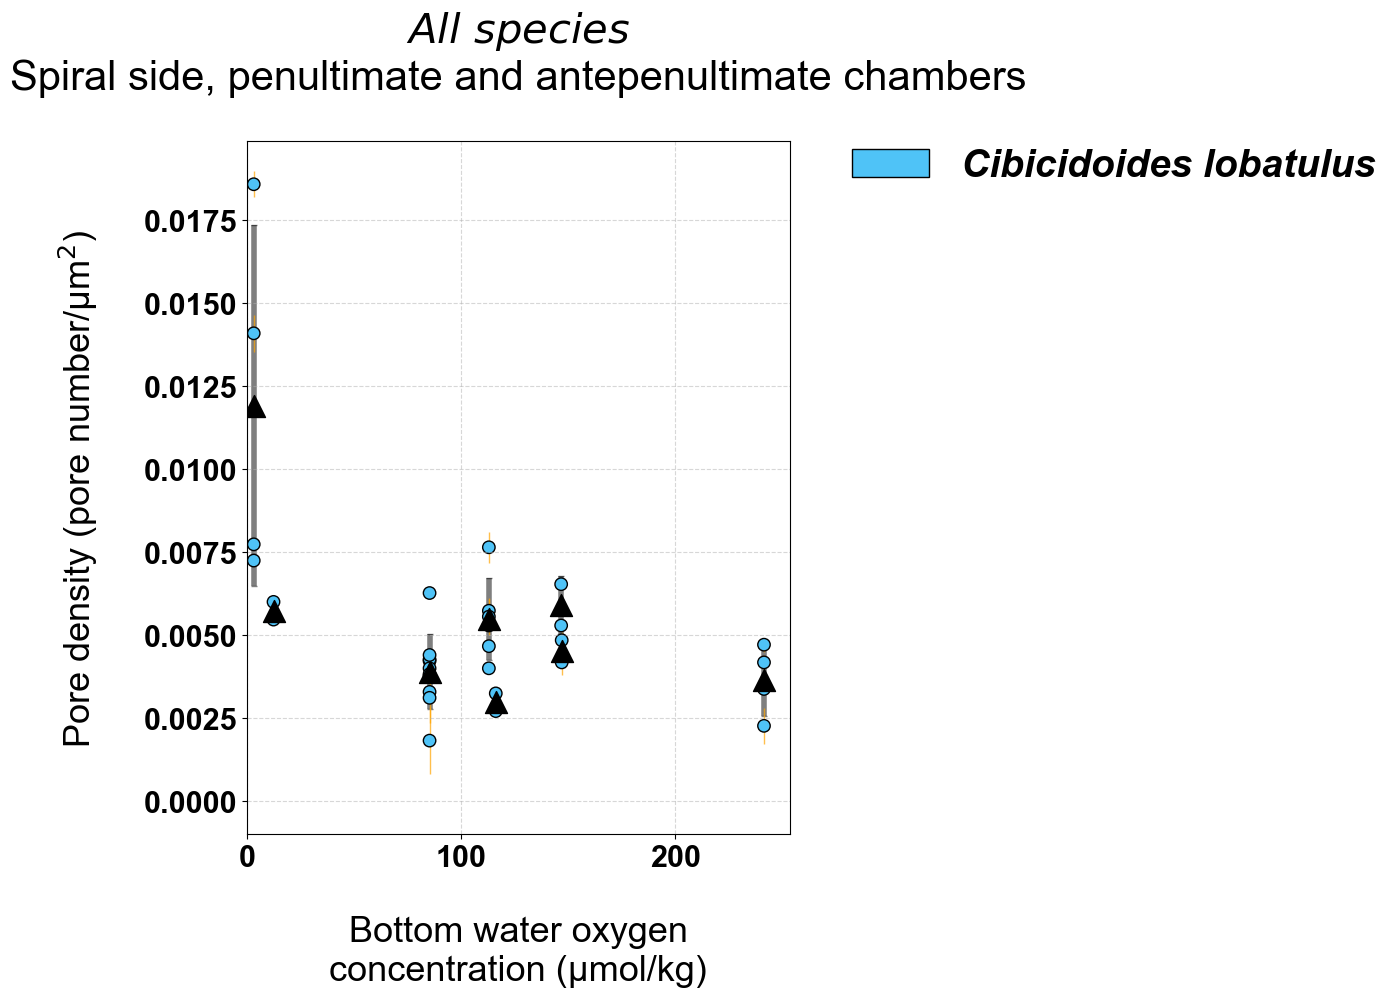

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Create a dictionary mapping each species to a color
species_colors = {
    'Cibicidoides lobatulus': '#4FC3F7',
    'Cibicidoides ungerianus': '#FFD54F',
    'Cibicidoides wuellerstorfi': '#EC407A',
    'Cibicidoides wuellerstorfi forma plana': '#B98AB6',
    'Cibicidoides wuellerstorfi forma convexa': '#C53FE3',
    'Planulina ariminensis': '#26A69A',
    'Planulina limbata': '#6D4C41',
    'Planulina ornata': '#AB47BC'
}

# Define the unique species values
unique_species = subset_dorsal_penultimate_antepenultimate['Species'].unique()

# Define a color palette with five colors
color_palette = sns.color_palette('Set1', n_colors=len(unique_species))

# Get the species values from the dataframe
species = subset_dorsal_penultimate_antepenultimate['Species']

# Create a list of colors corresponding to each species value
colors = [species_colors.get(s, 'black') for s in species]

# First dataset with unique values from the 'Sample' column
listofsamples = subset_dorsal_penultimate_antepenultimate['Sample'].unique()

x = subset_dorsal_penultimate_antepenultimate['DIVA oxygen']
y = subset_dorsal_penultimate_antepenultimate['PORE DENSITY AVERAGE']
yerror = subset_dorsal_penultimate_antepenultimate['PORE DENSITY DEV STD']

porosity_avg = subset_dorsal_penultimate_antepenultimate.groupby('Sample')['PORE DENSITY AVERAGE'].mean().reset_index()
porosity_std = subset_dorsal_penultimate_antepenultimate.groupby('Sample')['PORE DENSITY AVERAGE'].std().reset_index()
o2_avg = subset_dorsal_penultimate_antepenultimate.groupby('Sample')['DIVA oxygen'].mean().reset_index()

a = o2_avg['DIVA oxygen'].to_numpy()  # Convert to numpy array
b = porosity_avg['PORE DENSITY AVERAGE'].to_numpy()  # Convert to numpy array
error_y = porosity_std['PORE DENSITY AVERAGE'].to_numpy()  # Convert to numpy array

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate weights with added epsilon to avoid division by zero for individual data points
weights_individual = 1 / (yerror ** 2 + epsilon)

# Replace any NaN or infinite values in the data arrays with zeros for individual data points
x = np.nan_to_num(x)
y = np.nan_to_num(y)
weights_individual = np.nan_to_num(weights_individual)

# Add a constant to the independent variable (if needed) for individual data points
X_individual = sm.add_constant(x)

# Perform WLS regression for individual data points
model_individual = sm.WLS(y, X_individual, weights=weights_individual, missing='drop')
results_individual = model_individual.fit()

# Get regression summary for individual data points
print("WLS Regression for Individual Data Points:")
print(results_individual.summary())

# Predicted values from the first WLS regression
predicted_values_individual = results_individual.predict(X_individual)

# Calculate RMSE
rmse_individual = np.sqrt(mean_squared_error(x, predicted_values_individual))
print("RMSE for WLS regression for individual data points:", rmse_individual)

# Define generic column names for coefficients
column_names = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_individual.shape[1])]

# Perform Monte Carlo by resampling residuals
num_simulations = 1000  # Number of Monte Carlo simulations
simulated_coefficients = []
simulated_rmse_values = []  # List to store RMSE values
prediction_intervals = []  # List to store prediction intervals

for _ in range(num_simulations):
    # Generate random residuals with the same distribution
    simulated_residuals = np.random.normal(0, np.std(results_individual.resid), len(results_individual.resid))
    simulated_y = results_individual.fittedvalues + simulated_residuals

    # Fit the WLS model to the simulated data
    simulated_model = sm.WLS(simulated_y, X_individual, weights=weights_individual, missing='drop')
    simulated_results = simulated_model.fit()

    # Store the coefficients for each simulation
    simulated_coefficients.append(simulated_results.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values = np.dot(X_individual, simulated_results.params)
    rmse = np.sqrt(mean_squared_error(x, simulated_predicted_values))
    simulated_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval = 1.96 * np.std(simulated_residuals)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients
confidence_intervals = np.percentile(simulated_coefficients, [2.5, 97.5], axis=0)
print("Monte Carlo Confidence Intervals for Coefficients:")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {confidence_intervals[0][i]} - {confidence_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse = np.mean(simulated_rmse_values)
std_rmse = np.std(simulated_rmse_values)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse}")

# Calculate and print prediction intervals
mean_prediction_interval = np.mean(prediction_intervals)
std_prediction_interval = np.std(prediction_intervals)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval}")

# Perform bootstrapping for the first WLS regression for individual data points
num_bootstraps = 1000  # Number of bootstraps
bootstrap_coefficients = []
bootstrap_rmse_values = []  # List to store RMSE values
bootstrap_prediction_intervals = []  # List to store prediction intervals

for _ in range(num_bootstraps):
    # Resample data with replacement
    indices = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample = x[indices]
    bootstrap_y_sample = y[indices]
    bootstrap_weights_sample = weights_individual[indices]
    X_bootstrap_sample = sm.add_constant(bootstrap_x_sample)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model = sm.WLS(bootstrap_y_sample, X_bootstrap_sample, weights=bootstrap_weights_sample, missing='drop')
    bootstrap_results = bootstrap_model.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients.append(bootstrap_results.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values = np.dot(X_bootstrap_sample, bootstrap_results.params)
    rmse = np.sqrt(mean_squared_error(bootstrap_x_sample, bootstrap_predicted_values))
    bootstrap_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals = bootstrap_y_sample - bootstrap_predicted_values
    prediction_interval = 1.96 * np.std(bootstrap_residuals)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals = np.percentile(bootstrap_coefficients, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (First Regression):")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {bootstrap_intervals[0][i]} - {bootstrap_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse = np.mean(bootstrap_rmse_values)
std_bootstrap_rmse = np.std(bootstrap_rmse_values)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval = np.mean(bootstrap_prediction_intervals)
std_bootstrap_prediction_interval = np.std(bootstrap_prediction_intervals)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval}")

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate the sample size (number of specimens) for each site
sample_sizes = subset_dorsal_penultimate_antepenultimate.groupby('Sample')['Species'].count().reset_index()

# Calculate the inverse of sample sizes to use as weights for mean values
weights_mean = 1 / (sample_sizes['Species'] + epsilon)  # Use epsilon to avoid division by zero

# Replace any NaN or infinite values in the data arrays with zeros for mean values
a = np.nan_to_num(a)
b = np.nan_to_num(b)
weights_mean = np.nan_to_num(weights_mean)

# Add a constant to the independent variable (if needed) for mean values
X_mean = sm.add_constant(a)

# Perform WLS regression for mean values with sample size-based weights
model_mean_weighted = sm.WLS(b, X_mean, weights=weights_mean, missing='drop')
results_mean_weighted = model_mean_weighted.fit()

# Get regression summary for mean values with sample size-based weights
print("\nLinear WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_mean_weighted.summary())

# Predicted values from the second WLS regression
predicted_values_mean_weighted = results_mean_weighted.predict(X_mean)

# Calculate RMSE for mean values with sample size-based weights
rmse_mean_weighted = np.sqrt(mean_squared_error(a, predicted_values_mean_weighted))
print("RMSE for WLS regression for mean values with sample size-based weights:", rmse_mean_weighted)

# Define generic column names for coefficients
column_names_mean = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_mean.shape[1])]

# Perform Monte Carlo by resampling residuals for mean values
num_simulations_mean = 1000  # Number of Monte Carlo simulations for mean values
simulated_coefficients_mean = []
simulated_rmse_values_mean = []  # List to store RMSE values for mean values
prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_simulations_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_mean = np.random.normal(0, np.std(results_mean_weighted.resid), len(results_mean_weighted.resid))
    simulated_b = results_mean_weighted.fittedvalues + simulated_residuals_mean

    # Fit the WLS model to the simulated data for mean values
    simulated_model_mean = sm.WLS(simulated_b, X_mean, weights=weights_mean, missing='drop')
    simulated_results_mean = simulated_model_mean.fit()

    # Store the coefficients for each simulation for mean values
    simulated_coefficients_mean.append(simulated_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    simulated_predicted_values_mean = np.dot(X_mean, simulated_results_mean.params)
    rmse_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_mean))
    simulated_rmse_values_mean.append(rmse_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    prediction_interval_mean = 1.96 * np.std(simulated_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_mean.append(prediction_interval_mean)

# Calculate and print confidence intervals for coefficients for mean values
confidence_intervals_mean = np.percentile(simulated_coefficients_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {confidence_intervals_mean[0][i]} - {confidence_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values for mean values
mean_rmse_mean = np.mean(simulated_rmse_values_mean)
std_rmse_mean = np.std(simulated_rmse_values_mean)
print(f"Mean RMSE across Monte Carlo runs (Mean Values): {mean_rmse_mean}")
print(f"Std RMSE across Monte Carlo runs (Mean Values): {std_rmse_mean}")

# Calculate and print prediction intervals for mean values
mean_prediction_interval_mean = np.mean(prediction_intervals_mean)
std_prediction_interval_mean = np.std(prediction_intervals_mean)
print(f"Mean Prediction Interval across Monte Carlo runs (Mean Values): {mean_prediction_interval_mean}")
print(f"Std Prediction Interval across Monte Carlo runs (Mean Values): {std_prediction_interval_mean}")

# Perform bootstrapping for the second WLS regression for mean values
num_bootstraps_mean = 1000  # Number of bootstraps for mean values
bootstrap_coefficients_mean = []
bootstrap_rmse_values_mean = []  # List to store RMSE values for mean values
bootstrap_prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_bootstraps_mean):
    # Resample data with replacement for mean values
    indices_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample = a[indices_mean]
    bootstrap_b_sample = b[indices_mean]
    bootstrap_weights_sample_mean = weights_mean[indices_mean]
    X_bootstrap_sample_mean = sm.add_constant(bootstrap_a_sample)

    # Fit the WLS model to the bootstrapped data for mean values
    bootstrap_model_mean = sm.WLS(bootstrap_b_sample, X_bootstrap_sample_mean, weights=bootstrap_weights_sample_mean, missing='drop')
    bootstrap_results_mean = bootstrap_model_mean.fit()

    # Store the coefficients for each bootstrap sample for mean values
    bootstrap_coefficients_mean.append(bootstrap_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    bootstrap_predicted_values_mean = np.dot(X_bootstrap_sample_mean, bootstrap_results_mean.params)
    rmse_mean_bootstrap = np.sqrt(mean_squared_error(bootstrap_a_sample, bootstrap_predicted_values_mean))
    bootstrap_rmse_values_mean.append(rmse_mean_bootstrap)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    bootstrap_residuals_mean = bootstrap_b_sample - bootstrap_predicted_values_mean
    prediction_interval_mean_bootstrap = 1.96 * np.std(bootstrap_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_mean.append(prediction_interval_mean_bootstrap)

# Calculate and print confidence intervals for coefficients for the second regression for mean values
bootstrap_intervals_mean = np.percentile(bootstrap_coefficients_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_mean[0][i]} - {bootstrap_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping for mean values
mean_bootstrap_rmse_mean = np.mean(bootstrap_rmse_values_mean)
std_bootstrap_rmse_mean = np.std(bootstrap_rmse_values_mean)
print(f"Mean RMSE across bootstraps (Mean Values): {mean_bootstrap_rmse_mean}")
print(f"Std RMSE across bootstraps (Mean Values): {std_bootstrap_rmse_mean}")

# Calculate and print prediction intervals for bootstrapping for mean values
mean_bootstrap_prediction_interval_mean = np.mean(bootstrap_prediction_intervals_mean)
std_bootstrap_prediction_interval_mean = np.std(bootstrap_prediction_intervals_mean)
print(f"Mean Prediction Interval across bootstraps (Mean Values): {mean_bootstrap_prediction_interval_mean}")
print(f"Std Prediction Interval across bootstraps (Mean Values): {std_bootstrap_prediction_interval_mean}")

# Define the logarithmic function for the regression model
def logarithmic_model(x, params):
    a, b = params
    return a * np.log(x) + b

# Fit the logarithmic model using WLS for individual data points
log_y = np.log(np.maximum(y, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_individual = np.nan_to_num(weights_individual)
log_weights_individual[log_y == -np.inf] = 0  # Set weights to zero for invalid values
log_X_individual = sm.add_constant(x)
results_log_individual = sm.WLS(log_y, log_X_individual, weights=log_weights_individual, missing='drop').fit()

# Get regression summary for individual data points
print("\nWLS Logarithmic Regression for Individual Data Points:")
print(results_log_individual.summary())

# Predicted values from the first logarithmic regression
predicted_values_log_individual = results_log_individual.predict(log_X_individual)

# Calculate RMSE
rmse_log_individual = np.sqrt(mean_squared_error(x, np.exp(predicted_values_log_individual)))
print("RMSE for logarithmic regression for individual data points:", rmse_log_individual)

# Define generic column names for coefficients
column_names_log = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log = []
simulated_rmse_values_log = []  # List to store RMSE values
prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_simulations_log):
    # Generate random residuals with the same distribution
    simulated_residuals_log = np.random.normal(0, np.std(results_log_individual.resid), len(results_log_individual.resid))
    simulated_log_y = results_log_individual.fittedvalues + simulated_residuals_log

    # Fit the WLS model to the simulated data
    simulated_model_log = sm.WLS(simulated_log_y, log_X_individual, weights=log_weights_individual, missing='drop')
    simulated_results_log = simulated_model_log.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log.append(simulated_results_log.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log = np.exp(simulated_results_log.predict(log_X_individual))
    rmse_log = np.sqrt(mean_squared_error(x, simulated_predicted_values_log))
    simulated_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log = 1.96 * np.std(simulated_residuals_log)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log = np.percentile(simulated_coefficients_log, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {confidence_intervals_log[0][i]} - {confidence_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log = np.mean(simulated_rmse_values_log)
std_rmse_log = np.std(simulated_rmse_values_log)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log}")

# Calculate and print prediction intervals
mean_prediction_interval_log = np.mean(prediction_intervals_log)
std_prediction_interval_log = np.std(prediction_intervals_log)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log}")

# Perform bootstrapping for the first WLS logarithmic regression for individual data points
num_bootstraps_log = 1000  # Number of bootstraps
bootstrap_coefficients_log = []
bootstrap_rmse_values_log = []  # List to store RMSE values
bootstrap_prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_bootstraps_log):
    # Resample data with replacement
    indices_log = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample_log = x[indices_log]
    bootstrap_y_sample_log = y[indices_log]
    bootstrap_weights_sample_log = log_weights_individual[indices_log]
    X_bootstrap_sample_log = sm.add_constant(bootstrap_x_sample_log)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log = sm.WLS(bootstrap_y_sample_log, X_bootstrap_sample_log, weights=bootstrap_weights_sample_log, missing='drop')
    bootstrap_results_log = bootstrap_model_log.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log.append(bootstrap_results_log.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log = np.exp(bootstrap_results_log.predict(X_bootstrap_sample_log))
    rmse_log = np.sqrt(mean_squared_error(bootstrap_x_sample_log, bootstrap_predicted_values_log))
    bootstrap_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log = bootstrap_y_sample_log - bootstrap_predicted_values_log
    prediction_interval_log = 1.96 * np.std(bootstrap_residuals_log)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals_log = np.percentile(bootstrap_coefficients_log, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - First Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {bootstrap_intervals_log[0][i]} - {bootstrap_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log = np.mean(bootstrap_rmse_values_log)
std_bootstrap_rmse_log = np.std(bootstrap_rmse_values_log)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log = np.mean(bootstrap_prediction_intervals_log)
std_bootstrap_prediction_interval_log = np.std(bootstrap_prediction_intervals_log)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log}")

# Fit the logarithmic model using WLS for mean values with sample size-based weights
log_b = np.log(np.maximum(b, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_mean = np.nan_to_num(weights_mean)
log_weights_mean[log_b == -np.inf] = 0  # Set weights to zero for invalid values
log_X_mean = sm.add_constant(a)
results_log_mean_weighted = sm.WLS(log_b, log_X_mean, weights=log_weights_mean, missing='drop').fit()

# Get regression summary for mean values with sample size-based weights
print("\nLogarithmic WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_log_mean_weighted.summary())

# Predicted values from the logarithmic regression
predicted_values_log_mean_weighted = results_log_mean_weighted.predict(log_X_mean)

# Calculate RMSE
rmse_log_mean_weighted = np.sqrt(mean_squared_error(a, np.exp(predicted_values_log_mean_weighted)))
print("RMSE for logarithmic regression for mean values with sample size-based weights:", rmse_log_mean_weighted)

# Define generic column names for coefficients
column_names_log_mean = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log_mean = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log_mean = []
simulated_rmse_values_log_mean = []  # List to store RMSE values
prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_simulations_log_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_log_mean = np.random.normal(0, np.std(results_log_mean_weighted.resid), len(results_log_mean_weighted.resid))
    simulated_log_b = results_log_mean_weighted.fittedvalues + simulated_residuals_log_mean

    # Fit the WLS model to the simulated data
    simulated_model_log_mean = sm.WLS(simulated_log_b, log_X_mean, weights=log_weights_mean, missing='drop')
    simulated_results_log_mean = simulated_model_log_mean.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log_mean.append(simulated_results_log_mean.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log_mean = np.exp(simulated_results_log_mean.predict(log_X_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_log_mean))
    simulated_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log_mean = 1.96 * np.std(simulated_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log_mean = np.percentile(simulated_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {confidence_intervals_log_mean[0][i]} - {confidence_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log_mean = np.mean(simulated_rmse_values_log_mean)
std_rmse_log_mean = np.std(simulated_rmse_values_log_mean)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log_mean}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log_mean}")

# Calculate and print prediction intervals
mean_prediction_interval_log_mean = np.mean(prediction_intervals_log_mean)
std_prediction_interval_log_mean = np.std(prediction_intervals_log_mean)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log_mean}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log_mean}")

# Perform bootstrapping for the logarithmic regression for mean values with sample size-based weights
num_bootstraps_log_mean = 1000  # Number of bootstraps
bootstrap_coefficients_log_mean = []
bootstrap_rmse_values_log_mean = []  # List to store RMSE values
bootstrap_prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_bootstraps_log_mean):
    # Resample data with replacement
    indices_log_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample_log_mean = a[indices_log_mean]
    bootstrap_b_sample_log_mean = b[indices_log_mean]
    bootstrap_weights_sample_log_mean = log_weights_mean[indices_log_mean]
    X_bootstrap_sample_log_mean = sm.add_constant(bootstrap_a_sample_log_mean)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log_mean = sm.WLS(bootstrap_b_sample_log_mean, X_bootstrap_sample_log_mean, weights=bootstrap_weights_sample_log_mean, missing='drop')
    bootstrap_results_log_mean = bootstrap_model_log_mean.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log_mean.append(bootstrap_results_log_mean.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log_mean = np.exp(bootstrap_results_log_mean.predict(X_bootstrap_sample_log_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(bootstrap_a_sample_log_mean, bootstrap_predicted_values_log_mean))
    bootstrap_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log_mean = bootstrap_b_sample_log_mean - bootstrap_predicted_values_log_mean
    prediction_interval_log_mean = 1.96 * np.std(bootstrap_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients for the bootstrapped regression
bootstrap_intervals_log_mean = np.percentile(bootstrap_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_log_mean[0][i]} - {bootstrap_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log_mean = np.mean(bootstrap_rmse_values_log_mean)
std_bootstrap_rmse_log_mean = np.std(bootstrap_rmse_values_log_mean)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log_mean}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log_mean}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log_mean = np.mean(bootstrap_prediction_intervals_log_mean)
std_bootstrap_prediction_interval_log_mean = np.std(bootstrap_prediction_intervals_log_mean)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log_mean}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log_mean}")

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(7, 9))
ax.scatter(x, y, c=colors, s=80, alpha=1, marker='o', label="Individual measurement", zorder=0, edgecolors='black', linewidths=1)
ax.errorbar(x, y, yerr=yerror, fmt='none', color='orange', alpha=0.7, capsize=0, zorder=-1, linewidth=1, label="Porosity dev. std.")
ax.scatter(a, b, color='black', s=250, alpha=1, marker='^', label="Mean by site", zorder=1)  # Customize marker color, transparency, and edge color
ax.errorbar(a, b, yerr=error_y, fmt='none', color='black', alpha=0.5, capsize=2, zorder=-5, linewidth=4, label="Porosity dev. std.")

# Add error bars on the y-axis
#ax.set_ylim(0, 42)
ax.set_xlabel('\nBottom water oxygen\nconcentration (µmol/kg)', fontsize=26, fontname='Arial')
ax.set_ylabel('Pore density (pore number/µm$^{2}$)\n', fontsize=26, fontname='Arial')
ax.set_title(r'$\mathit{All\ species}$' + '\nSpiral side, penultimate and antepenultimate chambers\n', fontsize=30, fontname='Arial')

# Customize tick label font size
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)

# Change tick label font to Arial
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontname('Arial')
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontname('Arial')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5, zorder=-5)

# Create color-coded patches (circles) with italic labels for the legend
legend_patches = [mpatches.Circle((0.5, 0.5), radius=0.25, facecolor=species_colors[species], edgecolor='black') for species in unique_species]
legend_labels = [f"{species}" for species in unique_species]

# Customize legend patches and labels
for patch in legend_patches:
    patch.set_label('')  # Clear default label
    patch.set_facecolor(patch.get_facecolor())
    patch.set_edgecolor(patch.get_edgecolor())

# Add legend with color-coded labels in italic
ax.legend(handles=legend_patches, labels=legend_labels, bbox_to_anchor=(1.05, 1.04), loc='upper left', frameon=False, prop={'family': 'Arial', 'size': 28, 'style': 'italic'})

ax.set_xlim(left=0)  # Set the left limit of the x-axis to 0
ax.set_ylim(bottom=-0.001)  # Set the bottom limit of the y-axis to 0

save_path = f"Datasets/Created Figures/Pore density {species_name} PAC Spiral.jpg"
plt.savefig(save_path, dpi=999, bbox_inches='tight')

plt.show()

## Umbilical side (ventral) - pore size

WLS Regression for Individual Data Points:
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.675
Model:                            WLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     78.91
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           8.24e-11
Time:                        18:26:26   Log-Likelihood:                -122.87
No. Observations:                  40   AIC:                             249.7
Df Residuals:                      38   BIC:                             253.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Mean Values):
Intercept: 2.2512249343696715 - 6.764181400069125
Coefficient_1: -0.01663310885084022 - 0.0168361125691147
Mean RMSE across Monte Carlo runs (Mean Values): 132.1719860856786
Std RMSE across Monte Carlo runs (Mean Values): 0.5579869691120684
Mean Prediction Interval across Monte Carlo runs (Mean Values): 2.883554902300119
Std Prediction Interval across Monte Carlo runs (Mean Values): 0.7391335862842154

Bootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):
Intercept: 3.107104705988256 - 9.472472811567531
Coefficient_1: -0.027621877925435637 - 0.01599692398765858
Mean RMSE across bootstraps (Mean Values): 130.25187177412775
Std RMSE across bootstraps (Mean Values): 21.585233076032043
Mean Prediction Interval across bootstraps (Mean Values): 2.7254738676806047
Std Prediction Interval across bootstraps (Mean Values): 1.0889570223537133

WLS Logarithmic Regression for Individual Data Points:
 

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 0.8866816458804724 - 1.9472344672275357
Coefficient_1: -0.004036828606538923 - 0.0036845747807796214
Mean RMSE across Monte Carlo runs: 132.50045805065915
Std RMSE across Monte Carlo runs: 0.5629908101023864
Mean Prediction Interval across Monte Carlo runs: 0.6610486925204517
Std Prediction Interval across Monte Carlo runs: 0.16914574326906598

Bootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 3.020867776206349 - 9.153370938215991
Coefficient_1: -0.026470004716537293 - 0.013565031156678195
Mean RMSE across bootstraps: 209.32898817110464
Std RMSE across bootstraps: 386.0692982407697
Mean Prediction Interval across bootstraps: 238.02616937470466
Std Prediction Interval across bootstraps: 648.5903487070439


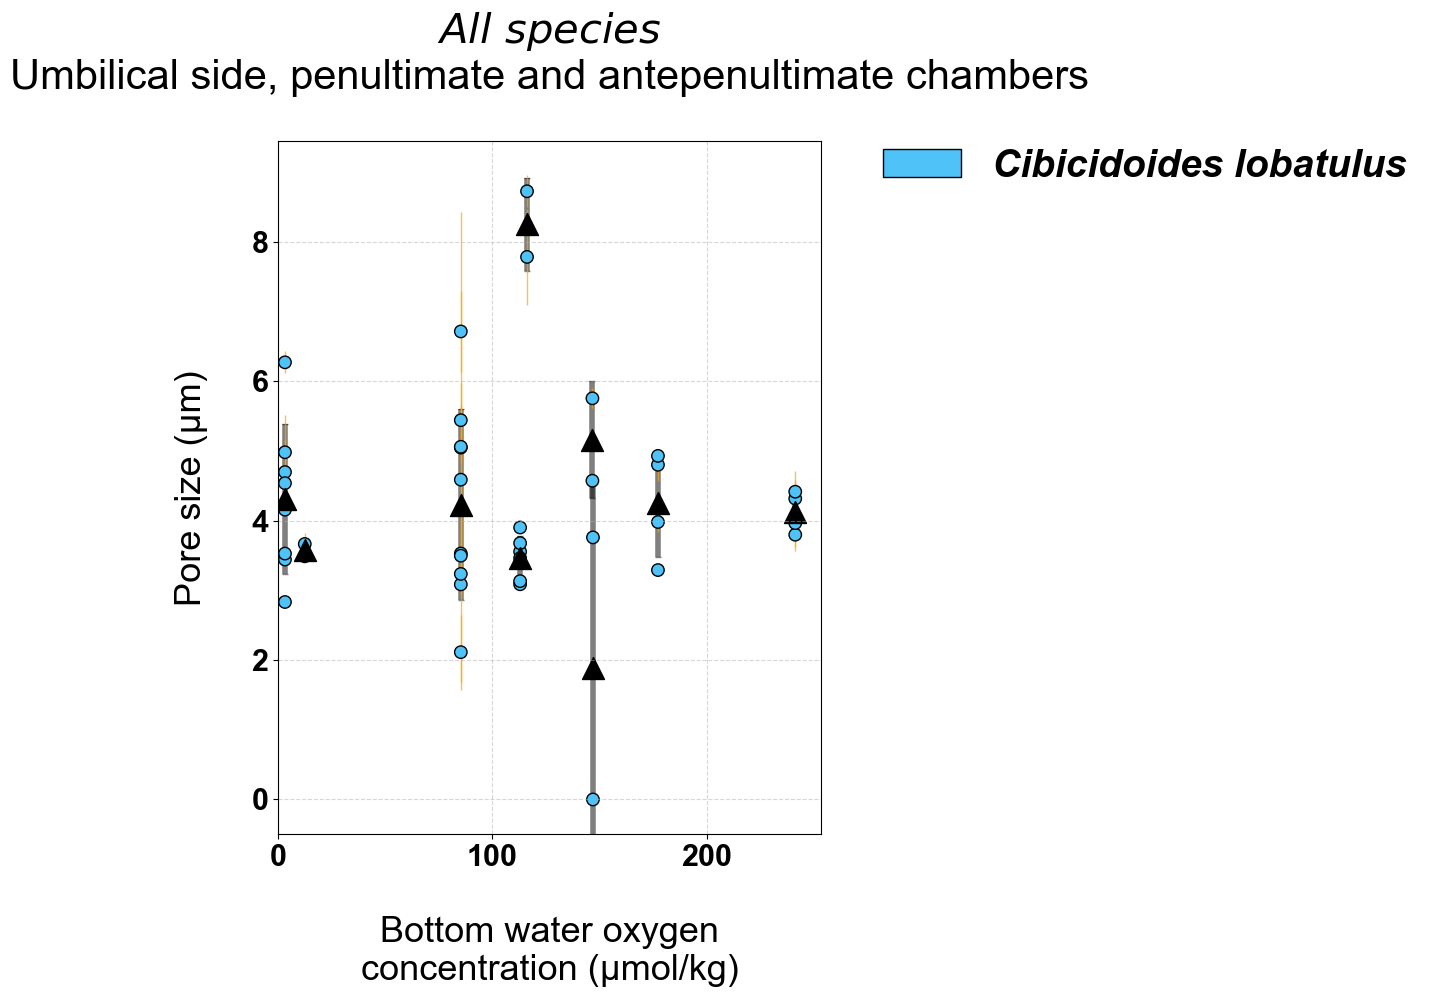

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Create a dictionary mapping each species to a color
species_colors = {
    'Cibicidoides lobatulus': '#4FC3F7',
    'Cibicidoides ungerianus': '#FFD54F',
    'Cibicidoides wuellerstorfi': '#EC407A',
    'Cibicidoides wuellerstorfi forma plana': '#B98AB6',
    'Cibicidoides wuellerstorfi forma convexa': '#C53FE3',
    'Planulina ariminensis': '#26A69A',
    'Planulina limbata': '#6D4C41',
    'Planulina ornata': '#AB47BC'
}

# Define the unique species values
unique_species = subset_ventral_penultimate_antepenultimate['Species'].unique()

# Define a color palette with five colors
color_palette = sns.color_palette('Set1', n_colors=len(unique_species))

# Get the species values from the dataframe
species = subset_ventral_penultimate_antepenultimate['Species']

# Create a list of colors corresponding to each species value
colors = [species_colors.get(s, 'black') for s in species]

# First dataset with unique values from the 'Sample' column
listofsamples = subset_ventral_penultimate_antepenultimate['Sample'].unique()

x = subset_ventral_penultimate_antepenultimate['DIVA oxygen']
y = subset_ventral_penultimate_antepenultimate['DIAMETER AVERAGE']
yerror = subset_ventral_penultimate_antepenultimate['DIAMETER DEV STD']

porosity_avg = subset_ventral_penultimate_antepenultimate.groupby('Sample')['DIAMETER AVERAGE'].mean().reset_index()
porosity_std = subset_ventral_penultimate_antepenultimate.groupby('Sample')['DIAMETER AVERAGE'].std().reset_index()
o2_avg = subset_ventral_penultimate_antepenultimate.groupby('Sample')['DIVA oxygen'].mean().reset_index()

a = o2_avg['DIVA oxygen'].to_numpy()  # Convert to numpy array
b = porosity_avg['DIAMETER AVERAGE'].to_numpy()  # Convert to numpy array
error_y = porosity_std['DIAMETER AVERAGE'].to_numpy()  # Convert to numpy array

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate weights with added epsilon to avoid division by zero for individual data points
weights_individual = 1 / (yerror ** 2 + epsilon)

# Replace any NaN or infinite values in the data arrays with zeros for individual data points
x = np.nan_to_num(x)
y = np.nan_to_num(y)
weights_individual = np.nan_to_num(weights_individual)

# Add a constant to the independent variable (if needed) for individual data points
X_individual = sm.add_constant(x)

# Perform WLS regression for individual data points
model_individual = sm.WLS(y, X_individual, weights=weights_individual, missing='drop')
results_individual = model_individual.fit()

# Get regression summary for individual data points
print("WLS Regression for Individual Data Points:")
print(results_individual.summary())

# Predicted values from the first WLS regression
predicted_values_individual = results_individual.predict(X_individual)

# Calculate RMSE
rmse_individual = np.sqrt(mean_squared_error(x, predicted_values_individual))
print("RMSE for WLS regression for individual data points:", rmse_individual)

# Define generic column names for coefficients
column_names = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_individual.shape[1])]

# Perform Monte Carlo by resampling residuals
num_simulations = 1000  # Number of Monte Carlo simulations
simulated_coefficients = []
simulated_rmse_values = []  # List to store RMSE values
prediction_intervals = []  # List to store prediction intervals

for _ in range(num_simulations):
    # Generate random residuals with the same distribution
    simulated_residuals = np.random.normal(0, np.std(results_individual.resid), len(results_individual.resid))
    simulated_y = results_individual.fittedvalues + simulated_residuals

    # Fit the WLS model to the simulated data
    simulated_model = sm.WLS(simulated_y, X_individual, weights=weights_individual, missing='drop')
    simulated_results = simulated_model.fit()

    # Store the coefficients for each simulation
    simulated_coefficients.append(simulated_results.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values = np.dot(X_individual, simulated_results.params)
    rmse = np.sqrt(mean_squared_error(x, simulated_predicted_values))
    simulated_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval = 1.96 * np.std(simulated_residuals)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients
confidence_intervals = np.percentile(simulated_coefficients, [2.5, 97.5], axis=0)
print("Monte Carlo Confidence Intervals for Coefficients:")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {confidence_intervals[0][i]} - {confidence_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse = np.mean(simulated_rmse_values)
std_rmse = np.std(simulated_rmse_values)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse}")

# Calculate and print prediction intervals
mean_prediction_interval = np.mean(prediction_intervals)
std_prediction_interval = np.std(prediction_intervals)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval}")

# Perform bootstrapping for the first WLS regression for individual data points
num_bootstraps = 1000  # Number of bootstraps
bootstrap_coefficients = []
bootstrap_rmse_values = []  # List to store RMSE values
bootstrap_prediction_intervals = []  # List to store prediction intervals

for _ in range(num_bootstraps):
    # Resample data with replacement
    indices = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample = x[indices]
    bootstrap_y_sample = y[indices]
    bootstrap_weights_sample = weights_individual[indices]
    X_bootstrap_sample = sm.add_constant(bootstrap_x_sample)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model = sm.WLS(bootstrap_y_sample, X_bootstrap_sample, weights=bootstrap_weights_sample, missing='drop')
    bootstrap_results = bootstrap_model.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients.append(bootstrap_results.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values = np.dot(X_bootstrap_sample, bootstrap_results.params)
    rmse = np.sqrt(mean_squared_error(bootstrap_x_sample, bootstrap_predicted_values))
    bootstrap_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals = bootstrap_y_sample - bootstrap_predicted_values
    prediction_interval = 1.96 * np.std(bootstrap_residuals)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals = np.percentile(bootstrap_coefficients, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (First Regression):")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {bootstrap_intervals[0][i]} - {bootstrap_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse = np.mean(bootstrap_rmse_values)
std_bootstrap_rmse = np.std(bootstrap_rmse_values)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval = np.mean(bootstrap_prediction_intervals)
std_bootstrap_prediction_interval = np.std(bootstrap_prediction_intervals)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval}")

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate the sample size (number of specimens) for each site
sample_sizes = subset_ventral_penultimate_antepenultimate.groupby('Sample')['Species'].count().reset_index()

# Calculate the inverse of sample sizes to use as weights for mean values
weights_mean = 1 / (sample_sizes['Species'] + epsilon)  # Use epsilon to avoid division by zero

# Replace any NaN or infinite values in the data arrays with zeros for mean values
a = np.nan_to_num(a)
b = np.nan_to_num(b)
weights_mean = np.nan_to_num(weights_mean)

# Add a constant to the independent variable (if needed) for mean values
X_mean = sm.add_constant(a)

# Perform WLS regression for mean values with sample size-based weights
model_mean_weighted = sm.WLS(b, X_mean, weights=weights_mean, missing='drop')
results_mean_weighted = model_mean_weighted.fit()

# Get regression summary for mean values with sample size-based weights
print("\nLinear WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_mean_weighted.summary())

# Predicted values from the second WLS regression
predicted_values_mean_weighted = results_mean_weighted.predict(X_mean)

# Calculate RMSE for mean values with sample size-based weights
rmse_mean_weighted = np.sqrt(mean_squared_error(a, predicted_values_mean_weighted))
print("RMSE for WLS regression for mean values with sample size-based weights:", rmse_mean_weighted)

# Define generic column names for coefficients
column_names_mean = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_mean.shape[1])]

# Perform Monte Carlo by resampling residuals for mean values
num_simulations_mean = 1000  # Number of Monte Carlo simulations for mean values
simulated_coefficients_mean = []
simulated_rmse_values_mean = []  # List to store RMSE values for mean values
prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_simulations_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_mean = np.random.normal(0, np.std(results_mean_weighted.resid), len(results_mean_weighted.resid))
    simulated_b = results_mean_weighted.fittedvalues + simulated_residuals_mean

    # Fit the WLS model to the simulated data for mean values
    simulated_model_mean = sm.WLS(simulated_b, X_mean, weights=weights_mean, missing='drop')
    simulated_results_mean = simulated_model_mean.fit()

    # Store the coefficients for each simulation for mean values
    simulated_coefficients_mean.append(simulated_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    simulated_predicted_values_mean = np.dot(X_mean, simulated_results_mean.params)
    rmse_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_mean))
    simulated_rmse_values_mean.append(rmse_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    prediction_interval_mean = 1.96 * np.std(simulated_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_mean.append(prediction_interval_mean)

# Calculate and print confidence intervals for coefficients for mean values
confidence_intervals_mean = np.percentile(simulated_coefficients_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {confidence_intervals_mean[0][i]} - {confidence_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values for mean values
mean_rmse_mean = np.mean(simulated_rmse_values_mean)
std_rmse_mean = np.std(simulated_rmse_values_mean)
print(f"Mean RMSE across Monte Carlo runs (Mean Values): {mean_rmse_mean}")
print(f"Std RMSE across Monte Carlo runs (Mean Values): {std_rmse_mean}")

# Calculate and print prediction intervals for mean values
mean_prediction_interval_mean = np.mean(prediction_intervals_mean)
std_prediction_interval_mean = np.std(prediction_intervals_mean)
print(f"Mean Prediction Interval across Monte Carlo runs (Mean Values): {mean_prediction_interval_mean}")
print(f"Std Prediction Interval across Monte Carlo runs (Mean Values): {std_prediction_interval_mean}")

# Perform bootstrapping for the second WLS regression for mean values
num_bootstraps_mean = 1000  # Number of bootstraps for mean values
bootstrap_coefficients_mean = []
bootstrap_rmse_values_mean = []  # List to store RMSE values for mean values
bootstrap_prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_bootstraps_mean):
    # Resample data with replacement for mean values
    indices_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample = a[indices_mean]
    bootstrap_b_sample = b[indices_mean]
    bootstrap_weights_sample_mean = weights_mean[indices_mean]
    X_bootstrap_sample_mean = sm.add_constant(bootstrap_a_sample)

    # Fit the WLS model to the bootstrapped data for mean values
    bootstrap_model_mean = sm.WLS(bootstrap_b_sample, X_bootstrap_sample_mean, weights=bootstrap_weights_sample_mean, missing='drop')
    bootstrap_results_mean = bootstrap_model_mean.fit()

    # Store the coefficients for each bootstrap sample for mean values
    bootstrap_coefficients_mean.append(bootstrap_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    bootstrap_predicted_values_mean = np.dot(X_bootstrap_sample_mean, bootstrap_results_mean.params)
    rmse_mean_bootstrap = np.sqrt(mean_squared_error(bootstrap_a_sample, bootstrap_predicted_values_mean))
    bootstrap_rmse_values_mean.append(rmse_mean_bootstrap)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    bootstrap_residuals_mean = bootstrap_b_sample - bootstrap_predicted_values_mean
    prediction_interval_mean_bootstrap = 1.96 * np.std(bootstrap_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_mean.append(prediction_interval_mean_bootstrap)

# Calculate and print confidence intervals for coefficients for the second regression for mean values
bootstrap_intervals_mean = np.percentile(bootstrap_coefficients_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_mean[0][i]} - {bootstrap_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping for mean values
mean_bootstrap_rmse_mean = np.mean(bootstrap_rmse_values_mean)
std_bootstrap_rmse_mean = np.std(bootstrap_rmse_values_mean)
print(f"Mean RMSE across bootstraps (Mean Values): {mean_bootstrap_rmse_mean}")
print(f"Std RMSE across bootstraps (Mean Values): {std_bootstrap_rmse_mean}")

# Calculate and print prediction intervals for bootstrapping for mean values
mean_bootstrap_prediction_interval_mean = np.mean(bootstrap_prediction_intervals_mean)
std_bootstrap_prediction_interval_mean = np.std(bootstrap_prediction_intervals_mean)
print(f"Mean Prediction Interval across bootstraps (Mean Values): {mean_bootstrap_prediction_interval_mean}")
print(f"Std Prediction Interval across bootstraps (Mean Values): {std_bootstrap_prediction_interval_mean}")

# Define the logarithmic function for the regression model
def logarithmic_model(x, params):
    a, b = params
    return a * np.log(x) + b

# Fit the logarithmic model using WLS for individual data points
log_y = np.log(np.maximum(y, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_individual = np.nan_to_num(weights_individual)
log_weights_individual[log_y == -np.inf] = 0  # Set weights to zero for invalid values
log_X_individual = sm.add_constant(x)
results_log_individual = sm.WLS(log_y, log_X_individual, weights=log_weights_individual, missing='drop').fit()

# Get regression summary for individual data points
print("\nWLS Logarithmic Regression for Individual Data Points:")
print(results_log_individual.summary())

# Predicted values from the first logarithmic regression
predicted_values_log_individual = results_log_individual.predict(log_X_individual)

# Calculate RMSE
rmse_log_individual = np.sqrt(mean_squared_error(x, np.exp(predicted_values_log_individual)))
print("RMSE for logarithmic regression for individual data points:", rmse_log_individual)

# Define generic column names for coefficients
column_names_log = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log = []
simulated_rmse_values_log = []  # List to store RMSE values
prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_simulations_log):
    # Generate random residuals with the same distribution
    simulated_residuals_log = np.random.normal(0, np.std(results_log_individual.resid), len(results_log_individual.resid))
    simulated_log_y = results_log_individual.fittedvalues + simulated_residuals_log

    # Fit the WLS model to the simulated data
    simulated_model_log = sm.WLS(simulated_log_y, log_X_individual, weights=log_weights_individual, missing='drop')
    simulated_results_log = simulated_model_log.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log.append(simulated_results_log.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log = np.exp(simulated_results_log.predict(log_X_individual))
    rmse_log = np.sqrt(mean_squared_error(x, simulated_predicted_values_log))
    simulated_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log = 1.96 * np.std(simulated_residuals_log)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log = np.percentile(simulated_coefficients_log, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {confidence_intervals_log[0][i]} - {confidence_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log = np.mean(simulated_rmse_values_log)
std_rmse_log = np.std(simulated_rmse_values_log)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log}")

# Calculate and print prediction intervals
mean_prediction_interval_log = np.mean(prediction_intervals_log)
std_prediction_interval_log = np.std(prediction_intervals_log)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log}")

# Perform bootstrapping for the first WLS logarithmic regression for individual data points
num_bootstraps_log = 1000  # Number of bootstraps
bootstrap_coefficients_log = []
bootstrap_rmse_values_log = []  # List to store RMSE values
bootstrap_prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_bootstraps_log):
    # Resample data with replacement
    indices_log = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample_log = x[indices_log]
    bootstrap_y_sample_log = y[indices_log]
    bootstrap_weights_sample_log = log_weights_individual[indices_log]
    X_bootstrap_sample_log = sm.add_constant(bootstrap_x_sample_log)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log = sm.WLS(bootstrap_y_sample_log, X_bootstrap_sample_log, weights=bootstrap_weights_sample_log, missing='drop')
    bootstrap_results_log = bootstrap_model_log.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log.append(bootstrap_results_log.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log = np.exp(bootstrap_results_log.predict(X_bootstrap_sample_log))
    rmse_log = np.sqrt(mean_squared_error(bootstrap_x_sample_log, bootstrap_predicted_values_log))
    bootstrap_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log = bootstrap_y_sample_log - bootstrap_predicted_values_log
    prediction_interval_log = 1.96 * np.std(bootstrap_residuals_log)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals_log = np.percentile(bootstrap_coefficients_log, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - First Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {bootstrap_intervals_log[0][i]} - {bootstrap_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log = np.mean(bootstrap_rmse_values_log)
std_bootstrap_rmse_log = np.std(bootstrap_rmse_values_log)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log = np.mean(bootstrap_prediction_intervals_log)
std_bootstrap_prediction_interval_log = np.std(bootstrap_prediction_intervals_log)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log}")

# Fit the logarithmic model using WLS for mean values with sample size-based weights
log_b = np.log(np.maximum(b, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_mean = np.nan_to_num(weights_mean)
log_weights_mean[log_b == -np.inf] = 0  # Set weights to zero for invalid values
log_X_mean = sm.add_constant(a)
results_log_mean_weighted = sm.WLS(log_b, log_X_mean, weights=log_weights_mean, missing='drop').fit()

# Get regression summary for mean values with sample size-based weights
print("\nLogarithmic WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_log_mean_weighted.summary())

# Predicted values from the logarithmic regression
predicted_values_log_mean_weighted = results_log_mean_weighted.predict(log_X_mean)

# Calculate RMSE
rmse_log_mean_weighted = np.sqrt(mean_squared_error(a, np.exp(predicted_values_log_mean_weighted)))
print("RMSE for logarithmic regression for mean values with sample size-based weights:", rmse_log_mean_weighted)

# Define generic column names for coefficients
column_names_log_mean = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log_mean = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log_mean = []
simulated_rmse_values_log_mean = []  # List to store RMSE values
prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_simulations_log_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_log_mean = np.random.normal(0, np.std(results_log_mean_weighted.resid), len(results_log_mean_weighted.resid))
    simulated_log_b = results_log_mean_weighted.fittedvalues + simulated_residuals_log_mean

    # Fit the WLS model to the simulated data
    simulated_model_log_mean = sm.WLS(simulated_log_b, log_X_mean, weights=log_weights_mean, missing='drop')
    simulated_results_log_mean = simulated_model_log_mean.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log_mean.append(simulated_results_log_mean.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log_mean = np.exp(simulated_results_log_mean.predict(log_X_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_log_mean))
    simulated_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log_mean = 1.96 * np.std(simulated_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log_mean = np.percentile(simulated_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {confidence_intervals_log_mean[0][i]} - {confidence_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log_mean = np.mean(simulated_rmse_values_log_mean)
std_rmse_log_mean = np.std(simulated_rmse_values_log_mean)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log_mean}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log_mean}")

# Calculate and print prediction intervals
mean_prediction_interval_log_mean = np.mean(prediction_intervals_log_mean)
std_prediction_interval_log_mean = np.std(prediction_intervals_log_mean)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log_mean}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log_mean}")

# Perform bootstrapping for the logarithmic regression for mean values with sample size-based weights
num_bootstraps_log_mean = 1000  # Number of bootstraps
bootstrap_coefficients_log_mean = []
bootstrap_rmse_values_log_mean = []  # List to store RMSE values
bootstrap_prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_bootstraps_log_mean):
    # Resample data with replacement
    indices_log_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample_log_mean = a[indices_log_mean]
    bootstrap_b_sample_log_mean = b[indices_log_mean]
    bootstrap_weights_sample_log_mean = log_weights_mean[indices_log_mean]
    X_bootstrap_sample_log_mean = sm.add_constant(bootstrap_a_sample_log_mean)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log_mean = sm.WLS(bootstrap_b_sample_log_mean, X_bootstrap_sample_log_mean, weights=bootstrap_weights_sample_log_mean, missing='drop')
    bootstrap_results_log_mean = bootstrap_model_log_mean.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log_mean.append(bootstrap_results_log_mean.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log_mean = np.exp(bootstrap_results_log_mean.predict(X_bootstrap_sample_log_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(bootstrap_a_sample_log_mean, bootstrap_predicted_values_log_mean))
    bootstrap_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log_mean = bootstrap_b_sample_log_mean - bootstrap_predicted_values_log_mean
    prediction_interval_log_mean = 1.96 * np.std(bootstrap_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients for the bootstrapped regression
bootstrap_intervals_log_mean = np.percentile(bootstrap_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_log_mean[0][i]} - {bootstrap_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log_mean = np.mean(bootstrap_rmse_values_log_mean)
std_bootstrap_rmse_log_mean = np.std(bootstrap_rmse_values_log_mean)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log_mean}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log_mean}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log_mean = np.mean(bootstrap_prediction_intervals_log_mean)
std_bootstrap_prediction_interval_log_mean = np.std(bootstrap_prediction_intervals_log_mean)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log_mean}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log_mean}")

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(7, 9))
ax.scatter(x, y, c=colors, s=80, alpha=1, marker='o', label="Individual measurement", zorder=0, edgecolors='black', linewidths=1)
ax.errorbar(x, y, yerr=yerror, fmt='none', color='orange', alpha=0.7, capsize=0, zorder=-1, linewidth=1, label="Porosity dev. std.")
ax.scatter(a, b, color='black', s=250, alpha=1, marker='^', label="Mean by site", zorder=1)  # Customize marker color, transparency, and edge color
ax.errorbar(a, b, yerr=error_y, fmt='none', color='black', alpha=0.5, capsize=2, zorder=-5, linewidth=4, label="Porosity dev. std.")

# Add error bars on the y-axis
#ax.set_ylim(0, 42)
ax.set_xlabel('\nBottom water oxygen\nconcentration (µmol/kg)', fontsize=26, fontname='Arial')
ax.set_ylabel('Pore size (µm)\n', fontsize=26, fontname='Arial')
ax.set_title(r'$\mathit{All\ species}$' + '\nUmbilical side, penultimate and antepenultimate chambers\n', fontsize=30, fontname='Arial')

# Customize tick label font size
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)

# Change tick label font to Arial
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontname('Arial')
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontname('Arial')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5, zorder=-5)

# Create color-coded patches (circles) with italic labels for the legend
legend_patches = [mpatches.Circle((0.5, 0.5), radius=0.25, facecolor=species_colors[species], edgecolor='black') for species in unique_species]
legend_labels = [f"{species}" for species in unique_species]

# Customize legend patches and labels
for patch in legend_patches:
    patch.set_label('')  # Clear default label
    patch.set_facecolor(patch.get_facecolor())
    patch.set_edgecolor(patch.get_edgecolor())

# Add legend with color-coded labels in italic
ax.legend(handles=legend_patches, labels=legend_labels, bbox_to_anchor=(1.05, 1.04), loc='upper left', frameon=False, prop={'family': 'Arial', 'size': 28, 'style': 'italic'})

ax.set_xlim(left=0)  # Set the left limit of the x-axis to 0
ax.set_ylim(bottom=-0.5)  # Set the bottom limit of the y-axis to 0

save_path = f"Datasets/Created Figures/Pore size {species_name} PAC Umbilical.jpg"
plt.savefig(save_path, dpi=999, bbox_inches='tight')

plt.show()

## Spiral side (dorsal) - pore size

WLS Regression for Individual Data Points:
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.053
Model:                            WLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.667
Date:                Tue, 11 Jun 2024   Prob (F-statistic):              0.207
Time:                        18:26:32   Log-Likelihood:                -72.060
No. Observations:                  32   AIC:                             148.1
Df Residuals:                      30   BIC:                             151.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Mean Values):
Intercept: 3.048451355702458 - 6.220151422134852
Coefficient_1: -0.008428926231966097 - 0.015843827110374784
Mean RMSE across Monte Carlo runs (Mean Values): 125.62804765941209
Std RMSE across Monte Carlo runs (Mean Values): 0.4372129347787125
Mean Prediction Interval across Monte Carlo runs (Mean Values): 2.085810392084575
Std Prediction Interval across Monte Carlo runs (Mean Values): 0.5672864336518313

Bootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):
Intercept: 3.905091026980755 - 11.314435530975205
Coefficient_1: -0.0435234244893241 - 0.018109442621644253
Mean RMSE across bootstraps (Mean Values): 123.85848561825003
Std RMSE across bootstraps (Mean Values): 23.827422530371724
Mean Prediction Interval across bootstraps (Mean Values): 1.9966297601805414
Std Prediction Interval across bootstraps (Mean Values): 0.5027458827227862

WLS Logarithmic Regression for Individual Data Points

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 1.1754635097075619 - 1.7894425052809873
Coefficient_1: -0.0013090296039420886 - 0.0031809084941187738
Mean RMSE across Monte Carlo runs: 125.6864056682341
Std RMSE across Monte Carlo runs: 0.4438007794440532
Mean Prediction Interval across Monte Carlo runs: 0.3962520960704887
Std Prediction Interval across Monte Carlo runs: 0.10373643452069987

Bootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 3.863393288056461 - 8.682540248801907
Coefficient_1: -0.022115299910193325 - 0.024788893097748153
Mean RMSE across bootstraps: 168.79728865448882
Std RMSE across bootstraps: 241.91210227332866
Mean Prediction Interval across bootstraps: 196.36143641004216
Std Prediction Interval across bootstraps: 372.90197143370096


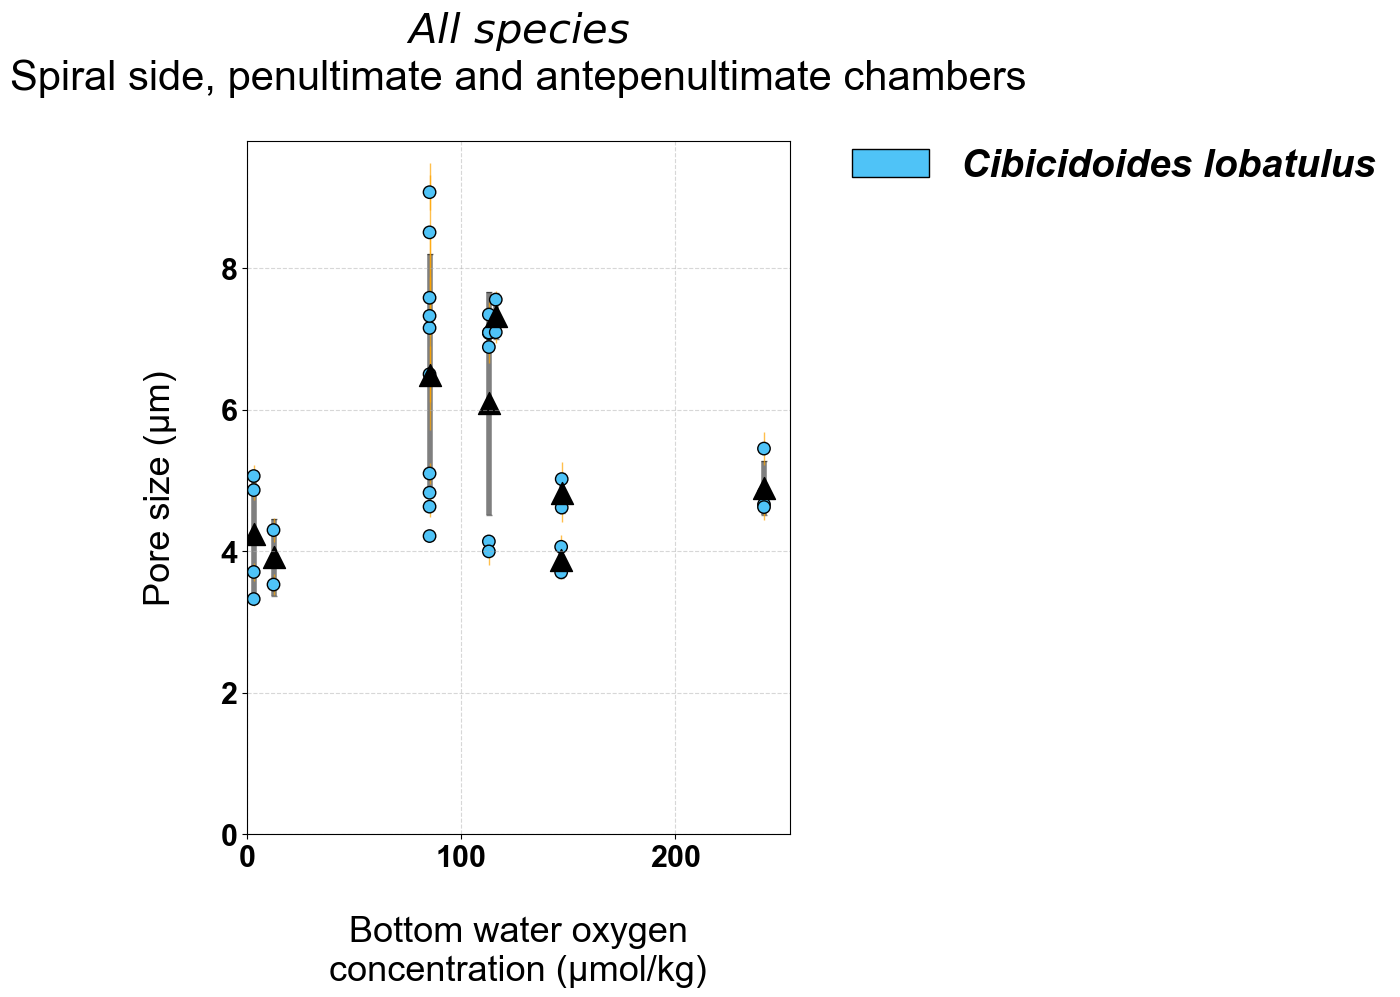

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Create a dictionary mapping each species to a color
species_colors = {
    'Cibicidoides lobatulus': '#4FC3F7',
    'Cibicidoides ungerianus': '#FFD54F',
    'Cibicidoides wuellerstorfi': '#EC407A',
    'Cibicidoides wuellerstorfi forma plana': '#B98AB6',
    'Cibicidoides wuellerstorfi forma convexa': '#C53FE3',
    'Planulina ariminensis': '#26A69A',
    'Planulina limbata': '#6D4C41',
    'Planulina ornata': '#AB47BC'
}

# Define the unique species values
unique_species = subset_dorsal_penultimate_antepenultimate['Species'].unique()

# Define a color palette with five colors
color_palette = sns.color_palette('Set1', n_colors=len(unique_species))

# Get the species values from the dataframe
species = subset_dorsal_penultimate_antepenultimate['Species']

# Create a list of colors corresponding to each species value
colors = [species_colors.get(s, 'black') for s in species]

# First dataset with unique values from the 'Sample' column
listofsamples = subset_dorsal_penultimate_antepenultimate['Sample'].unique()

x = subset_dorsal_penultimate_antepenultimate['DIVA oxygen']
y = subset_dorsal_penultimate_antepenultimate['DIAMETER AVERAGE']
yerror = subset_dorsal_penultimate_antepenultimate['DIAMETER DEV STD']

porosity_avg = subset_dorsal_penultimate_antepenultimate.groupby('Sample')['DIAMETER AVERAGE'].mean().reset_index()
porosity_std = subset_dorsal_penultimate_antepenultimate.groupby('Sample')['DIAMETER AVERAGE'].std().reset_index()
o2_avg = subset_dorsal_penultimate_antepenultimate.groupby('Sample')['DIVA oxygen'].mean().reset_index()

a = o2_avg['DIVA oxygen'].to_numpy()  # Convert to numpy array
b = porosity_avg['DIAMETER AVERAGE'].to_numpy()  # Convert to numpy array
error_y = porosity_std['DIAMETER AVERAGE'].to_numpy()  # Convert to numpy array

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate weights with added epsilon to avoid division by zero for individual data points
weights_individual = 1 / (yerror ** 2 + epsilon)

# Replace any NaN or infinite values in the data arrays with zeros for individual data points
x = np.nan_to_num(x)
y = np.nan_to_num(y)
weights_individual = np.nan_to_num(weights_individual)

# Add a constant to the independent variable (if needed) for individual data points
X_individual = sm.add_constant(x)

# Perform WLS regression for individual data points
model_individual = sm.WLS(y, X_individual, weights=weights_individual, missing='drop')
results_individual = model_individual.fit()

# Get regression summary for individual data points
print("WLS Regression for Individual Data Points:")
print(results_individual.summary())

# Predicted values from the first WLS regression
predicted_values_individual = results_individual.predict(X_individual)

# Calculate RMSE
rmse_individual = np.sqrt(mean_squared_error(x, predicted_values_individual))
print("RMSE for WLS regression for individual data points:", rmse_individual)

# Define generic column names for coefficients
column_names = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_individual.shape[1])]

# Perform Monte Carlo by resampling residuals
num_simulations = 1000  # Number of Monte Carlo simulations
simulated_coefficients = []
simulated_rmse_values = []  # List to store RMSE values
prediction_intervals = []  # List to store prediction intervals

for _ in range(num_simulations):
    # Generate random residuals with the same distribution
    simulated_residuals = np.random.normal(0, np.std(results_individual.resid), len(results_individual.resid))
    simulated_y = results_individual.fittedvalues + simulated_residuals

    # Fit the WLS model to the simulated data
    simulated_model = sm.WLS(simulated_y, X_individual, weights=weights_individual, missing='drop')
    simulated_results = simulated_model.fit()

    # Store the coefficients for each simulation
    simulated_coefficients.append(simulated_results.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values = np.dot(X_individual, simulated_results.params)
    rmse = np.sqrt(mean_squared_error(x, simulated_predicted_values))
    simulated_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval = 1.96 * np.std(simulated_residuals)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients
confidence_intervals = np.percentile(simulated_coefficients, [2.5, 97.5], axis=0)
print("Monte Carlo Confidence Intervals for Coefficients:")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {confidence_intervals[0][i]} - {confidence_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse = np.mean(simulated_rmse_values)
std_rmse = np.std(simulated_rmse_values)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse}")

# Calculate and print prediction intervals
mean_prediction_interval = np.mean(prediction_intervals)
std_prediction_interval = np.std(prediction_intervals)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval}")

# Perform bootstrapping for the first WLS regression for individual data points
num_bootstraps = 1000  # Number of bootstraps
bootstrap_coefficients = []
bootstrap_rmse_values = []  # List to store RMSE values
bootstrap_prediction_intervals = []  # List to store prediction intervals

for _ in range(num_bootstraps):
    # Resample data with replacement
    indices = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample = x[indices]
    bootstrap_y_sample = y[indices]
    bootstrap_weights_sample = weights_individual[indices]
    X_bootstrap_sample = sm.add_constant(bootstrap_x_sample)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model = sm.WLS(bootstrap_y_sample, X_bootstrap_sample, weights=bootstrap_weights_sample, missing='drop')
    bootstrap_results = bootstrap_model.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients.append(bootstrap_results.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values = np.dot(X_bootstrap_sample, bootstrap_results.params)
    rmse = np.sqrt(mean_squared_error(bootstrap_x_sample, bootstrap_predicted_values))
    bootstrap_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals = bootstrap_y_sample - bootstrap_predicted_values
    prediction_interval = 1.96 * np.std(bootstrap_residuals)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals = np.percentile(bootstrap_coefficients, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (First Regression):")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {bootstrap_intervals[0][i]} - {bootstrap_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse = np.mean(bootstrap_rmse_values)
std_bootstrap_rmse = np.std(bootstrap_rmse_values)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval = np.mean(bootstrap_prediction_intervals)
std_bootstrap_prediction_interval = np.std(bootstrap_prediction_intervals)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval}")

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate the sample size (number of specimens) for each site
sample_sizes = subset_dorsal_penultimate_antepenultimate.groupby('Sample')['Species'].count().reset_index()

# Calculate the inverse of sample sizes to use as weights for mean values
weights_mean = 1 / (sample_sizes['Species'] + epsilon)  # Use epsilon to avoid division by zero

# Replace any NaN or infinite values in the data arrays with zeros for mean values
a = np.nan_to_num(a)
b = np.nan_to_num(b)
weights_mean = np.nan_to_num(weights_mean)

# Add a constant to the independent variable (if needed) for mean values
X_mean = sm.add_constant(a)

# Perform WLS regression for mean values with sample size-based weights
model_mean_weighted = sm.WLS(b, X_mean, weights=weights_mean, missing='drop')
results_mean_weighted = model_mean_weighted.fit()

# Get regression summary for mean values with sample size-based weights
print("\nLinear WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_mean_weighted.summary())

# Predicted values from the second WLS regression
predicted_values_mean_weighted = results_mean_weighted.predict(X_mean)

# Calculate RMSE for mean values with sample size-based weights
rmse_mean_weighted = np.sqrt(mean_squared_error(a, predicted_values_mean_weighted))
print("RMSE for WLS regression for mean values with sample size-based weights:", rmse_mean_weighted)

# Define generic column names for coefficients
column_names_mean = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_mean.shape[1])]

# Perform Monte Carlo by resampling residuals for mean values
num_simulations_mean = 1000  # Number of Monte Carlo simulations for mean values
simulated_coefficients_mean = []
simulated_rmse_values_mean = []  # List to store RMSE values for mean values
prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_simulations_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_mean = np.random.normal(0, np.std(results_mean_weighted.resid), len(results_mean_weighted.resid))
    simulated_b = results_mean_weighted.fittedvalues + simulated_residuals_mean

    # Fit the WLS model to the simulated data for mean values
    simulated_model_mean = sm.WLS(simulated_b, X_mean, weights=weights_mean, missing='drop')
    simulated_results_mean = simulated_model_mean.fit()

    # Store the coefficients for each simulation for mean values
    simulated_coefficients_mean.append(simulated_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    simulated_predicted_values_mean = np.dot(X_mean, simulated_results_mean.params)
    rmse_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_mean))
    simulated_rmse_values_mean.append(rmse_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    prediction_interval_mean = 1.96 * np.std(simulated_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_mean.append(prediction_interval_mean)

# Calculate and print confidence intervals for coefficients for mean values
confidence_intervals_mean = np.percentile(simulated_coefficients_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {confidence_intervals_mean[0][i]} - {confidence_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values for mean values
mean_rmse_mean = np.mean(simulated_rmse_values_mean)
std_rmse_mean = np.std(simulated_rmse_values_mean)
print(f"Mean RMSE across Monte Carlo runs (Mean Values): {mean_rmse_mean}")
print(f"Std RMSE across Monte Carlo runs (Mean Values): {std_rmse_mean}")

# Calculate and print prediction intervals for mean values
mean_prediction_interval_mean = np.mean(prediction_intervals_mean)
std_prediction_interval_mean = np.std(prediction_intervals_mean)
print(f"Mean Prediction Interval across Monte Carlo runs (Mean Values): {mean_prediction_interval_mean}")
print(f"Std Prediction Interval across Monte Carlo runs (Mean Values): {std_prediction_interval_mean}")

# Perform bootstrapping for the second WLS regression for mean values
num_bootstraps_mean = 1000  # Number of bootstraps for mean values
bootstrap_coefficients_mean = []
bootstrap_rmse_values_mean = []  # List to store RMSE values for mean values
bootstrap_prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_bootstraps_mean):
    # Resample data with replacement for mean values
    indices_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample = a[indices_mean]
    bootstrap_b_sample = b[indices_mean]
    bootstrap_weights_sample_mean = weights_mean[indices_mean]
    X_bootstrap_sample_mean = sm.add_constant(bootstrap_a_sample)

    # Fit the WLS model to the bootstrapped data for mean values
    bootstrap_model_mean = sm.WLS(bootstrap_b_sample, X_bootstrap_sample_mean, weights=bootstrap_weights_sample_mean, missing='drop')
    bootstrap_results_mean = bootstrap_model_mean.fit()

    # Store the coefficients for each bootstrap sample for mean values
    bootstrap_coefficients_mean.append(bootstrap_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    bootstrap_predicted_values_mean = np.dot(X_bootstrap_sample_mean, bootstrap_results_mean.params)
    rmse_mean_bootstrap = np.sqrt(mean_squared_error(bootstrap_a_sample, bootstrap_predicted_values_mean))
    bootstrap_rmse_values_mean.append(rmse_mean_bootstrap)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    bootstrap_residuals_mean = bootstrap_b_sample - bootstrap_predicted_values_mean
    prediction_interval_mean_bootstrap = 1.96 * np.std(bootstrap_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_mean.append(prediction_interval_mean_bootstrap)

# Calculate and print confidence intervals for coefficients for the second regression for mean values
bootstrap_intervals_mean = np.percentile(bootstrap_coefficients_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_mean[0][i]} - {bootstrap_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping for mean values
mean_bootstrap_rmse_mean = np.mean(bootstrap_rmse_values_mean)
std_bootstrap_rmse_mean = np.std(bootstrap_rmse_values_mean)
print(f"Mean RMSE across bootstraps (Mean Values): {mean_bootstrap_rmse_mean}")
print(f"Std RMSE across bootstraps (Mean Values): {std_bootstrap_rmse_mean}")

# Calculate and print prediction intervals for bootstrapping for mean values
mean_bootstrap_prediction_interval_mean = np.mean(bootstrap_prediction_intervals_mean)
std_bootstrap_prediction_interval_mean = np.std(bootstrap_prediction_intervals_mean)
print(f"Mean Prediction Interval across bootstraps (Mean Values): {mean_bootstrap_prediction_interval_mean}")
print(f"Std Prediction Interval across bootstraps (Mean Values): {std_bootstrap_prediction_interval_mean}")

# Define the logarithmic function for the regression model
def logarithmic_model(x, params):
    a, b = params
    return a * np.log(x) + b

# Fit the logarithmic model using WLS for individual data points
log_y = np.log(np.maximum(y, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_individual = np.nan_to_num(weights_individual)
log_weights_individual[log_y == -np.inf] = 0  # Set weights to zero for invalid values
log_X_individual = sm.add_constant(x)
results_log_individual = sm.WLS(log_y, log_X_individual, weights=log_weights_individual, missing='drop').fit()

# Get regression summary for individual data points
print("\nWLS Logarithmic Regression for Individual Data Points:")
print(results_log_individual.summary())

# Predicted values from the first logarithmic regression
predicted_values_log_individual = results_log_individual.predict(log_X_individual)

# Calculate RMSE
rmse_log_individual = np.sqrt(mean_squared_error(x, np.exp(predicted_values_log_individual)))
print("RMSE for logarithmic regression for individual data points:", rmse_log_individual)

# Define generic column names for coefficients
column_names_log = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log = []
simulated_rmse_values_log = []  # List to store RMSE values
prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_simulations_log):
    # Generate random residuals with the same distribution
    simulated_residuals_log = np.random.normal(0, np.std(results_log_individual.resid), len(results_log_individual.resid))
    simulated_log_y = results_log_individual.fittedvalues + simulated_residuals_log

    # Fit the WLS model to the simulated data
    simulated_model_log = sm.WLS(simulated_log_y, log_X_individual, weights=log_weights_individual, missing='drop')
    simulated_results_log = simulated_model_log.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log.append(simulated_results_log.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log = np.exp(simulated_results_log.predict(log_X_individual))
    rmse_log = np.sqrt(mean_squared_error(x, simulated_predicted_values_log))
    simulated_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log = 1.96 * np.std(simulated_residuals_log)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log = np.percentile(simulated_coefficients_log, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {confidence_intervals_log[0][i]} - {confidence_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log = np.mean(simulated_rmse_values_log)
std_rmse_log = np.std(simulated_rmse_values_log)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log}")

# Calculate and print prediction intervals
mean_prediction_interval_log = np.mean(prediction_intervals_log)
std_prediction_interval_log = np.std(prediction_intervals_log)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log}")

# Perform bootstrapping for the first WLS logarithmic regression for individual data points
num_bootstraps_log = 1000  # Number of bootstraps
bootstrap_coefficients_log = []
bootstrap_rmse_values_log = []  # List to store RMSE values
bootstrap_prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_bootstraps_log):
    # Resample data with replacement
    indices_log = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample_log = x[indices_log]
    bootstrap_y_sample_log = y[indices_log]
    bootstrap_weights_sample_log = log_weights_individual[indices_log]
    X_bootstrap_sample_log = sm.add_constant(bootstrap_x_sample_log)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log = sm.WLS(bootstrap_y_sample_log, X_bootstrap_sample_log, weights=bootstrap_weights_sample_log, missing='drop')
    bootstrap_results_log = bootstrap_model_log.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log.append(bootstrap_results_log.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log = np.exp(bootstrap_results_log.predict(X_bootstrap_sample_log))
    rmse_log = np.sqrt(mean_squared_error(bootstrap_x_sample_log, bootstrap_predicted_values_log))
    bootstrap_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log = bootstrap_y_sample_log - bootstrap_predicted_values_log
    prediction_interval_log = 1.96 * np.std(bootstrap_residuals_log)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals_log = np.percentile(bootstrap_coefficients_log, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - First Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {bootstrap_intervals_log[0][i]} - {bootstrap_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log = np.mean(bootstrap_rmse_values_log)
std_bootstrap_rmse_log = np.std(bootstrap_rmse_values_log)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log = np.mean(bootstrap_prediction_intervals_log)
std_bootstrap_prediction_interval_log = np.std(bootstrap_prediction_intervals_log)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log}")

# Fit the logarithmic model using WLS for mean values with sample size-based weights
log_b = np.log(np.maximum(b, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_mean = np.nan_to_num(weights_mean)
log_weights_mean[log_b == -np.inf] = 0  # Set weights to zero for invalid values
log_X_mean = sm.add_constant(a)
results_log_mean_weighted = sm.WLS(log_b, log_X_mean, weights=log_weights_mean, missing='drop').fit()

# Get regression summary for mean values with sample size-based weights
print("\nLogarithmic WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_log_mean_weighted.summary())

# Predicted values from the logarithmic regression
predicted_values_log_mean_weighted = results_log_mean_weighted.predict(log_X_mean)

# Calculate RMSE
rmse_log_mean_weighted = np.sqrt(mean_squared_error(a, np.exp(predicted_values_log_mean_weighted)))
print("RMSE for logarithmic regression for mean values with sample size-based weights:", rmse_log_mean_weighted)

# Define generic column names for coefficients
column_names_log_mean = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log_mean = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log_mean = []
simulated_rmse_values_log_mean = []  # List to store RMSE values
prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_simulations_log_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_log_mean = np.random.normal(0, np.std(results_log_mean_weighted.resid), len(results_log_mean_weighted.resid))
    simulated_log_b = results_log_mean_weighted.fittedvalues + simulated_residuals_log_mean

    # Fit the WLS model to the simulated data
    simulated_model_log_mean = sm.WLS(simulated_log_b, log_X_mean, weights=log_weights_mean, missing='drop')
    simulated_results_log_mean = simulated_model_log_mean.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log_mean.append(simulated_results_log_mean.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log_mean = np.exp(simulated_results_log_mean.predict(log_X_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_log_mean))
    simulated_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log_mean = 1.96 * np.std(simulated_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log_mean = np.percentile(simulated_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {confidence_intervals_log_mean[0][i]} - {confidence_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log_mean = np.mean(simulated_rmse_values_log_mean)
std_rmse_log_mean = np.std(simulated_rmse_values_log_mean)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log_mean}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log_mean}")

# Calculate and print prediction intervals
mean_prediction_interval_log_mean = np.mean(prediction_intervals_log_mean)
std_prediction_interval_log_mean = np.std(prediction_intervals_log_mean)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log_mean}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log_mean}")

# Perform bootstrapping for the logarithmic regression for mean values with sample size-based weights
num_bootstraps_log_mean = 1000  # Number of bootstraps
bootstrap_coefficients_log_mean = []
bootstrap_rmse_values_log_mean = []  # List to store RMSE values
bootstrap_prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_bootstraps_log_mean):
    # Resample data with replacement
    indices_log_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample_log_mean = a[indices_log_mean]
    bootstrap_b_sample_log_mean = b[indices_log_mean]
    bootstrap_weights_sample_log_mean = log_weights_mean[indices_log_mean]
    X_bootstrap_sample_log_mean = sm.add_constant(bootstrap_a_sample_log_mean)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log_mean = sm.WLS(bootstrap_b_sample_log_mean, X_bootstrap_sample_log_mean, weights=bootstrap_weights_sample_log_mean, missing='drop')
    bootstrap_results_log_mean = bootstrap_model_log_mean.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log_mean.append(bootstrap_results_log_mean.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log_mean = np.exp(bootstrap_results_log_mean.predict(X_bootstrap_sample_log_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(bootstrap_a_sample_log_mean, bootstrap_predicted_values_log_mean))
    bootstrap_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log_mean = bootstrap_b_sample_log_mean - bootstrap_predicted_values_log_mean
    prediction_interval_log_mean = 1.96 * np.std(bootstrap_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients for the bootstrapped regression
bootstrap_intervals_log_mean = np.percentile(bootstrap_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_log_mean[0][i]} - {bootstrap_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log_mean = np.mean(bootstrap_rmse_values_log_mean)
std_bootstrap_rmse_log_mean = np.std(bootstrap_rmse_values_log_mean)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log_mean}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log_mean}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log_mean = np.mean(bootstrap_prediction_intervals_log_mean)
std_bootstrap_prediction_interval_log_mean = np.std(bootstrap_prediction_intervals_log_mean)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log_mean}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log_mean}")

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(7, 9))
ax.scatter(x, y, c=colors, s=80, alpha=1, marker='o', label="Individual measurement", zorder=0, edgecolors='black', linewidths=1)
ax.errorbar(x, y, yerr=yerror, fmt='none', color='orange', alpha=0.7, capsize=0, zorder=-1, linewidth=1, label="Porosity dev. std.")
ax.scatter(a, b, color='black', s=250, alpha=1, marker='^', label="Mean by site", zorder=1)  # Customize marker color, transparency, and edge color
ax.errorbar(a, b, yerr=error_y, fmt='none', color='black', alpha=0.5, capsize=2, zorder=-5, linewidth=4, label="Porosity dev. std.")

# Add error bars on the y-axis
#ax.set_ylim(0, 42)
ax.set_xlabel('\nBottom water oxygen\nconcentration (µmol/kg)', fontsize=26, fontname='Arial')
ax.set_ylabel('Pore size (µm)\n', fontsize=26, fontname='Arial')
ax.set_title(r'$\mathit{All\ species}$' + '\nSpiral side, penultimate and antepenultimate chambers\n', fontsize=30, fontname='Arial')

# Customize tick label font size
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)

# Change tick label font to Arial
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontname('Arial')
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontname('Arial')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5, zorder=-5)

# Create color-coded patches (circles) with italic labels for the legend
legend_patches = [mpatches.Circle((0.5, 0.5), radius=0.25, facecolor=species_colors[species], edgecolor='black') for species in unique_species]
legend_labels = [f"{species}" for species in unique_species]

# Customize legend patches and labels
for patch in legend_patches:
    patch.set_label('')  # Clear default label
    patch.set_facecolor(patch.get_facecolor())
    patch.set_edgecolor(patch.get_edgecolor())

# Add legend with color-coded labels in italic
ax.legend(handles=legend_patches, labels=legend_labels, bbox_to_anchor=(1.05, 1.04), loc='upper left', frameon=False, prop={'family': 'Arial', 'size': 28, 'style': 'italic'})

ax.set_xlim(left=0)  # Set the left limit of the x-axis to 0
ax.set_ylim(bottom=-0.001)  # Set the bottom limit of the y-axis to 0

save_path = f"Datasets/Created Figures/Pore size {species_name} PAC Spiral.jpg"
plt.savefig(save_path, dpi=999, bbox_inches='tight')

plt.show()

# [2] BWDO vs pore patterns / all chambers (entire umbilical and spiral sides)

## Umbilical side (ventral) - porosity

WLS Regression for Individual Data Points:
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.168
Model:                            WLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     3.638
Date:                Tue, 11 Jun 2024   Prob (F-statistic):             0.0726
Time:                        18:26:37   Log-Likelihood:                -57.204
No. Observations:                  20   AIC:                             118.4
Df Residuals:                      18   BIC:                             120.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Mean Values):
Intercept: 4.9611179173931035 - 13.019781761930325
Coefficient_1: -0.07241331034469128 - -0.012287201202917207
Mean RMSE across Monte Carlo runs (Mean Values): 134.16964061392827
Std RMSE across Monte Carlo runs (Mean Values): 1.04376663684956
Mean Prediction Interval across Monte Carlo runs (Mean Values): 5.028626165144236
Std Prediction Interval across Monte Carlo runs (Mean Values): 1.2974782486505854

Bootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):
Intercept: 4.249606530736427 - 13.326639958199824
Coefficient_1: -0.07781261283684361 - -0.01336514625428251
Mean RMSE across bootstraps (Mean Values): 132.46365032356482
Std RMSE across bootstraps (Mean Values): 21.85203528656663
Mean Prediction Interval across bootstraps (Mean Values): 4.7543522968649015
Std Prediction Interval across bootstraps (Mean Values): 1.069076743082662

WLS Logarithmic Regression for Individual Data Points:

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 0.5490844263268244 - 3.626448084518848
Coefficient_1: -0.021840781645112002 - -0.0009270498650492243
Mean RMSE across Monte Carlo runs: 134.75704462517385
Std RMSE across Monte Carlo runs: 0.5460953038792834
Mean Prediction Interval across Monte Carlo runs: 1.9006210309178455
Std Prediction Interval across Monte Carlo runs: 0.4818813776083568

Bootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 4.199306406073182 - 13.990472992448764
Coefficient_1: -0.08128826132433893 - -0.014371161047031296
Mean RMSE across bootstraps: 42225.79641789399
Std RMSE across bootstraps: 300326.9711710829
Mean Prediction Interval across bootstraps: 74395.65538620568
Std Prediction Interval across bootstraps: 551745.3066656803


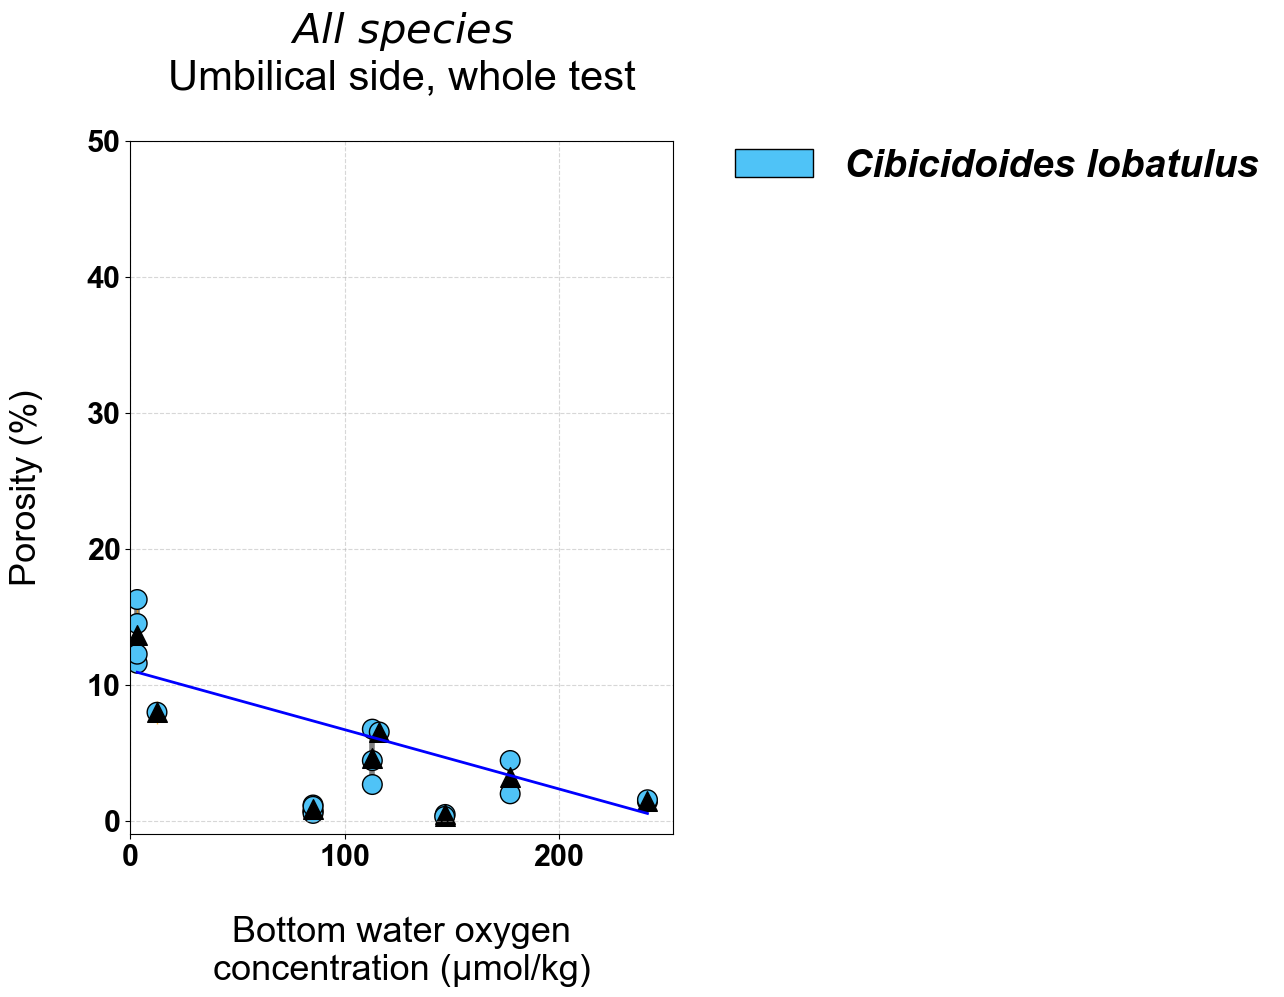

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Create a dictionary mapping each species to a color
species_colors = {
    'Cibicidoides lobatulus': '#4FC3F7',
    'Cibicidoides ungerianus': '#FFD54F',
    'Cibicidoides wuellerstorfi': '#EC407A',
    'Cibicidoides wuellerstorfi forma plana': '#B98AB6',
    'Cibicidoides wuellerstorfi forma convexa': '#C53FE3',
    'Planulina ariminensis': '#26A69A',
    'Planulina limbata': '#6D4C41',
    'Planulina ornata': '#AB47BC'
}

# Define the unique species values
unique_species = subset_ventral_whole_test['Species'].unique()

# Define a color palette with five colors
color_palette = sns.color_palette('Set1', n_colors=len(unique_species))

# Get the species values from the dataframe
species = subset_ventral_whole_test['Species']

# Create a list of colors corresponding to each species value
colors = [species_colors.get(s, 'black') for s in species]

# First dataset with unique values from the 'Sample' column
listofsamples = subset_ventral_whole_test['Sample'].unique()

x = subset_ventral_whole_test['DIVA oxygen']
y = subset_ventral_whole_test['POROSITY AVERAGE']
yerror = subset_ventral_whole_test['POROSITY DEV STD']

porosity_avg = subset_ventral_whole_test.groupby('Sample')['POROSITY AVERAGE'].mean().reset_index()
porosity_std = subset_ventral_whole_test.groupby('Sample')['POROSITY AVERAGE'].std().reset_index()
o2_avg = subset_ventral_whole_test.groupby('Sample')['DIVA oxygen'].mean().reset_index()

a = o2_avg['DIVA oxygen'].to_numpy()  # Convert to numpy array
b = porosity_avg['POROSITY AVERAGE'].to_numpy()  # Convert to numpy array
error_y = porosity_std['POROSITY AVERAGE'].to_numpy()  # Convert to numpy array

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate weights with added epsilon to avoid division by zero for individual data points
weights_individual = 1 / (yerror ** 2 + epsilon)

# Replace any NaN or infinite values in the data arrays with zeros for individual data points
x = np.nan_to_num(x)
y = np.nan_to_num(y)
weights_individual = np.nan_to_num(weights_individual)

# Add a constant to the independent variable (if needed) for individual data points
X_individual = sm.add_constant(x)

# Perform WLS regression for individual data points
model_individual = sm.WLS(y, X_individual, weights=weights_individual, missing='drop')
results_individual = model_individual.fit()

# Get regression summary for individual data points
print("WLS Regression for Individual Data Points:")
print(results_individual.summary())

# Predicted values from the first WLS regression
predicted_values_individual = results_individual.predict(X_individual)

# Calculate RMSE
rmse_individual = np.sqrt(mean_squared_error(x, predicted_values_individual))
print("RMSE for WLS regression for individual data points:", rmse_individual)

# Define generic column names for coefficients
column_names = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_individual.shape[1])]

# Perform Monte Carlo by resampling residuals
num_simulations = 1000  # Number of Monte Carlo simulations
simulated_coefficients = []
simulated_rmse_values = []  # List to store RMSE values
prediction_intervals = []  # List to store prediction intervals

for _ in range(num_simulations):
    # Generate random residuals with the same distribution
    simulated_residuals = np.random.normal(0, np.std(results_individual.resid), len(results_individual.resid))
    simulated_y = results_individual.fittedvalues + simulated_residuals

    # Fit the WLS model to the simulated data
    simulated_model = sm.WLS(simulated_y, X_individual, weights=weights_individual, missing='drop')
    simulated_results = simulated_model.fit()

    # Store the coefficients for each simulation
    simulated_coefficients.append(simulated_results.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values = np.dot(X_individual, simulated_results.params)
    rmse = np.sqrt(mean_squared_error(x, simulated_predicted_values))
    simulated_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval = 1.96 * np.std(simulated_residuals)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients
confidence_intervals = np.percentile(simulated_coefficients, [2.5, 97.5], axis=0)
print("Monte Carlo Confidence Intervals for Coefficients:")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {confidence_intervals[0][i]} - {confidence_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse = np.mean(simulated_rmse_values)
std_rmse = np.std(simulated_rmse_values)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse}")

# Calculate and print prediction intervals
mean_prediction_interval = np.mean(prediction_intervals)
std_prediction_interval = np.std(prediction_intervals)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval}")

# Perform bootstrapping for the first WLS regression for individual data points
num_bootstraps = 1000  # Number of bootstraps
bootstrap_coefficients = []
bootstrap_rmse_values = []  # List to store RMSE values
bootstrap_prediction_intervals = []  # List to store prediction intervals

for _ in range(num_bootstraps):
    # Resample data with replacement
    indices = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample = x[indices]
    bootstrap_y_sample = y[indices]
    bootstrap_weights_sample = weights_individual[indices]
    X_bootstrap_sample = sm.add_constant(bootstrap_x_sample)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model = sm.WLS(bootstrap_y_sample, X_bootstrap_sample, weights=bootstrap_weights_sample, missing='drop')
    bootstrap_results = bootstrap_model.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients.append(bootstrap_results.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values = np.dot(X_bootstrap_sample, bootstrap_results.params)
    rmse = np.sqrt(mean_squared_error(bootstrap_x_sample, bootstrap_predicted_values))
    bootstrap_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals = bootstrap_y_sample - bootstrap_predicted_values
    prediction_interval = 1.96 * np.std(bootstrap_residuals)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals = np.percentile(bootstrap_coefficients, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (First Regression):")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {bootstrap_intervals[0][i]} - {bootstrap_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse = np.mean(bootstrap_rmse_values)
std_bootstrap_rmse = np.std(bootstrap_rmse_values)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval = np.mean(bootstrap_prediction_intervals)
std_bootstrap_prediction_interval = np.std(bootstrap_prediction_intervals)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval}")

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate the sample size (number of specimens) for each site
sample_sizes = subset_ventral_whole_test.groupby('Sample')['Species'].count().reset_index()

# Calculate the inverse of sample sizes to use as weights for mean values
weights_mean = 1 / (sample_sizes['Species'] + epsilon)  # Use epsilon to avoid division by zero

# Replace any NaN or infinite values in the data arrays with zeros for mean values
a = np.nan_to_num(a)
b = np.nan_to_num(b)
weights_mean = np.nan_to_num(weights_mean)

# Add a constant to the independent variable (if needed) for mean values
X_mean = sm.add_constant(a)

# Perform WLS regression for mean values with sample size-based weights
model_mean_weighted = sm.WLS(b, X_mean, weights=weights_mean, missing='drop')
results_mean_weighted = model_mean_weighted.fit()

# Get regression summary for mean values with sample size-based weights
print("\nLinear WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_mean_weighted.summary())

# Predicted values from the second WLS regression
predicted_values_mean_weighted = results_mean_weighted.predict(X_mean)

# Calculate RMSE for mean values with sample size-based weights
rmse_mean_weighted = np.sqrt(mean_squared_error(a, predicted_values_mean_weighted))
print("RMSE for WLS regression for mean values with sample size-based weights:", rmse_mean_weighted)

# Define generic column names for coefficients
column_names_mean = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_mean.shape[1])]

# Perform Monte Carlo by resampling residuals for mean values
num_simulations_mean = 1000  # Number of Monte Carlo simulations for mean values
simulated_coefficients_mean = []
simulated_rmse_values_mean = []  # List to store RMSE values for mean values
prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_simulations_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_mean = np.random.normal(0, np.std(results_mean_weighted.resid), len(results_mean_weighted.resid))
    simulated_b = results_mean_weighted.fittedvalues + simulated_residuals_mean

    # Fit the WLS model to the simulated data for mean values
    simulated_model_mean = sm.WLS(simulated_b, X_mean, weights=weights_mean, missing='drop')
    simulated_results_mean = simulated_model_mean.fit()

    # Store the coefficients for each simulation for mean values
    simulated_coefficients_mean.append(simulated_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    simulated_predicted_values_mean = np.dot(X_mean, simulated_results_mean.params)
    rmse_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_mean))
    simulated_rmse_values_mean.append(rmse_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    prediction_interval_mean = 1.96 * np.std(simulated_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_mean.append(prediction_interval_mean)

# Calculate and print confidence intervals for coefficients for mean values
confidence_intervals_mean = np.percentile(simulated_coefficients_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {confidence_intervals_mean[0][i]} - {confidence_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values for mean values
mean_rmse_mean = np.mean(simulated_rmse_values_mean)
std_rmse_mean = np.std(simulated_rmse_values_mean)
print(f"Mean RMSE across Monte Carlo runs (Mean Values): {mean_rmse_mean}")
print(f"Std RMSE across Monte Carlo runs (Mean Values): {std_rmse_mean}")

# Calculate and print prediction intervals for mean values
mean_prediction_interval_mean = np.mean(prediction_intervals_mean)
std_prediction_interval_mean = np.std(prediction_intervals_mean)
print(f"Mean Prediction Interval across Monte Carlo runs (Mean Values): {mean_prediction_interval_mean}")
print(f"Std Prediction Interval across Monte Carlo runs (Mean Values): {std_prediction_interval_mean}")

# Perform bootstrapping for the second WLS regression for mean values
num_bootstraps_mean = 1000  # Number of bootstraps for mean values
bootstrap_coefficients_mean = []
bootstrap_rmse_values_mean = []  # List to store RMSE values for mean values
bootstrap_prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_bootstraps_mean):
    # Resample data with replacement for mean values
    indices_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample = a[indices_mean]
    bootstrap_b_sample = b[indices_mean]
    bootstrap_weights_sample_mean = weights_mean[indices_mean]
    X_bootstrap_sample_mean = sm.add_constant(bootstrap_a_sample)

    # Fit the WLS model to the bootstrapped data for mean values
    bootstrap_model_mean = sm.WLS(bootstrap_b_sample, X_bootstrap_sample_mean, weights=bootstrap_weights_sample_mean, missing='drop')
    bootstrap_results_mean = bootstrap_model_mean.fit()

    # Store the coefficients for each bootstrap sample for mean values
    bootstrap_coefficients_mean.append(bootstrap_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    bootstrap_predicted_values_mean = np.dot(X_bootstrap_sample_mean, bootstrap_results_mean.params)
    rmse_mean_bootstrap = np.sqrt(mean_squared_error(bootstrap_a_sample, bootstrap_predicted_values_mean))
    bootstrap_rmse_values_mean.append(rmse_mean_bootstrap)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    bootstrap_residuals_mean = bootstrap_b_sample - bootstrap_predicted_values_mean
    prediction_interval_mean_bootstrap = 1.96 * np.std(bootstrap_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_mean.append(prediction_interval_mean_bootstrap)

# Calculate and print confidence intervals for coefficients for the second regression for mean values
bootstrap_intervals_mean = np.percentile(bootstrap_coefficients_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_mean[0][i]} - {bootstrap_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping for mean values
mean_bootstrap_rmse_mean = np.mean(bootstrap_rmse_values_mean)
std_bootstrap_rmse_mean = np.std(bootstrap_rmse_values_mean)
print(f"Mean RMSE across bootstraps (Mean Values): {mean_bootstrap_rmse_mean}")
print(f"Std RMSE across bootstraps (Mean Values): {std_bootstrap_rmse_mean}")

# Calculate and print prediction intervals for bootstrapping for mean values
mean_bootstrap_prediction_interval_mean = np.mean(bootstrap_prediction_intervals_mean)
std_bootstrap_prediction_interval_mean = np.std(bootstrap_prediction_intervals_mean)
print(f"Mean Prediction Interval across bootstraps (Mean Values): {mean_bootstrap_prediction_interval_mean}")
print(f"Std Prediction Interval across bootstraps (Mean Values): {std_bootstrap_prediction_interval_mean}")

# Define the logarithmic function for the regression model
def logarithmic_model(x, params):
    a, b = params
    return a * np.log(x) + b

# Fit the logarithmic model using WLS for individual data points
log_y = np.log(np.maximum(y, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_individual = np.nan_to_num(weights_individual)
log_weights_individual[log_y == -np.inf] = 0  # Set weights to zero for invalid values
log_X_individual = sm.add_constant(x)
results_log_individual = sm.WLS(log_y, log_X_individual, weights=log_weights_individual, missing='drop').fit()

# Get regression summary for individual data points
print("\nWLS Logarithmic Regression for Individual Data Points:")
print(results_log_individual.summary())

# Predicted values from the first logarithmic regression
predicted_values_log_individual = results_log_individual.predict(log_X_individual)

# Calculate RMSE
rmse_log_individual = np.sqrt(mean_squared_error(x, np.exp(predicted_values_log_individual)))
print("RMSE for logarithmic regression for individual data points:", rmse_log_individual)

# Define generic column names for coefficients
column_names_log = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log = []
simulated_rmse_values_log = []  # List to store RMSE values
prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_simulations_log):
    # Generate random residuals with the same distribution
    simulated_residuals_log = np.random.normal(0, np.std(results_log_individual.resid), len(results_log_individual.resid))
    simulated_log_y = results_log_individual.fittedvalues + simulated_residuals_log

    # Fit the WLS model to the simulated data
    simulated_model_log = sm.WLS(simulated_log_y, log_X_individual, weights=log_weights_individual, missing='drop')
    simulated_results_log = simulated_model_log.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log.append(simulated_results_log.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log = np.exp(simulated_results_log.predict(log_X_individual))
    rmse_log = np.sqrt(mean_squared_error(x, simulated_predicted_values_log))
    simulated_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log = 1.96 * np.std(simulated_residuals_log)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log = np.percentile(simulated_coefficients_log, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {confidence_intervals_log[0][i]} - {confidence_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log = np.mean(simulated_rmse_values_log)
std_rmse_log = np.std(simulated_rmse_values_log)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log}")

# Calculate and print prediction intervals
mean_prediction_interval_log = np.mean(prediction_intervals_log)
std_prediction_interval_log = np.std(prediction_intervals_log)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log}")

# Perform bootstrapping for the first WLS logarithmic regression for individual data points
num_bootstraps_log = 1000  # Number of bootstraps
bootstrap_coefficients_log = []
bootstrap_rmse_values_log = []  # List to store RMSE values
bootstrap_prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_bootstraps_log):
    # Resample data with replacement
    indices_log = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample_log = x[indices_log]
    bootstrap_y_sample_log = y[indices_log]
    bootstrap_weights_sample_log = log_weights_individual[indices_log]
    X_bootstrap_sample_log = sm.add_constant(bootstrap_x_sample_log)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log = sm.WLS(bootstrap_y_sample_log, X_bootstrap_sample_log, weights=bootstrap_weights_sample_log, missing='drop')
    bootstrap_results_log = bootstrap_model_log.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log.append(bootstrap_results_log.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log = np.exp(bootstrap_results_log.predict(X_bootstrap_sample_log))
    rmse_log = np.sqrt(mean_squared_error(bootstrap_x_sample_log, bootstrap_predicted_values_log))
    bootstrap_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log = bootstrap_y_sample_log - bootstrap_predicted_values_log
    prediction_interval_log = 1.96 * np.std(bootstrap_residuals_log)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals_log = np.percentile(bootstrap_coefficients_log, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - First Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {bootstrap_intervals_log[0][i]} - {bootstrap_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log = np.mean(bootstrap_rmse_values_log)
std_bootstrap_rmse_log = np.std(bootstrap_rmse_values_log)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log = np.mean(bootstrap_prediction_intervals_log)
std_bootstrap_prediction_interval_log = np.std(bootstrap_prediction_intervals_log)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log}")

# Fit the logarithmic model using WLS for mean values with sample size-based weights
log_b = np.log(np.maximum(b, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_mean = np.nan_to_num(weights_mean)
log_weights_mean[log_b == -np.inf] = 0  # Set weights to zero for invalid values
log_X_mean = sm.add_constant(a)
results_log_mean_weighted = sm.WLS(log_b, log_X_mean, weights=log_weights_mean, missing='drop').fit()

# Get regression summary for mean values with sample size-based weights
print("\nLogarithmic WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_log_mean_weighted.summary())

# Predicted values from the logarithmic regression
predicted_values_log_mean_weighted = results_log_mean_weighted.predict(log_X_mean)

# Calculate RMSE
rmse_log_mean_weighted = np.sqrt(mean_squared_error(a, np.exp(predicted_values_log_mean_weighted)))
print("RMSE for logarithmic regression for mean values with sample size-based weights:", rmse_log_mean_weighted)

# Define generic column names for coefficients
column_names_log_mean = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log_mean = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log_mean = []
simulated_rmse_values_log_mean = []  # List to store RMSE values
prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_simulations_log_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_log_mean = np.random.normal(0, np.std(results_log_mean_weighted.resid), len(results_log_mean_weighted.resid))
    simulated_log_b = results_log_mean_weighted.fittedvalues + simulated_residuals_log_mean

    # Fit the WLS model to the simulated data
    simulated_model_log_mean = sm.WLS(simulated_log_b, log_X_mean, weights=log_weights_mean, missing='drop')
    simulated_results_log_mean = simulated_model_log_mean.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log_mean.append(simulated_results_log_mean.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log_mean = np.exp(simulated_results_log_mean.predict(log_X_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_log_mean))
    simulated_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log_mean = 1.96 * np.std(simulated_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log_mean = np.percentile(simulated_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {confidence_intervals_log_mean[0][i]} - {confidence_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log_mean = np.mean(simulated_rmse_values_log_mean)
std_rmse_log_mean = np.std(simulated_rmse_values_log_mean)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log_mean}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log_mean}")

# Calculate and print prediction intervals
mean_prediction_interval_log_mean = np.mean(prediction_intervals_log_mean)
std_prediction_interval_log_mean = np.std(prediction_intervals_log_mean)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log_mean}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log_mean}")

# Perform bootstrapping for the logarithmic regression for mean values with sample size-based weights
num_bootstraps_log_mean = 1000  # Number of bootstraps
bootstrap_coefficients_log_mean = []
bootstrap_rmse_values_log_mean = []  # List to store RMSE values
bootstrap_prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_bootstraps_log_mean):
    # Resample data with replacement
    indices_log_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample_log_mean = a[indices_log_mean]
    bootstrap_b_sample_log_mean = b[indices_log_mean]
    bootstrap_weights_sample_log_mean = log_weights_mean[indices_log_mean]
    X_bootstrap_sample_log_mean = sm.add_constant(bootstrap_a_sample_log_mean)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log_mean = sm.WLS(bootstrap_b_sample_log_mean, X_bootstrap_sample_log_mean, weights=bootstrap_weights_sample_log_mean, missing='drop')
    bootstrap_results_log_mean = bootstrap_model_log_mean.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log_mean.append(bootstrap_results_log_mean.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log_mean = np.exp(bootstrap_results_log_mean.predict(X_bootstrap_sample_log_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(bootstrap_a_sample_log_mean, bootstrap_predicted_values_log_mean))
    bootstrap_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log_mean = bootstrap_b_sample_log_mean - bootstrap_predicted_values_log_mean
    prediction_interval_log_mean = 1.96 * np.std(bootstrap_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients for the bootstrapped regression
bootstrap_intervals_log_mean = np.percentile(bootstrap_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_log_mean[0][i]} - {bootstrap_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log_mean = np.mean(bootstrap_rmse_values_log_mean)
std_bootstrap_rmse_log_mean = np.std(bootstrap_rmse_values_log_mean)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log_mean}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log_mean}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log_mean = np.mean(bootstrap_prediction_intervals_log_mean)
std_bootstrap_prediction_interval_log_mean = np.std(bootstrap_prediction_intervals_log_mean)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log_mean}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log_mean}")

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(7, 9))
ax.scatter(x, y, c=colors, s=200, alpha=1, marker='o', label="Individual measurement", zorder=0, edgecolors='black', linewidths=1)
ax.errorbar(x, y, yerr=yerror, fmt='none', color='orange', alpha=0.7, capsize=0, zorder=-1, linewidth=1, label="Porosity dev. std.")
ax.scatter(a, b, color='black', s=200, alpha=1, marker='^', label="Mean by site", zorder=1)  # Customize marker color, transparency, and edge color
ax.errorbar(a, b, yerr=error_y, fmt='none', color='black', alpha=0.5, capsize=2, zorder=-5, linewidth=4, label="Porosity dev. std.")

# Extract coefficients from WLS regression results
intercept, slope = 7.1567, -0.1387  # Replace with actual coefficients from your WLS regression results

# Generate predicted y values for the regression line
# We use the range of x values for generating a smooth line
x_range = np.linspace(min(x), max(x), 500)  # Replace 'min(x)' and 'max(x)' with the actual range of your 'x' data
predicted_log_y = intercept + slope * x_range

# Convert predicted logarithmic values back to the original scale using exponential
predicted_y = np.exp(predicted_log_y)

# Plot the regression line on the existing scatter plot
#ax.plot(x_range, predicted_y, color='red', linewidth=2, label='Logarithmic Regression Line')

# Extract coefficients from WLS regression results for mean values
intercept_mean, slope_mean =  11.0625, -0.0436

# Generate x values for the prediction
x_range_mean = np.linspace(min(a), max(a), 500)  # Ensure 'a' is your 'x' data for mean values

# Calculate the predicted y values for the regression line
predicted_y_mean = intercept_mean + slope_mean * x_range_mean

# Plot the regression line for mean values on the existing scatter plot
ax.plot(x_range_mean, predicted_y_mean, color='blue', linewidth=2, label='Linear Regression Line (Mean Values)')

# Add error bars on the y-axis
ax.set_ylim(0, 50)
ax.set_xlabel('\nBottom water oxygen\nconcentration (µmol/kg)', fontsize=26, fontname='Arial')
ax.set_ylabel('Porosity (%)\n', fontsize=26, fontname='Arial')
ax.set_title(r'$\mathit{All\ species}$' + '\nUmbilical side, whole test\n', fontsize=30, fontname='Arial')

# Customize tick label font size
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)

# Change tick label font to Arial
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontname('Arial')
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontname('Arial')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5, zorder=-5)

# Create color-coded patches (circles) with italic labels for the legend
legend_patches = [mpatches.Circle((0.5, 0.5), radius=0.25, facecolor=species_colors[species], edgecolor='black') for species in unique_species]
legend_labels = [f"{species}" for species in unique_species]

# Customize legend patches and labels
for patch in legend_patches:
    patch.set_label('')  # Clear default label
    patch.set_facecolor(patch.get_facecolor())
    patch.set_edgecolor(patch.get_edgecolor())

# Add legend with color-coded labels in italic
ax.legend(handles=legend_patches, labels=legend_labels, bbox_to_anchor=(1.05, 1.04), loc='upper left', frameon=False, prop={'family': 'Arial', 'size': 28, 'style': 'italic'})

ax.set_xlim(left=0)  # Set the left limit of the x-axis to 0
ax.set_ylim(bottom=-1)  # Set the bottom limit of the y-axis to 0

#plt.savefig("Plots/whole test Umbilical Porosity Oxygen.jpg", dpi=100, bbox_inches='tight')

save_path = f"Datasets/Created Figures/Porosity {species_name} All chamers Umbilical.jpg"
plt.savefig(save_path, dpi=999, bbox_inches='tight')

plt.show()

## Spiral side (dorsal) - porosity

WLS Regression for Individual Data Points:
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.237
Model:                            WLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     4.671
Date:                Tue, 11 Jun 2024   Prob (F-statistic):             0.0473
Time:                        18:26:43   Log-Likelihood:                -44.585
No. Observations:                  17   AIC:                             93.17
Df Residuals:                      15   BIC:                             94.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Monte Carlo Confidence Intervals for Coefficients:
Intercept: 5.199011970728923 - 10.916565230628606
Coefficient_1: -0.04180537405317246 - 0.001409198885698348
Mean RMSE across Monte Carlo runs: 116.77289215618482
Std RMSE across Monte Carlo runs: 0.6597334630685752
Mean Prediction Interval across Monte Carlo runs: 4.371112700080696
Std Prediction Interval across Monte Carlo runs: 0.7884902632463271

Bootstrapping Confidence Intervals for Coefficients (First Regression):
Intercept: 3.434424495403469 - 11.744307300648344
Coefficient_1: -0.035840573392188144 - 0.028647073657557986
Mean RMSE across bootstraps: 115.7837550889896
Std RMSE across bootstraps: 17.531051830179443
Mean Prediction Interval across bootstraps: 4.293302822279053
Std Prediction Interval across bootstraps: 1.269107873076751

Linear WLS Regression for Mean Values (Sample Size-Based Weights):
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Mean Values):
Intercept: 4.869933653590426 - 9.324178523796169
Coefficient_1: -0.028171816548918847 - 0.006124225467026034
Mean RMSE across Monte Carlo runs (Mean Values): 125.44584521495038
Std RMSE across Monte Carlo runs (Mean Values): 0.6221212078642716
Mean Prediction Interval across Monte Carlo runs (Mean Values): 2.858674462982622
Std Prediction Interval across Monte Carlo runs (Mean Values): 0.7433276670387882

Bootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):
Intercept: 5.767729174992262 - 12.146175951685047
Coefficient_1: -0.04187927318804426 - 0.01082766327024618
Mean RMSE across bootstraps (Mean Values): 123.07140621487616
Std RMSE across bootstraps (Mean Values): 24.73475411313745
Mean Prediction Interval across bootstraps (Mean Values): 2.601596433615023
Std Prediction Interval across bootstraps (Mean Values): 0.6710188600286211

WLS Logarithmic Regression for Individual Data Points:


C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Logarithmic Regression):
Intercept: 1.675962576590932 - 2.697774149512073
Coefficient_1: -0.008872035837558774 - -0.001057217160023848
Mean RMSE across Monte Carlo runs: 117.19633679592464
Std RMSE across Monte Carlo runs: 0.4537171767419663
Mean Prediction Interval across Monte Carlo runs: 0.7604963645822149
Std Prediction Interval across Monte Carlo runs: 0.13524406901680416

Bootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - First Regression):
Intercept: 3.7415854410983083 - 11.51308064771278
Coefficient_1: -0.03498755650471415 - 0.02914232138926874
Mean RMSE across bootstraps: 5472.247171845799
Std RMSE across bootstraps: 28650.049049928755
Mean Prediction Interval across bootstraps: 9175.562547586882
Std Prediction Interval across bootstraps: 51027.16632274737

Logarithmic WLS Regression for Mean Values (Sample Size-Based Weights):
                            WLS Regression Results                      

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 1.5662524571320044 - 2.471935534950937
Coefficient_1: -0.006049665888873789 - 0.0005090139983800048
Mean RMSE across Monte Carlo runs: 125.75726860134596
Std RMSE across Monte Carlo runs: 0.5896982250986593
Mean Prediction Interval across Monte Carlo runs: 0.5506272891888809
Std Prediction Interval across Monte Carlo runs: 0.15440374468736306

Bootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 5.786276114430954 - 11.771853378383208
Coefficient_1: -0.03999183042458894 - 0.009356379423147498
Mean RMSE across bootstraps: 1188.2405720101633
Std RMSE across bootstraps: 1477.964784816997
Mean Prediction Interval across bootstraps: 1634.3783992147642
Std Prediction Interval across bootstraps: 2696.046263832302


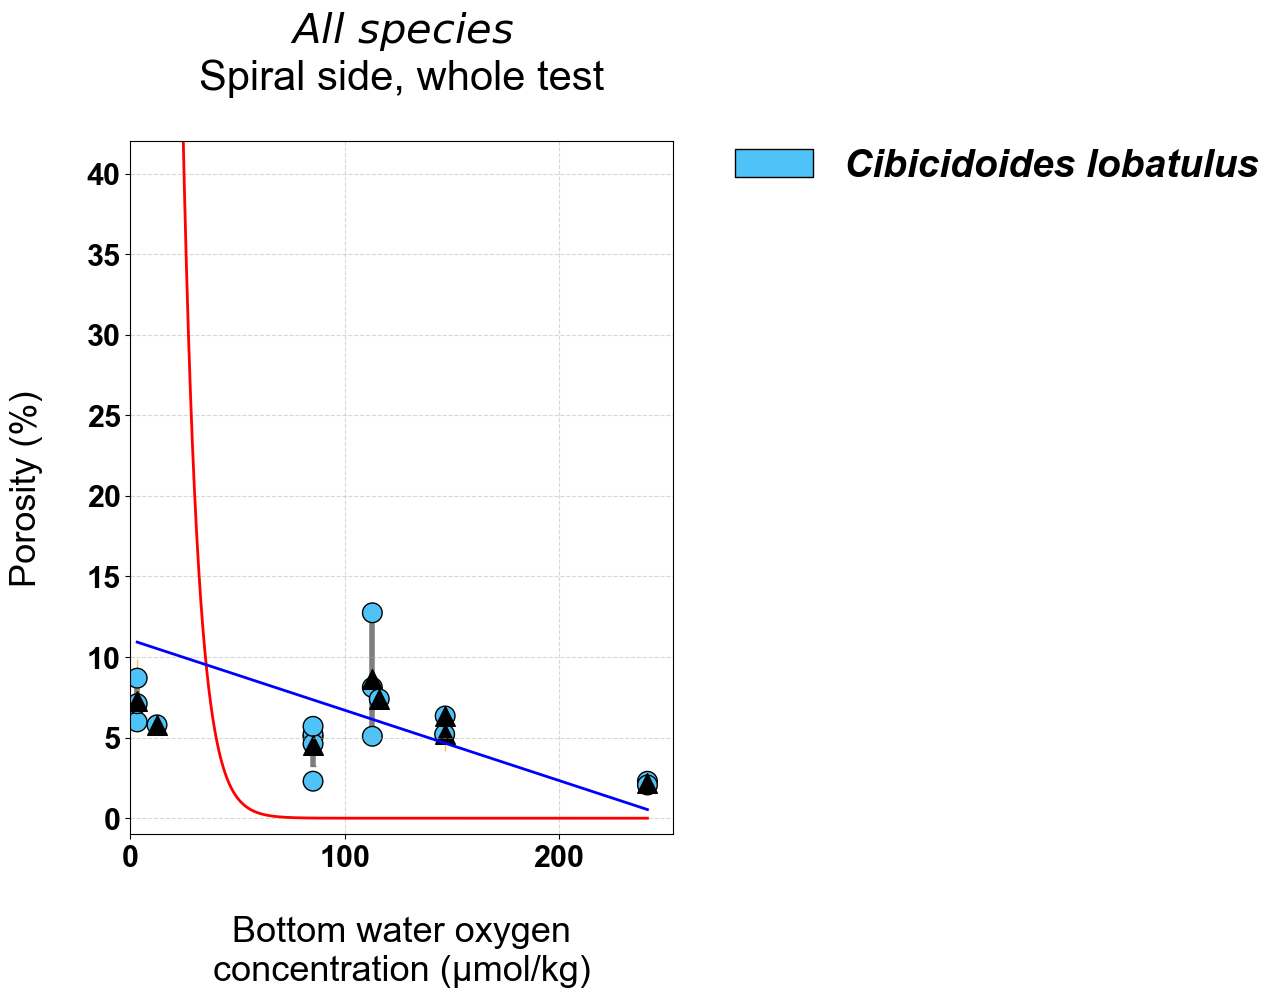

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Create a dictionary mapping each species to a color
species_colors = {
    'Cibicidoides lobatulus': '#4FC3F7',
    'Cibicidoides ungerianus': '#FFD54F',
    'Cibicidoides wuellerstorfi': '#EC407A',
    'Cibicidoides wuellerstorfi forma plana': '#B98AB6',
    'Cibicidoides wuellerstorfi forma convexa': '#C53FE3',
    'Planulina ariminensis': '#26A69A',
    'Planulina limbata': '#6D4C41',
    'Planulina ornata': '#AB47BC'
}

# Define the unique species values
unique_species = subset_dorsal_whole_test['Species'].unique()

# Define a color palette with five colors
color_palette = sns.color_palette('Set1', n_colors=len(unique_species))

# Get the species values from the dataframe
species = subset_dorsal_whole_test['Species']

# Create a list of colors corresponding to each species value
colors = [species_colors.get(s, 'black') for s in species]

# First dataset with unique values from the 'Sample' column
listofsamples = subset_dorsal_whole_test['Sample'].unique()

x = subset_dorsal_whole_test['DIVA oxygen']
y = subset_dorsal_whole_test['POROSITY AVERAGE']
yerror = subset_dorsal_whole_test['POROSITY DEV STD']

porosity_avg = subset_dorsal_whole_test.groupby('Sample')['POROSITY AVERAGE'].mean().reset_index()
porosity_std = subset_dorsal_whole_test.groupby('Sample')['POROSITY AVERAGE'].std().reset_index()
o2_avg = subset_dorsal_whole_test.groupby('Sample')['DIVA oxygen'].mean().reset_index()

a = o2_avg['DIVA oxygen'].to_numpy()  # Convert to numpy array
b = porosity_avg['POROSITY AVERAGE'].to_numpy()  # Convert to numpy array
error_y = porosity_std['POROSITY AVERAGE'].to_numpy()  # Convert to numpy array

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate weights with added epsilon to avoid division by zero for individual data points
weights_individual = 1 / (yerror ** 2 + epsilon)

# Replace any NaN or infinite values in the data arrays with zeros for individual data points
x = np.nan_to_num(x)
y = np.nan_to_num(y)
weights_individual = np.nan_to_num(weights_individual)

# Add a constant to the independent variable (if needed) for individual data points
X_individual = sm.add_constant(x)

# Perform WLS regression for individual data points
model_individual = sm.WLS(y, X_individual, weights=weights_individual, missing='drop')
results_individual = model_individual.fit()

# Get regression summary for individual data points
print("WLS Regression for Individual Data Points:")
print(results_individual.summary())

# Predicted values from the first WLS regression
predicted_values_individual = results_individual.predict(X_individual)

# Calculate RMSE
rmse_individual = np.sqrt(mean_squared_error(x, predicted_values_individual))
print("RMSE for WLS regression for individual data points:", rmse_individual)

# Define generic column names for coefficients
column_names = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_individual.shape[1])]

# Perform Monte Carlo by resampling residuals
num_simulations = 1000  # Number of Monte Carlo simulations
simulated_coefficients = []
simulated_rmse_values = []  # List to store RMSE values
prediction_intervals = []  # List to store prediction intervals

for _ in range(num_simulations):
    # Generate random residuals with the same distribution
    simulated_residuals = np.random.normal(0, np.std(results_individual.resid), len(results_individual.resid))
    simulated_y = results_individual.fittedvalues + simulated_residuals

    # Fit the WLS model to the simulated data
    simulated_model = sm.WLS(simulated_y, X_individual, weights=weights_individual, missing='drop')
    simulated_results = simulated_model.fit()

    # Store the coefficients for each simulation
    simulated_coefficients.append(simulated_results.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values = np.dot(X_individual, simulated_results.params)
    rmse = np.sqrt(mean_squared_error(x, simulated_predicted_values))
    simulated_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval = 1.96 * np.std(simulated_residuals)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients
confidence_intervals = np.percentile(simulated_coefficients, [2.5, 97.5], axis=0)
print("Monte Carlo Confidence Intervals for Coefficients:")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {confidence_intervals[0][i]} - {confidence_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse = np.mean(simulated_rmse_values)
std_rmse = np.std(simulated_rmse_values)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse}")

# Calculate and print prediction intervals
mean_prediction_interval = np.mean(prediction_intervals)
std_prediction_interval = np.std(prediction_intervals)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval}")

# Perform bootstrapping for the first WLS regression for individual data points
num_bootstraps = 1000  # Number of bootstraps
bootstrap_coefficients = []
bootstrap_rmse_values = []  # List to store RMSE values
bootstrap_prediction_intervals = []  # List to store prediction intervals

for _ in range(num_bootstraps):
    # Resample data with replacement
    indices = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample = x[indices]
    bootstrap_y_sample = y[indices]
    bootstrap_weights_sample = weights_individual[indices]
    X_bootstrap_sample = sm.add_constant(bootstrap_x_sample)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model = sm.WLS(bootstrap_y_sample, X_bootstrap_sample, weights=bootstrap_weights_sample, missing='drop')
    bootstrap_results = bootstrap_model.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients.append(bootstrap_results.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values = np.dot(X_bootstrap_sample, bootstrap_results.params)
    rmse = np.sqrt(mean_squared_error(bootstrap_x_sample, bootstrap_predicted_values))
    bootstrap_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals = bootstrap_y_sample - bootstrap_predicted_values
    prediction_interval = 1.96 * np.std(bootstrap_residuals)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals = np.percentile(bootstrap_coefficients, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (First Regression):")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {bootstrap_intervals[0][i]} - {bootstrap_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse = np.mean(bootstrap_rmse_values)
std_bootstrap_rmse = np.std(bootstrap_rmse_values)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval = np.mean(bootstrap_prediction_intervals)
std_bootstrap_prediction_interval = np.std(bootstrap_prediction_intervals)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval}")

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate the sample size (number of specimens) for each site
sample_sizes = subset_dorsal_whole_test.groupby('Sample')['Species'].count().reset_index()

# Calculate the inverse of sample sizes to use as weights for mean values
weights_mean = 1 / (sample_sizes['Species'] + epsilon)  # Use epsilon to avoid division by zero

# Replace any NaN or infinite values in the data arrays with zeros for mean values
a = np.nan_to_num(a)
b = np.nan_to_num(b)
weights_mean = np.nan_to_num(weights_mean)

# Add a constant to the independent variable (if needed) for mean values
X_mean = sm.add_constant(a)

# Perform WLS regression for mean values with sample size-based weights
model_mean_weighted = sm.WLS(b, X_mean, weights=weights_mean, missing='drop')
results_mean_weighted = model_mean_weighted.fit()

# Get regression summary for mean values with sample size-based weights
print("\nLinear WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_mean_weighted.summary())

# Predicted values from the second WLS regression
predicted_values_mean_weighted = results_mean_weighted.predict(X_mean)

# Calculate RMSE for mean values with sample size-based weights
rmse_mean_weighted = np.sqrt(mean_squared_error(a, predicted_values_mean_weighted))
print("RMSE for WLS regression for mean values with sample size-based weights:", rmse_mean_weighted)

# Define generic column names for coefficients
column_names_mean = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_mean.shape[1])]

# Perform Monte Carlo by resampling residuals for mean values
num_simulations_mean = 1000  # Number of Monte Carlo simulations for mean values
simulated_coefficients_mean = []
simulated_rmse_values_mean = []  # List to store RMSE values for mean values
prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_simulations_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_mean = np.random.normal(0, np.std(results_mean_weighted.resid), len(results_mean_weighted.resid))
    simulated_b = results_mean_weighted.fittedvalues + simulated_residuals_mean

    # Fit the WLS model to the simulated data for mean values
    simulated_model_mean = sm.WLS(simulated_b, X_mean, weights=weights_mean, missing='drop')
    simulated_results_mean = simulated_model_mean.fit()

    # Store the coefficients for each simulation for mean values
    simulated_coefficients_mean.append(simulated_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    simulated_predicted_values_mean = np.dot(X_mean, simulated_results_mean.params)
    rmse_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_mean))
    simulated_rmse_values_mean.append(rmse_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    prediction_interval_mean = 1.96 * np.std(simulated_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_mean.append(prediction_interval_mean)

# Calculate and print confidence intervals for coefficients for mean values
confidence_intervals_mean = np.percentile(simulated_coefficients_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {confidence_intervals_mean[0][i]} - {confidence_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values for mean values
mean_rmse_mean = np.mean(simulated_rmse_values_mean)
std_rmse_mean = np.std(simulated_rmse_values_mean)
print(f"Mean RMSE across Monte Carlo runs (Mean Values): {mean_rmse_mean}")
print(f"Std RMSE across Monte Carlo runs (Mean Values): {std_rmse_mean}")

# Calculate and print prediction intervals for mean values
mean_prediction_interval_mean = np.mean(prediction_intervals_mean)
std_prediction_interval_mean = np.std(prediction_intervals_mean)
print(f"Mean Prediction Interval across Monte Carlo runs (Mean Values): {mean_prediction_interval_mean}")
print(f"Std Prediction Interval across Monte Carlo runs (Mean Values): {std_prediction_interval_mean}")

# Perform bootstrapping for the second WLS regression for mean values
num_bootstraps_mean = 1000  # Number of bootstraps for mean values
bootstrap_coefficients_mean = []
bootstrap_rmse_values_mean = []  # List to store RMSE values for mean values
bootstrap_prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_bootstraps_mean):
    # Resample data with replacement for mean values
    indices_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample = a[indices_mean]
    bootstrap_b_sample = b[indices_mean]
    bootstrap_weights_sample_mean = weights_mean[indices_mean]
    X_bootstrap_sample_mean = sm.add_constant(bootstrap_a_sample)

    # Fit the WLS model to the bootstrapped data for mean values
    bootstrap_model_mean = sm.WLS(bootstrap_b_sample, X_bootstrap_sample_mean, weights=bootstrap_weights_sample_mean, missing='drop')
    bootstrap_results_mean = bootstrap_model_mean.fit()

    # Store the coefficients for each bootstrap sample for mean values
    bootstrap_coefficients_mean.append(bootstrap_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    bootstrap_predicted_values_mean = np.dot(X_bootstrap_sample_mean, bootstrap_results_mean.params)
    rmse_mean_bootstrap = np.sqrt(mean_squared_error(bootstrap_a_sample, bootstrap_predicted_values_mean))
    bootstrap_rmse_values_mean.append(rmse_mean_bootstrap)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    bootstrap_residuals_mean = bootstrap_b_sample - bootstrap_predicted_values_mean
    prediction_interval_mean_bootstrap = 1.96 * np.std(bootstrap_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_mean.append(prediction_interval_mean_bootstrap)

# Calculate and print confidence intervals for coefficients for the second regression for mean values
bootstrap_intervals_mean = np.percentile(bootstrap_coefficients_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_mean[0][i]} - {bootstrap_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping for mean values
mean_bootstrap_rmse_mean = np.mean(bootstrap_rmse_values_mean)
std_bootstrap_rmse_mean = np.std(bootstrap_rmse_values_mean)
print(f"Mean RMSE across bootstraps (Mean Values): {mean_bootstrap_rmse_mean}")
print(f"Std RMSE across bootstraps (Mean Values): {std_bootstrap_rmse_mean}")

# Calculate and print prediction intervals for bootstrapping for mean values
mean_bootstrap_prediction_interval_mean = np.mean(bootstrap_prediction_intervals_mean)
std_bootstrap_prediction_interval_mean = np.std(bootstrap_prediction_intervals_mean)
print(f"Mean Prediction Interval across bootstraps (Mean Values): {mean_bootstrap_prediction_interval_mean}")
print(f"Std Prediction Interval across bootstraps (Mean Values): {std_bootstrap_prediction_interval_mean}")

# Define the logarithmic function for the regression model
def logarithmic_model(x, params):
    a, b = params
    return a * np.log(x) + b

# Fit the logarithmic model using WLS for individual data points
log_y = np.log(np.maximum(y, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_individual = np.nan_to_num(weights_individual)
log_weights_individual[log_y == -np.inf] = 0  # Set weights to zero for invalid values
log_X_individual = sm.add_constant(x)
results_log_individual = sm.WLS(log_y, log_X_individual, weights=log_weights_individual, missing='drop').fit()

# Get regression summary for individual data points
print("\nWLS Logarithmic Regression for Individual Data Points:")
print(results_log_individual.summary())

# Predicted values from the first logarithmic regression
predicted_values_log_individual = results_log_individual.predict(log_X_individual)

# Calculate RMSE
rmse_log_individual = np.sqrt(mean_squared_error(x, np.exp(predicted_values_log_individual)))
print("RMSE for logarithmic regression for individual data points:", rmse_log_individual)

# Define generic column names for coefficients
column_names_log = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log = []
simulated_rmse_values_log = []  # List to store RMSE values
prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_simulations_log):
    # Generate random residuals with the same distribution
    simulated_residuals_log = np.random.normal(0, np.std(results_log_individual.resid), len(results_log_individual.resid))
    simulated_log_y = results_log_individual.fittedvalues + simulated_residuals_log

    # Fit the WLS model to the simulated data
    simulated_model_log = sm.WLS(simulated_log_y, log_X_individual, weights=log_weights_individual, missing='drop')
    simulated_results_log = simulated_model_log.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log.append(simulated_results_log.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log = np.exp(simulated_results_log.predict(log_X_individual))
    rmse_log = np.sqrt(mean_squared_error(x, simulated_predicted_values_log))
    simulated_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log = 1.96 * np.std(simulated_residuals_log)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log = np.percentile(simulated_coefficients_log, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {confidence_intervals_log[0][i]} - {confidence_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log = np.mean(simulated_rmse_values_log)
std_rmse_log = np.std(simulated_rmse_values_log)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log}")

# Calculate and print prediction intervals
mean_prediction_interval_log = np.mean(prediction_intervals_log)
std_prediction_interval_log = np.std(prediction_intervals_log)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log}")

# Perform bootstrapping for the first WLS logarithmic regression for individual data points
num_bootstraps_log = 1000  # Number of bootstraps
bootstrap_coefficients_log = []
bootstrap_rmse_values_log = []  # List to store RMSE values
bootstrap_prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_bootstraps_log):
    # Resample data with replacement
    indices_log = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample_log = x[indices_log]
    bootstrap_y_sample_log = y[indices_log]
    bootstrap_weights_sample_log = log_weights_individual[indices_log]
    X_bootstrap_sample_log = sm.add_constant(bootstrap_x_sample_log)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log = sm.WLS(bootstrap_y_sample_log, X_bootstrap_sample_log, weights=bootstrap_weights_sample_log, missing='drop')
    bootstrap_results_log = bootstrap_model_log.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log.append(bootstrap_results_log.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log = np.exp(bootstrap_results_log.predict(X_bootstrap_sample_log))
    rmse_log = np.sqrt(mean_squared_error(bootstrap_x_sample_log, bootstrap_predicted_values_log))
    bootstrap_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log = bootstrap_y_sample_log - bootstrap_predicted_values_log
    prediction_interval_log = 1.96 * np.std(bootstrap_residuals_log)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals_log = np.percentile(bootstrap_coefficients_log, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - First Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {bootstrap_intervals_log[0][i]} - {bootstrap_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log = np.mean(bootstrap_rmse_values_log)
std_bootstrap_rmse_log = np.std(bootstrap_rmse_values_log)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log = np.mean(bootstrap_prediction_intervals_log)
std_bootstrap_prediction_interval_log = np.std(bootstrap_prediction_intervals_log)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log}")

# Fit the logarithmic model using WLS for mean values with sample size-based weights
log_b = np.log(np.maximum(b, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_mean = np.nan_to_num(weights_mean)
log_weights_mean[log_b == -np.inf] = 0  # Set weights to zero for invalid values
log_X_mean = sm.add_constant(a)
results_log_mean_weighted = sm.WLS(log_b, log_X_mean, weights=log_weights_mean, missing='drop').fit()

# Get regression summary for mean values with sample size-based weights
print("\nLogarithmic WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_log_mean_weighted.summary())

# Predicted values from the logarithmic regression
predicted_values_log_mean_weighted = results_log_mean_weighted.predict(log_X_mean)

# Calculate RMSE
rmse_log_mean_weighted = np.sqrt(mean_squared_error(a, np.exp(predicted_values_log_mean_weighted)))
print("RMSE for logarithmic regression for mean values with sample size-based weights:", rmse_log_mean_weighted)

# Define generic column names for coefficients
column_names_log_mean = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log_mean = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log_mean = []
simulated_rmse_values_log_mean = []  # List to store RMSE values
prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_simulations_log_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_log_mean = np.random.normal(0, np.std(results_log_mean_weighted.resid), len(results_log_mean_weighted.resid))
    simulated_log_b = results_log_mean_weighted.fittedvalues + simulated_residuals_log_mean

    # Fit the WLS model to the simulated data
    simulated_model_log_mean = sm.WLS(simulated_log_b, log_X_mean, weights=log_weights_mean, missing='drop')
    simulated_results_log_mean = simulated_model_log_mean.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log_mean.append(simulated_results_log_mean.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log_mean = np.exp(simulated_results_log_mean.predict(log_X_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_log_mean))
    simulated_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log_mean = 1.96 * np.std(simulated_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log_mean = np.percentile(simulated_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {confidence_intervals_log_mean[0][i]} - {confidence_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log_mean = np.mean(simulated_rmse_values_log_mean)
std_rmse_log_mean = np.std(simulated_rmse_values_log_mean)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log_mean}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log_mean}")

# Calculate and print prediction intervals
mean_prediction_interval_log_mean = np.mean(prediction_intervals_log_mean)
std_prediction_interval_log_mean = np.std(prediction_intervals_log_mean)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log_mean}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log_mean}")

# Perform bootstrapping for the logarithmic regression for mean values with sample size-based weights
num_bootstraps_log_mean = 1000  # Number of bootstraps
bootstrap_coefficients_log_mean = []
bootstrap_rmse_values_log_mean = []  # List to store RMSE values
bootstrap_prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_bootstraps_log_mean):
    # Resample data with replacement
    indices_log_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample_log_mean = a[indices_log_mean]
    bootstrap_b_sample_log_mean = b[indices_log_mean]
    bootstrap_weights_sample_log_mean = log_weights_mean[indices_log_mean]
    X_bootstrap_sample_log_mean = sm.add_constant(bootstrap_a_sample_log_mean)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log_mean = sm.WLS(bootstrap_b_sample_log_mean, X_bootstrap_sample_log_mean, weights=bootstrap_weights_sample_log_mean, missing='drop')
    bootstrap_results_log_mean = bootstrap_model_log_mean.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log_mean.append(bootstrap_results_log_mean.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log_mean = np.exp(bootstrap_results_log_mean.predict(X_bootstrap_sample_log_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(bootstrap_a_sample_log_mean, bootstrap_predicted_values_log_mean))
    bootstrap_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log_mean = bootstrap_b_sample_log_mean - bootstrap_predicted_values_log_mean
    prediction_interval_log_mean = 1.96 * np.std(bootstrap_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients for the bootstrapped regression
bootstrap_intervals_log_mean = np.percentile(bootstrap_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_log_mean[0][i]} - {bootstrap_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log_mean = np.mean(bootstrap_rmse_values_log_mean)
std_bootstrap_rmse_log_mean = np.std(bootstrap_rmse_values_log_mean)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log_mean}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log_mean}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log_mean = np.mean(bootstrap_prediction_intervals_log_mean)
std_bootstrap_prediction_interval_log_mean = np.std(bootstrap_prediction_intervals_log_mean)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log_mean}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log_mean}")

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(7, 9))
ax.scatter(x, y, c=colors, s=200, alpha=1, marker='o', label="Individual measurement", zorder=0, edgecolors='black', linewidths=1)
ax.errorbar(x, y, yerr=yerror, fmt='none', color='orange', alpha=0.7, capsize=0, zorder=-1, linewidth=1, label="Porosity dev. std.")
ax.scatter(a, b, color='black', s=200, alpha=1, marker='^', label="Mean by site", zorder=1)  # Customize marker color, transparency, and edge color
ax.errorbar(a, b, yerr=error_y, fmt='none', color='black', alpha=0.5, capsize=2, zorder=-5, linewidth=4, label="Porosity dev. std.")

# Extract coefficients from WLS regression results
intercept, slope = 7.1567, -0.1387  # Replace with actual coefficients from your WLS regression results

# Generate predicted y values for the regression line
# We use the range of x values for generating a smooth line
x_range = np.linspace(min(x), max(x), 500)  # Replace 'min(x)' and 'max(x)' with the actual range of your 'x' data
predicted_log_y = intercept + slope * x_range

# Convert predicted logarithmic values back to the original scale using exponential
predicted_y = np.exp(predicted_log_y)

# Plot the regression line on the existing scatter plot
ax.plot(x_range, predicted_y, color='red', linewidth=2, label='Logarithmic Regression Line')

# Extract coefficients from WLS regression results for mean values
intercept_mean, slope_mean =  11.0625, -0.0436

# Generate x values for the prediction
x_range_mean = np.linspace(min(a), max(a), 500)  # Ensure 'a' is your 'x' data for mean values

# Calculate the predicted y values for the regression line
predicted_y_mean = intercept_mean + slope_mean * x_range_mean

# Plot the regression line for mean values on the existing scatter plot
ax.plot(x_range_mean, predicted_y_mean, color='blue', linewidth=2, label='Linear Regression Line (Mean Values)')

# Add error bars on the y-axis
ax.set_ylim(0, 42)
ax.set_xlabel('\nBottom water oxygen\nconcentration (µmol/kg)', fontsize=26, fontname='Arial')
ax.set_ylabel('Porosity (%)\n', fontsize=26, fontname='Arial')
ax.set_title(r'$\mathit{All\ species}$' + '\nSpiral side, whole test\n', fontsize=30, fontname='Arial')

# Customize tick label font size
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)

# Change tick label font to Arial
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontname('Arial')
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontname('Arial')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5, zorder=-5)

# Create color-coded patches (circles) with italic labels for the legend
legend_patches = [mpatches.Circle((0.5, 0.5), radius=0.25, facecolor=species_colors[species], edgecolor='black') for species in unique_species]
legend_labels = [f"{species}" for species in unique_species]

# Customize legend patches and labels
for patch in legend_patches:
    patch.set_label('')  # Clear default label
    patch.set_facecolor(patch.get_facecolor())
    patch.set_edgecolor(patch.get_edgecolor())

# Add legend with color-coded labels in italic
ax.legend(handles=legend_patches, labels=legend_labels, bbox_to_anchor=(1.05, 1.04), loc='upper left', frameon=False, prop={'family': 'Arial', 'size': 28, 'style': 'italic'})

ax.set_xlim(left=0)  # Set the left limit of the x-axis to 0
ax.set_ylim(bottom=-1)  # Set the bottom limit of the y-axis to 0

save_path = f"Datasets/Created Figures/Porosity {species_name} All chamers Spiral.jpg"
plt.savefig(save_path, dpi=999, bbox_inches='tight')

plt.show()

## Umbilical side (ventral) - pore density

WLS Regression for Individual Data Points:
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.415
Model:                            WLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     12.77
Date:                Tue, 11 Jun 2024   Prob (F-statistic):            0.00217
Time:                        18:26:48   Log-Likelihood:                 85.679
No. Observations:                  20   AIC:                            -167.4
Df Residuals:                      18   BIC:                            -165.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Mean Values):
Intercept: 0.0036383930095801064 - 0.010817516628192565
Coefficient_1: -5.993534444290206e-05 - -1.015362356505781e-05
Mean RMSE across Monte Carlo runs (Mean Values): 136.02412133539568
Std RMSE across Monte Carlo runs (Mean Values): 0.000872148210953171
Mean Prediction Interval across Monte Carlo runs (Mean Values): 0.004355158987198044
Std Prediction Interval across Monte Carlo runs (Mean Values): 0.00107061266159205

Bootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):
Intercept: 0.002048844165197665 - 0.010512377762822215
Coefficient_1: -6.514068167389646e-05 - -1.2620514300299557e-06
Mean RMSE across bootstraps (Mean Values): 133.37147509103735
Std RMSE across bootstraps (Mean Values): 20.910774041164874
Mean Prediction Interval across bootstraps (Mean Values): 0.004144900644559673
Std Prediction Interval across bootstraps (Mean Values): 0.0008324435145959484

WLS Logarithmic Regre

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: -6.694381284430248 - -3.59858759957773
Coefficient_1: -0.021435317281923612 - -0.00018662934462261054
Mean RMSE across Monte Carlo runs: 136.024309927779
Std RMSE across Monte Carlo runs: 0.0004850509806370557
Mean Prediction Interval across Monte Carlo runs: 1.862844811091593
Std Prediction Interval across Monte Carlo runs: 0.4726227578253637

Bootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 0.0014011325615742125 - 0.010456757968178085
Coefficient_1: -6.54654911178392e-05 - 8.268462841047717e-07
Mean RMSE across bootstraps: 133.4532158522416
Std RMSE across bootstraps: 20.76003999144011
Mean Prediction Interval across bootstraps: 0.004021059390941709
Std Prediction Interval across bootstraps: 0.0008399076185863642


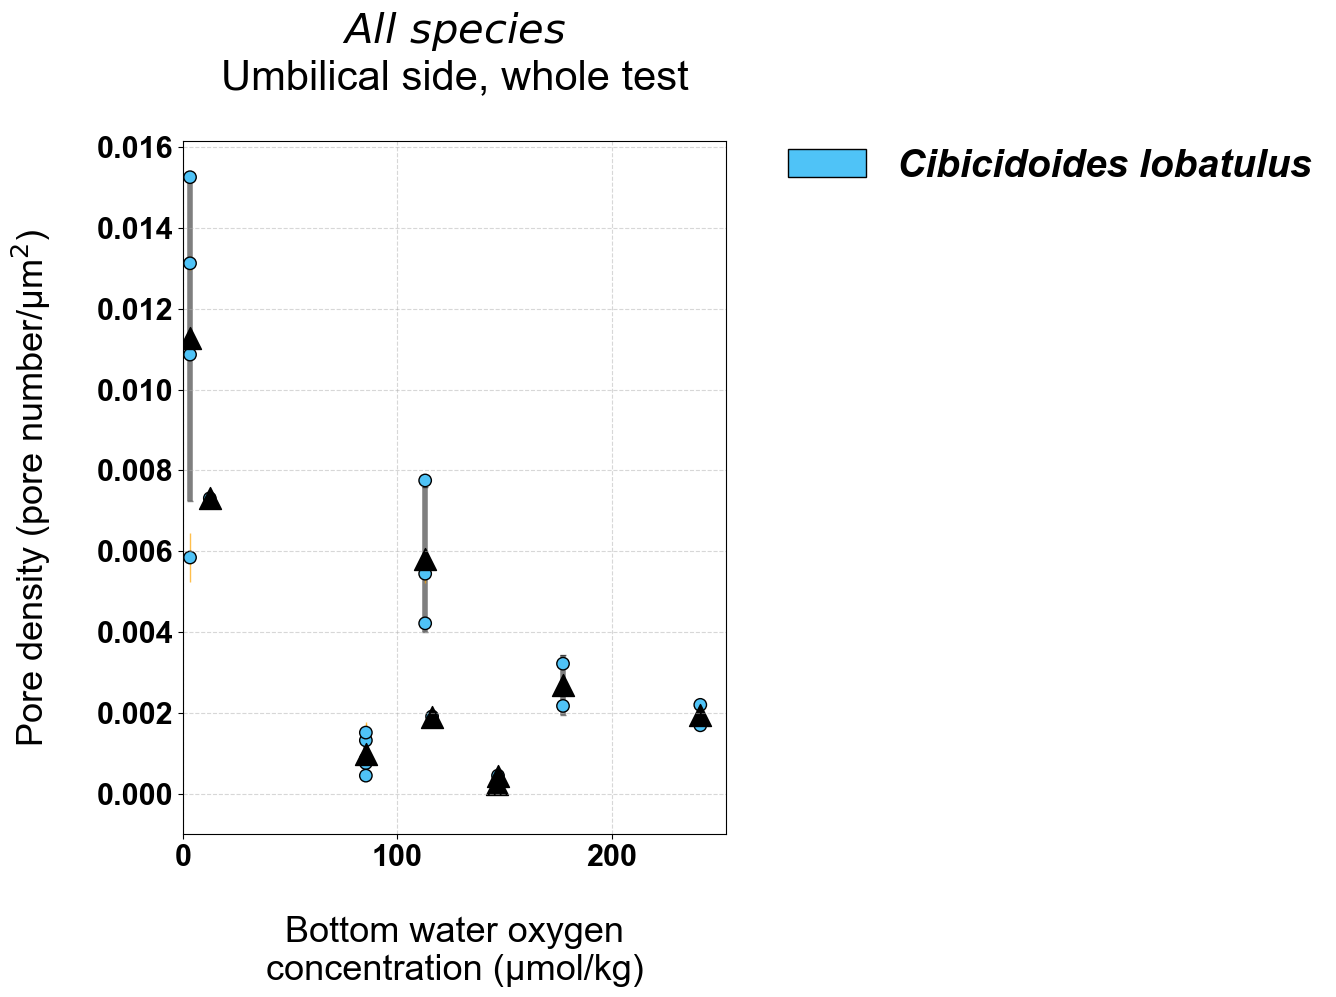

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Create a dictionary mapping each species to a color
species_colors = {
    'Cibicidoides lobatulus': '#4FC3F7',
    'Cibicidoides ungerianus': '#FFD54F',
    'Cibicidoides wuellerstorfi': '#EC407A',
    'Cibicidoides wuellerstorfi forma plana': '#B98AB6',
    'Cibicidoides wuellerstorfi forma convexa': '#C53FE3',
    'Planulina ariminensis': '#26A69A',
    'Planulina limbata': '#6D4C41',
    'Planulina ornata': '#AB47BC'
}

# Define the unique species values
unique_species = subset_ventral_whole_test['Species'].unique()

# Define a color palette with five colors
color_palette = sns.color_palette('Set1', n_colors=len(unique_species))

# Get the species values from the dataframe
species = subset_ventral_whole_test['Species']

# Create a list of colors corresponding to each species value
colors = [species_colors.get(s, 'black') for s in species]

# First dataset with unique values from the 'Sample' column
listofsamples = subset_ventral_whole_test['Sample'].unique()

x = subset_ventral_whole_test['DIVA oxygen']
y = subset_ventral_whole_test['PORE DENSITY AVERAGE']
yerror = subset_ventral_whole_test['PORE DENSITY DEV STD']

porosity_avg = subset_ventral_whole_test.groupby('Sample')['PORE DENSITY AVERAGE'].mean().reset_index()
porosity_std = subset_ventral_whole_test.groupby('Sample')['PORE DENSITY AVERAGE'].std().reset_index()
o2_avg = subset_ventral_whole_test.groupby('Sample')['DIVA oxygen'].mean().reset_index()

a = o2_avg['DIVA oxygen'].to_numpy()  # Convert to numpy array
b = porosity_avg['PORE DENSITY AVERAGE'].to_numpy()  # Convert to numpy array
error_y = porosity_std['PORE DENSITY AVERAGE'].to_numpy()  # Convert to numpy array

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate weights with added epsilon to avoid division by zero for individual data points
weights_individual = 1 / (yerror ** 2 + epsilon)

# Replace any NaN or infinite values in the data arrays with zeros for individual data points
x = np.nan_to_num(x)
y = np.nan_to_num(y)
weights_individual = np.nan_to_num(weights_individual)

# Add a constant to the independent variable (if needed) for individual data points
X_individual = sm.add_constant(x)

# Perform WLS regression for individual data points
model_individual = sm.WLS(y, X_individual, weights=weights_individual, missing='drop')
results_individual = model_individual.fit()

# Get regression summary for individual data points
print("WLS Regression for Individual Data Points:")
print(results_individual.summary())

# Predicted values from the first WLS regression
predicted_values_individual = results_individual.predict(X_individual)

# Calculate RMSE
rmse_individual = np.sqrt(mean_squared_error(x, predicted_values_individual))
print("RMSE for WLS regression for individual data points:", rmse_individual)

# Define generic column names for coefficients
column_names = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_individual.shape[1])]

# Perform Monte Carlo by resampling residuals
num_simulations = 1000  # Number of Monte Carlo simulations
simulated_coefficients = []
simulated_rmse_values = []  # List to store RMSE values
prediction_intervals = []  # List to store prediction intervals

for _ in range(num_simulations):
    # Generate random residuals with the same distribution
    simulated_residuals = np.random.normal(0, np.std(results_individual.resid), len(results_individual.resid))
    simulated_y = results_individual.fittedvalues + simulated_residuals

    # Fit the WLS model to the simulated data
    simulated_model = sm.WLS(simulated_y, X_individual, weights=weights_individual, missing='drop')
    simulated_results = simulated_model.fit()

    # Store the coefficients for each simulation
    simulated_coefficients.append(simulated_results.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values = np.dot(X_individual, simulated_results.params)
    rmse = np.sqrt(mean_squared_error(x, simulated_predicted_values))
    simulated_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval = 1.96 * np.std(simulated_residuals)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients
confidence_intervals = np.percentile(simulated_coefficients, [2.5, 97.5], axis=0)
print("Monte Carlo Confidence Intervals for Coefficients:")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {confidence_intervals[0][i]} - {confidence_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse = np.mean(simulated_rmse_values)
std_rmse = np.std(simulated_rmse_values)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse}")

# Calculate and print prediction intervals
mean_prediction_interval = np.mean(prediction_intervals)
std_prediction_interval = np.std(prediction_intervals)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval}")

# Perform bootstrapping for the first WLS regression for individual data points
num_bootstraps = 1000  # Number of bootstraps
bootstrap_coefficients = []
bootstrap_rmse_values = []  # List to store RMSE values
bootstrap_prediction_intervals = []  # List to store prediction intervals

for _ in range(num_bootstraps):
    # Resample data with replacement
    indices = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample = x[indices]
    bootstrap_y_sample = y[indices]
    bootstrap_weights_sample = weights_individual[indices]
    X_bootstrap_sample = sm.add_constant(bootstrap_x_sample)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model = sm.WLS(bootstrap_y_sample, X_bootstrap_sample, weights=bootstrap_weights_sample, missing='drop')
    bootstrap_results = bootstrap_model.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients.append(bootstrap_results.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values = np.dot(X_bootstrap_sample, bootstrap_results.params)
    rmse = np.sqrt(mean_squared_error(bootstrap_x_sample, bootstrap_predicted_values))
    bootstrap_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals = bootstrap_y_sample - bootstrap_predicted_values
    prediction_interval = 1.96 * np.std(bootstrap_residuals)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals = np.percentile(bootstrap_coefficients, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (First Regression):")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {bootstrap_intervals[0][i]} - {bootstrap_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse = np.mean(bootstrap_rmse_values)
std_bootstrap_rmse = np.std(bootstrap_rmse_values)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval = np.mean(bootstrap_prediction_intervals)
std_bootstrap_prediction_interval = np.std(bootstrap_prediction_intervals)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval}")

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate the sample size (number of specimens) for each site
sample_sizes = subset_ventral_whole_test.groupby('Sample')['Species'].count().reset_index()

# Calculate the inverse of sample sizes to use as weights for mean values
weights_mean = 1 / (sample_sizes['Species'] + epsilon)  # Use epsilon to avoid division by zero

# Replace any NaN or infinite values in the data arrays with zeros for mean values
a = np.nan_to_num(a)
b = np.nan_to_num(b)
weights_mean = np.nan_to_num(weights_mean)

# Add a constant to the independent variable (if needed) for mean values
X_mean = sm.add_constant(a)

# Perform WLS regression for mean values with sample size-based weights
model_mean_weighted = sm.WLS(b, X_mean, weights=weights_mean, missing='drop')
results_mean_weighted = model_mean_weighted.fit()

# Get regression summary for mean values with sample size-based weights
print("\nLinear WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_mean_weighted.summary())

# Predicted values from the second WLS regression
predicted_values_mean_weighted = results_mean_weighted.predict(X_mean)

# Calculate RMSE for mean values with sample size-based weights
rmse_mean_weighted = np.sqrt(mean_squared_error(a, predicted_values_mean_weighted))
print("RMSE for WLS regression for mean values with sample size-based weights:", rmse_mean_weighted)

# Define generic column names for coefficients
column_names_mean = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_mean.shape[1])]

# Perform Monte Carlo by resampling residuals for mean values
num_simulations_mean = 1000  # Number of Monte Carlo simulations for mean values
simulated_coefficients_mean = []
simulated_rmse_values_mean = []  # List to store RMSE values for mean values
prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_simulations_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_mean = np.random.normal(0, np.std(results_mean_weighted.resid), len(results_mean_weighted.resid))
    simulated_b = results_mean_weighted.fittedvalues + simulated_residuals_mean

    # Fit the WLS model to the simulated data for mean values
    simulated_model_mean = sm.WLS(simulated_b, X_mean, weights=weights_mean, missing='drop')
    simulated_results_mean = simulated_model_mean.fit()

    # Store the coefficients for each simulation for mean values
    simulated_coefficients_mean.append(simulated_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    simulated_predicted_values_mean = np.dot(X_mean, simulated_results_mean.params)
    rmse_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_mean))
    simulated_rmse_values_mean.append(rmse_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    prediction_interval_mean = 1.96 * np.std(simulated_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_mean.append(prediction_interval_mean)

# Calculate and print confidence intervals for coefficients for mean values
confidence_intervals_mean = np.percentile(simulated_coefficients_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {confidence_intervals_mean[0][i]} - {confidence_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values for mean values
mean_rmse_mean = np.mean(simulated_rmse_values_mean)
std_rmse_mean = np.std(simulated_rmse_values_mean)
print(f"Mean RMSE across Monte Carlo runs (Mean Values): {mean_rmse_mean}")
print(f"Std RMSE across Monte Carlo runs (Mean Values): {std_rmse_mean}")

# Calculate and print prediction intervals for mean values
mean_prediction_interval_mean = np.mean(prediction_intervals_mean)
std_prediction_interval_mean = np.std(prediction_intervals_mean)
print(f"Mean Prediction Interval across Monte Carlo runs (Mean Values): {mean_prediction_interval_mean}")
print(f"Std Prediction Interval across Monte Carlo runs (Mean Values): {std_prediction_interval_mean}")

# Perform bootstrapping for the second WLS regression for mean values
num_bootstraps_mean = 1000  # Number of bootstraps for mean values
bootstrap_coefficients_mean = []
bootstrap_rmse_values_mean = []  # List to store RMSE values for mean values
bootstrap_prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_bootstraps_mean):
    # Resample data with replacement for mean values
    indices_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample = a[indices_mean]
    bootstrap_b_sample = b[indices_mean]
    bootstrap_weights_sample_mean = weights_mean[indices_mean]
    X_bootstrap_sample_mean = sm.add_constant(bootstrap_a_sample)

    # Fit the WLS model to the bootstrapped data for mean values
    bootstrap_model_mean = sm.WLS(bootstrap_b_sample, X_bootstrap_sample_mean, weights=bootstrap_weights_sample_mean, missing='drop')
    bootstrap_results_mean = bootstrap_model_mean.fit()

    # Store the coefficients for each bootstrap sample for mean values
    bootstrap_coefficients_mean.append(bootstrap_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    bootstrap_predicted_values_mean = np.dot(X_bootstrap_sample_mean, bootstrap_results_mean.params)
    rmse_mean_bootstrap = np.sqrt(mean_squared_error(bootstrap_a_sample, bootstrap_predicted_values_mean))
    bootstrap_rmse_values_mean.append(rmse_mean_bootstrap)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    bootstrap_residuals_mean = bootstrap_b_sample - bootstrap_predicted_values_mean
    prediction_interval_mean_bootstrap = 1.96 * np.std(bootstrap_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_mean.append(prediction_interval_mean_bootstrap)

# Calculate and print confidence intervals for coefficients for the second regression for mean values
bootstrap_intervals_mean = np.percentile(bootstrap_coefficients_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_mean[0][i]} - {bootstrap_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping for mean values
mean_bootstrap_rmse_mean = np.mean(bootstrap_rmse_values_mean)
std_bootstrap_rmse_mean = np.std(bootstrap_rmse_values_mean)
print(f"Mean RMSE across bootstraps (Mean Values): {mean_bootstrap_rmse_mean}")
print(f"Std RMSE across bootstraps (Mean Values): {std_bootstrap_rmse_mean}")

# Calculate and print prediction intervals for bootstrapping for mean values
mean_bootstrap_prediction_interval_mean = np.mean(bootstrap_prediction_intervals_mean)
std_bootstrap_prediction_interval_mean = np.std(bootstrap_prediction_intervals_mean)
print(f"Mean Prediction Interval across bootstraps (Mean Values): {mean_bootstrap_prediction_interval_mean}")
print(f"Std Prediction Interval across bootstraps (Mean Values): {std_bootstrap_prediction_interval_mean}")

# Define the logarithmic function for the regression model
def logarithmic_model(x, params):
    a, b = params
    return a * np.log(x) + b

# Fit the logarithmic model using WLS for individual data points
log_y = np.log(np.maximum(y, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_individual = np.nan_to_num(weights_individual)
log_weights_individual[log_y == -np.inf] = 0  # Set weights to zero for invalid values
log_X_individual = sm.add_constant(x)
results_log_individual = sm.WLS(log_y, log_X_individual, weights=log_weights_individual, missing='drop').fit()

# Get regression summary for individual data points
print("\nWLS Logarithmic Regression for Individual Data Points:")
print(results_log_individual.summary())

# Predicted values from the first logarithmic regression
predicted_values_log_individual = results_log_individual.predict(log_X_individual)

# Calculate RMSE
rmse_log_individual = np.sqrt(mean_squared_error(x, np.exp(predicted_values_log_individual)))
print("RMSE for logarithmic regression for individual data points:", rmse_log_individual)

# Define generic column names for coefficients
column_names_log = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log = []
simulated_rmse_values_log = []  # List to store RMSE values
prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_simulations_log):
    # Generate random residuals with the same distribution
    simulated_residuals_log = np.random.normal(0, np.std(results_log_individual.resid), len(results_log_individual.resid))
    simulated_log_y = results_log_individual.fittedvalues + simulated_residuals_log

    # Fit the WLS model to the simulated data
    simulated_model_log = sm.WLS(simulated_log_y, log_X_individual, weights=log_weights_individual, missing='drop')
    simulated_results_log = simulated_model_log.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log.append(simulated_results_log.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log = np.exp(simulated_results_log.predict(log_X_individual))
    rmse_log = np.sqrt(mean_squared_error(x, simulated_predicted_values_log))
    simulated_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log = 1.96 * np.std(simulated_residuals_log)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log = np.percentile(simulated_coefficients_log, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {confidence_intervals_log[0][i]} - {confidence_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log = np.mean(simulated_rmse_values_log)
std_rmse_log = np.std(simulated_rmse_values_log)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log}")

# Calculate and print prediction intervals
mean_prediction_interval_log = np.mean(prediction_intervals_log)
std_prediction_interval_log = np.std(prediction_intervals_log)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log}")

# Perform bootstrapping for the first WLS logarithmic regression for individual data points
num_bootstraps_log = 1000  # Number of bootstraps
bootstrap_coefficients_log = []
bootstrap_rmse_values_log = []  # List to store RMSE values
bootstrap_prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_bootstraps_log):
    # Resample data with replacement
    indices_log = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample_log = x[indices_log]
    bootstrap_y_sample_log = y[indices_log]
    bootstrap_weights_sample_log = log_weights_individual[indices_log]
    X_bootstrap_sample_log = sm.add_constant(bootstrap_x_sample_log)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log = sm.WLS(bootstrap_y_sample_log, X_bootstrap_sample_log, weights=bootstrap_weights_sample_log, missing='drop')
    bootstrap_results_log = bootstrap_model_log.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log.append(bootstrap_results_log.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log = np.exp(bootstrap_results_log.predict(X_bootstrap_sample_log))
    rmse_log = np.sqrt(mean_squared_error(bootstrap_x_sample_log, bootstrap_predicted_values_log))
    bootstrap_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log = bootstrap_y_sample_log - bootstrap_predicted_values_log
    prediction_interval_log = 1.96 * np.std(bootstrap_residuals_log)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals_log = np.percentile(bootstrap_coefficients_log, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - First Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {bootstrap_intervals_log[0][i]} - {bootstrap_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log = np.mean(bootstrap_rmse_values_log)
std_bootstrap_rmse_log = np.std(bootstrap_rmse_values_log)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log = np.mean(bootstrap_prediction_intervals_log)
std_bootstrap_prediction_interval_log = np.std(bootstrap_prediction_intervals_log)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log}")

# Fit the logarithmic model using WLS for mean values with sample size-based weights
log_b = np.log(np.maximum(b, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_mean = np.nan_to_num(weights_mean)
log_weights_mean[log_b == -np.inf] = 0  # Set weights to zero for invalid values
log_X_mean = sm.add_constant(a)
results_log_mean_weighted = sm.WLS(log_b, log_X_mean, weights=log_weights_mean, missing='drop').fit()

# Get regression summary for mean values with sample size-based weights
print("\nLogarithmic WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_log_mean_weighted.summary())

# Predicted values from the logarithmic regression
predicted_values_log_mean_weighted = results_log_mean_weighted.predict(log_X_mean)

# Calculate RMSE
rmse_log_mean_weighted = np.sqrt(mean_squared_error(a, np.exp(predicted_values_log_mean_weighted)))
print("RMSE for logarithmic regression for mean values with sample size-based weights:", rmse_log_mean_weighted)

# Define generic column names for coefficients
column_names_log_mean = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log_mean = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log_mean = []
simulated_rmse_values_log_mean = []  # List to store RMSE values
prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_simulations_log_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_log_mean = np.random.normal(0, np.std(results_log_mean_weighted.resid), len(results_log_mean_weighted.resid))
    simulated_log_b = results_log_mean_weighted.fittedvalues + simulated_residuals_log_mean

    # Fit the WLS model to the simulated data
    simulated_model_log_mean = sm.WLS(simulated_log_b, log_X_mean, weights=log_weights_mean, missing='drop')
    simulated_results_log_mean = simulated_model_log_mean.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log_mean.append(simulated_results_log_mean.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log_mean = np.exp(simulated_results_log_mean.predict(log_X_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_log_mean))
    simulated_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log_mean = 1.96 * np.std(simulated_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log_mean = np.percentile(simulated_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {confidence_intervals_log_mean[0][i]} - {confidence_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log_mean = np.mean(simulated_rmse_values_log_mean)
std_rmse_log_mean = np.std(simulated_rmse_values_log_mean)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log_mean}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log_mean}")

# Calculate and print prediction intervals
mean_prediction_interval_log_mean = np.mean(prediction_intervals_log_mean)
std_prediction_interval_log_mean = np.std(prediction_intervals_log_mean)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log_mean}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log_mean}")

# Perform bootstrapping for the logarithmic regression for mean values with sample size-based weights
num_bootstraps_log_mean = 1000  # Number of bootstraps
bootstrap_coefficients_log_mean = []
bootstrap_rmse_values_log_mean = []  # List to store RMSE values
bootstrap_prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_bootstraps_log_mean):
    # Resample data with replacement
    indices_log_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample_log_mean = a[indices_log_mean]
    bootstrap_b_sample_log_mean = b[indices_log_mean]
    bootstrap_weights_sample_log_mean = log_weights_mean[indices_log_mean]
    X_bootstrap_sample_log_mean = sm.add_constant(bootstrap_a_sample_log_mean)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log_mean = sm.WLS(bootstrap_b_sample_log_mean, X_bootstrap_sample_log_mean, weights=bootstrap_weights_sample_log_mean, missing='drop')
    bootstrap_results_log_mean = bootstrap_model_log_mean.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log_mean.append(bootstrap_results_log_mean.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log_mean = np.exp(bootstrap_results_log_mean.predict(X_bootstrap_sample_log_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(bootstrap_a_sample_log_mean, bootstrap_predicted_values_log_mean))
    bootstrap_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log_mean = bootstrap_b_sample_log_mean - bootstrap_predicted_values_log_mean
    prediction_interval_log_mean = 1.96 * np.std(bootstrap_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients for the bootstrapped regression
bootstrap_intervals_log_mean = np.percentile(bootstrap_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_log_mean[0][i]} - {bootstrap_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log_mean = np.mean(bootstrap_rmse_values_log_mean)
std_bootstrap_rmse_log_mean = np.std(bootstrap_rmse_values_log_mean)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log_mean}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log_mean}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log_mean = np.mean(bootstrap_prediction_intervals_log_mean)
std_bootstrap_prediction_interval_log_mean = np.std(bootstrap_prediction_intervals_log_mean)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log_mean}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log_mean}")

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(7, 9))
ax.scatter(x, y, c=colors, s=80, alpha=1, marker='o', label="Individual measurement", zorder=0, edgecolors='black', linewidths=1)
ax.errorbar(x, y, yerr=yerror, fmt='none', color='orange', alpha=0.7, capsize=0, zorder=-1, linewidth=1, label="Porosity dev. std.")
ax.scatter(a, b, color='black', s=250, alpha=1, marker='^', label="Mean by site", zorder=1)  # Customize marker color, transparency, and edge color
ax.errorbar(a, b, yerr=error_y, fmt='none', color='black', alpha=0.5, capsize=2, zorder=-5, linewidth=4, label="Porosity dev. std.")

# Add error bars on the y-axis
#ax.set_ylim(0, 42)
ax.set_xlabel('\nBottom water oxygen\nconcentration (µmol/kg)', fontsize=26, fontname='Arial')
ax.set_ylabel('Pore density (pore number/µm$^{2}$)\n', fontsize=26, fontname='Arial')
ax.set_title(r'$\mathit{All\ species}$' + '\nUmbilical side, whole test\n', fontsize=30, fontname='Arial')

# Customize tick label font size
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)

# Change tick label font to Arial
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontname('Arial')
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontname('Arial')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5, zorder=-5)

# Create color-coded patches (circles) with italic labels for the legend
legend_patches = [mpatches.Circle((0.5, 0.5), radius=0.25, facecolor=species_colors[species], edgecolor='black') for species in unique_species]
legend_labels = [f"{species}" for species in unique_species]

# Customize legend patches and labels
for patch in legend_patches:
    patch.set_label('')  # Clear default label
    patch.set_facecolor(patch.get_facecolor())
    patch.set_edgecolor(patch.get_edgecolor())

# Add legend with color-coded labels in italic
ax.legend(handles=legend_patches, labels=legend_labels, bbox_to_anchor=(1.05, 1.04), loc='upper left', frameon=False, prop={'family': 'Arial', 'size': 28, 'style': 'italic'})

ax.set_xlim(left=0)  # Set the left limit of the x-axis to 0
ax.set_ylim(bottom=-0.001)  # Set the bottom limit of the y-axis to 0

save_path = f"Datasets/Created Figures/Pore density {species_name} All chamers Umbilical.jpg"
plt.savefig(save_path, dpi=999, bbox_inches='tight')

plt.show()

## Spiral side (dorsal) - pore density

WLS Regression for Individual Data Points:
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.170
Model:                            WLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     3.074
Date:                Tue, 11 Jun 2024   Prob (F-statistic):              0.100
Time:                        18:26:53   Log-Likelihood:                 84.611
No. Observations:                  17   AIC:                            -165.2
Df Residuals:                      15   BIC:                            -163.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Monte Carlo Confidence Intervals for Coefficients:
Intercept: -0.00031044349307417343 - 0.008675803409462968
Coefficient_1: -4.5025647629104665e-05 - 2.6721313348084405e-05
Mean RMSE across Monte Carlo runs: 120.77346455247967
Std RMSE across Monte Carlo runs: 0.0011963981127591386
Mean Prediction Interval across Monte Carlo runs: 0.00929706876348434
Std Prediction Interval across Monte Carlo runs: 0.001683811465006512

Bootstrapping Confidence Intervals for Coefficients (First Regression):
Intercept: 0.003326020062482534 - 0.005394878369525408
Coefficient_1: -2.0495223501134842e-05 - -2.73725139143519e-06
Mean RMSE across bootstraps: 118.40945710868611
Std RMSE across bootstraps: 17.941911929200895
Mean Prediction Interval across bootstraps: 0.007995766421689948
Std Prediction Interval across bootstraps: 0.004810770982450295

Linear WLS Regression for Mean Values (Sample Size-Based Weights):
                            WLS Regression Results                            
Dep. Variable: 

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Mean Values):
Intercept: 0.00341973685797249 - 0.009395342882350246
Coefficient_1: -4.343870385368254e-05 - 2.6068880271090282e-06
Mean RMSE across Monte Carlo runs (Mean Values): 129.9427911346478
Std RMSE across Monte Carlo runs (Mean Values): 0.0008377429605117001
Mean Prediction Interval across Monte Carlo runs (Mean Values): 0.003812639529252409
Std Prediction Interval across Monte Carlo runs (Mean Values): 0.0010353145365933562

Bootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):
Intercept: 0.002684804328566893 - 0.0101247545376978
Coefficient_1: -5.163376272279861e-05 - 2.591542037598365e-07
Mean RMSE across bootstraps (Mean Values): 128.67280556005448
Std RMSE across bootstraps (Mean Values): 24.784535157830508
Mean Prediction Interval across bootstraps (Mean Values): 0.0033888833975993737
Std Prediction Interval across bootstraps (Mean Values): 0.0012110153583149237

WLS Logarithmic Regressi

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Logarithmic Regression):
Intercept: -5.955487831346251 - -5.021052692479138
Coefficient_1: -0.006721877929807068 - 0.0004637292757127442
Mean RMSE across Monte Carlo runs: 120.7735332811727
Std RMSE across Monte Carlo runs: 0.0003065922997198419
Mean Prediction Interval across Monte Carlo runs: 0.9561239826074739
Std Prediction Interval across Monte Carlo runs: 0.1676860069938474

Bootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - First Regression):
Intercept: 0.0033534493280962707 - 0.005475921294540532
Coefficient_1: -2.0194155980958374e-05 - -2.3374900661932068e-06
Mean RMSE across bootstraps: 119.14443367247773
Std RMSE across bootstraps: 17.88860444060325
Mean Prediction Interval across bootstraps: 0.007877181993763159
Std Prediction Interval across bootstraps: 0.005002274781923116

Logarithmic WLS Regression for Mean Values (Sample Size-Based Weights):
                            WLS Regression Results

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: -5.6886934472491095 - -4.5785005356809005
Coefficient_1: -0.008748558907998902 - -0.0007064931178144184
Mean RMSE across Monte Carlo runs: 129.94288211698722
Std RMSE across Monte Carlo runs: 0.0004217540969845457
Mean Prediction Interval across Monte Carlo runs: 0.7086257637836844
Std Prediction Interval across Monte Carlo runs: 0.18486069329539428

Bootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 0.0022578453828611313 - 0.010076205555883615
Coefficient_1: -4.9894206689675175e-05 - 3.4529068505852715e-06
Mean RMSE across bootstraps: 127.64804971626151
Std RMSE across bootstraps: 24.114503030246276
Mean Prediction Interval across bootstraps: 0.0033466180053517906
Std Prediction Interval across bootstraps: 0.0012056483526211145


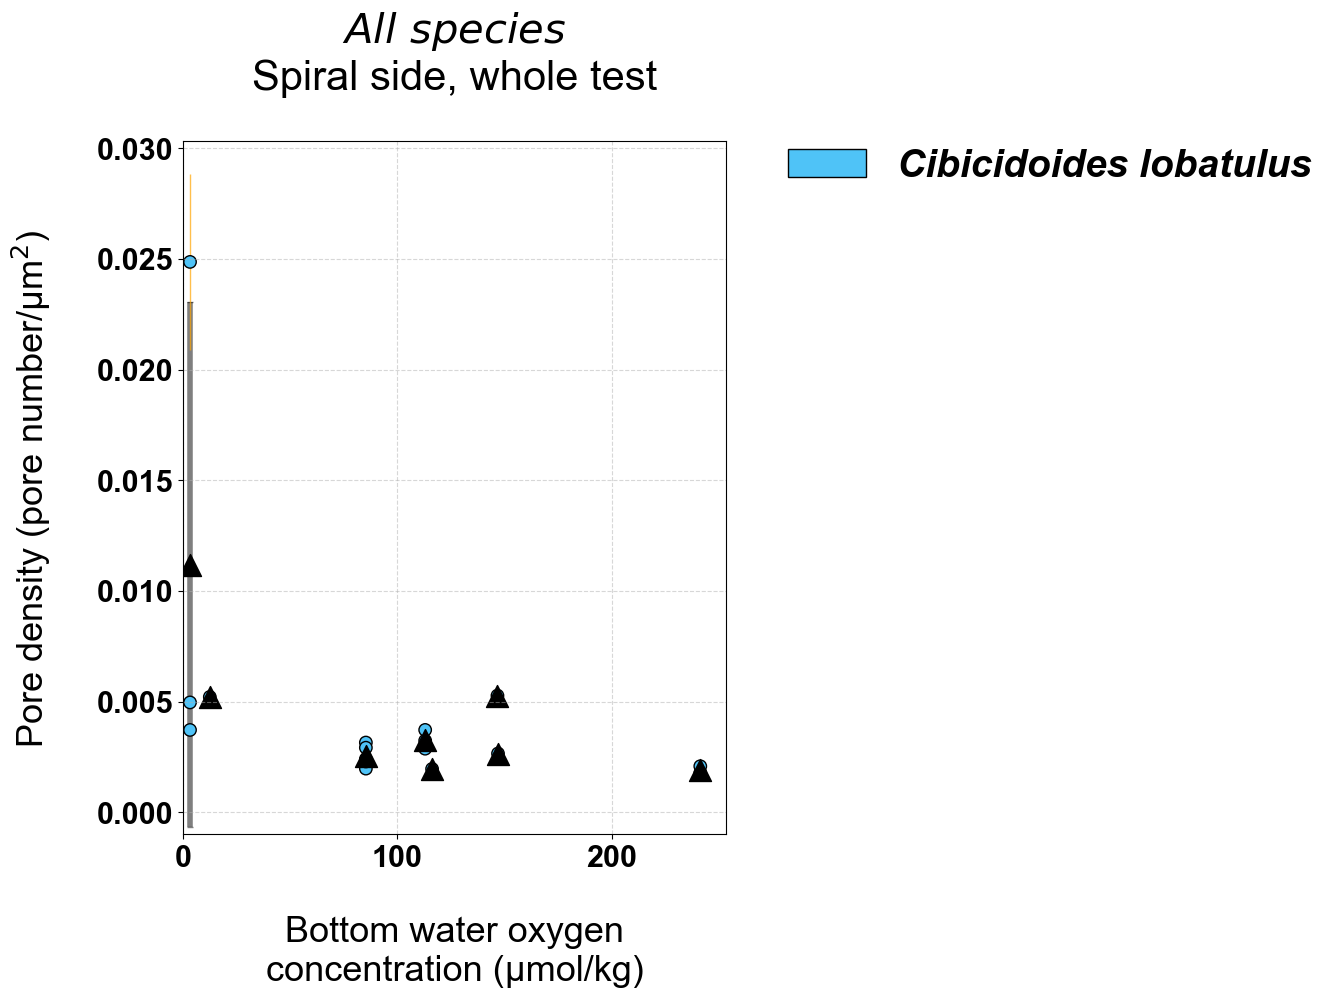

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Create a dictionary mapping each species to a color
species_colors = {
    'Cibicidoides lobatulus': '#4FC3F7',
    'Cibicidoides ungerianus': '#FFD54F',
    'Cibicidoides wuellerstorfi': '#EC407A',
    'Cibicidoides wuellerstorfi forma plana': '#B98AB6',
    'Cibicidoides wuellerstorfi forma convexa': '#C53FE3',
    'Planulina ariminensis': '#26A69A',
    'Planulina limbata': '#6D4C41',
    'Planulina ornata': '#AB47BC'
}

# Define the unique species values
unique_species = subset_dorsal_whole_test['Species'].unique()

# Define a color palette with five colors
color_palette = sns.color_palette('Set1', n_colors=len(unique_species))

# Get the species values from the dataframe
species = subset_dorsal_whole_test['Species']

# Create a list of colors corresponding to each species value
colors = [species_colors.get(s, 'black') for s in species]

# First dataset with unique values from the 'Sample' column
listofsamples = subset_dorsal_whole_test['Sample'].unique()

x = subset_dorsal_whole_test['DIVA oxygen']
y = subset_dorsal_whole_test['PORE DENSITY AVERAGE']
yerror = subset_dorsal_whole_test['PORE DENSITY DEV STD']

porosity_avg = subset_dorsal_whole_test.groupby('Sample')['PORE DENSITY AVERAGE'].mean().reset_index()
porosity_std = subset_dorsal_whole_test.groupby('Sample')['PORE DENSITY AVERAGE'].std().reset_index()
o2_avg = subset_dorsal_whole_test.groupby('Sample')['DIVA oxygen'].mean().reset_index()

a = o2_avg['DIVA oxygen'].to_numpy()  # Convert to numpy array
b = porosity_avg['PORE DENSITY AVERAGE'].to_numpy()  # Convert to numpy array
error_y = porosity_std['PORE DENSITY AVERAGE'].to_numpy()  # Convert to numpy array

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate weights with added epsilon to avoid division by zero for individual data points
weights_individual = 1 / (yerror ** 2 + epsilon)

# Replace any NaN or infinite values in the data arrays with zeros for individual data points
x = np.nan_to_num(x)
y = np.nan_to_num(y)
weights_individual = np.nan_to_num(weights_individual)

# Add a constant to the independent variable (if needed) for individual data points
X_individual = sm.add_constant(x)

# Perform WLS regression for individual data points
model_individual = sm.WLS(y, X_individual, weights=weights_individual, missing='drop')
results_individual = model_individual.fit()

# Get regression summary for individual data points
print("WLS Regression for Individual Data Points:")
print(results_individual.summary())

# Predicted values from the first WLS regression
predicted_values_individual = results_individual.predict(X_individual)

# Calculate RMSE
rmse_individual = np.sqrt(mean_squared_error(x, predicted_values_individual))
print("RMSE for WLS regression for individual data points:", rmse_individual)

# Define generic column names for coefficients
column_names = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_individual.shape[1])]

# Perform Monte Carlo by resampling residuals
num_simulations = 1000  # Number of Monte Carlo simulations
simulated_coefficients = []
simulated_rmse_values = []  # List to store RMSE values
prediction_intervals = []  # List to store prediction intervals

for _ in range(num_simulations):
    # Generate random residuals with the same distribution
    simulated_residuals = np.random.normal(0, np.std(results_individual.resid), len(results_individual.resid))
    simulated_y = results_individual.fittedvalues + simulated_residuals

    # Fit the WLS model to the simulated data
    simulated_model = sm.WLS(simulated_y, X_individual, weights=weights_individual, missing='drop')
    simulated_results = simulated_model.fit()

    # Store the coefficients for each simulation
    simulated_coefficients.append(simulated_results.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values = np.dot(X_individual, simulated_results.params)
    rmse = np.sqrt(mean_squared_error(x, simulated_predicted_values))
    simulated_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval = 1.96 * np.std(simulated_residuals)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients
confidence_intervals = np.percentile(simulated_coefficients, [2.5, 97.5], axis=0)
print("Monte Carlo Confidence Intervals for Coefficients:")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {confidence_intervals[0][i]} - {confidence_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse = np.mean(simulated_rmse_values)
std_rmse = np.std(simulated_rmse_values)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse}")

# Calculate and print prediction intervals
mean_prediction_interval = np.mean(prediction_intervals)
std_prediction_interval = np.std(prediction_intervals)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval}")

# Perform bootstrapping for the first WLS regression for individual data points
num_bootstraps = 1000  # Number of bootstraps
bootstrap_coefficients = []
bootstrap_rmse_values = []  # List to store RMSE values
bootstrap_prediction_intervals = []  # List to store prediction intervals

for _ in range(num_bootstraps):
    # Resample data with replacement
    indices = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample = x[indices]
    bootstrap_y_sample = y[indices]
    bootstrap_weights_sample = weights_individual[indices]
    X_bootstrap_sample = sm.add_constant(bootstrap_x_sample)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model = sm.WLS(bootstrap_y_sample, X_bootstrap_sample, weights=bootstrap_weights_sample, missing='drop')
    bootstrap_results = bootstrap_model.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients.append(bootstrap_results.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values = np.dot(X_bootstrap_sample, bootstrap_results.params)
    rmse = np.sqrt(mean_squared_error(bootstrap_x_sample, bootstrap_predicted_values))
    bootstrap_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals = bootstrap_y_sample - bootstrap_predicted_values
    prediction_interval = 1.96 * np.std(bootstrap_residuals)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals = np.percentile(bootstrap_coefficients, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (First Regression):")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {bootstrap_intervals[0][i]} - {bootstrap_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse = np.mean(bootstrap_rmse_values)
std_bootstrap_rmse = np.std(bootstrap_rmse_values)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval = np.mean(bootstrap_prediction_intervals)
std_bootstrap_prediction_interval = np.std(bootstrap_prediction_intervals)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval}")

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate the sample size (number of specimens) for each site
sample_sizes = subset_dorsal_whole_test.groupby('Sample')['Species'].count().reset_index()

# Calculate the inverse of sample sizes to use as weights for mean values
weights_mean = 1 / (sample_sizes['Species'] + epsilon)  # Use epsilon to avoid division by zero

# Replace any NaN or infinite values in the data arrays with zeros for mean values
a = np.nan_to_num(a)
b = np.nan_to_num(b)
weights_mean = np.nan_to_num(weights_mean)

# Add a constant to the independent variable (if needed) for mean values
X_mean = sm.add_constant(a)

# Perform WLS regression for mean values with sample size-based weights
model_mean_weighted = sm.WLS(b, X_mean, weights=weights_mean, missing='drop')
results_mean_weighted = model_mean_weighted.fit()

# Get regression summary for mean values with sample size-based weights
print("\nLinear WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_mean_weighted.summary())

# Predicted values from the second WLS regression
predicted_values_mean_weighted = results_mean_weighted.predict(X_mean)

# Calculate RMSE for mean values with sample size-based weights
rmse_mean_weighted = np.sqrt(mean_squared_error(a, predicted_values_mean_weighted))
print("RMSE for WLS regression for mean values with sample size-based weights:", rmse_mean_weighted)

# Define generic column names for coefficients
column_names_mean = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_mean.shape[1])]

# Perform Monte Carlo by resampling residuals for mean values
num_simulations_mean = 1000  # Number of Monte Carlo simulations for mean values
simulated_coefficients_mean = []
simulated_rmse_values_mean = []  # List to store RMSE values for mean values
prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_simulations_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_mean = np.random.normal(0, np.std(results_mean_weighted.resid), len(results_mean_weighted.resid))
    simulated_b = results_mean_weighted.fittedvalues + simulated_residuals_mean

    # Fit the WLS model to the simulated data for mean values
    simulated_model_mean = sm.WLS(simulated_b, X_mean, weights=weights_mean, missing='drop')
    simulated_results_mean = simulated_model_mean.fit()

    # Store the coefficients for each simulation for mean values
    simulated_coefficients_mean.append(simulated_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    simulated_predicted_values_mean = np.dot(X_mean, simulated_results_mean.params)
    rmse_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_mean))
    simulated_rmse_values_mean.append(rmse_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    prediction_interval_mean = 1.96 * np.std(simulated_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_mean.append(prediction_interval_mean)

# Calculate and print confidence intervals for coefficients for mean values
confidence_intervals_mean = np.percentile(simulated_coefficients_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {confidence_intervals_mean[0][i]} - {confidence_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values for mean values
mean_rmse_mean = np.mean(simulated_rmse_values_mean)
std_rmse_mean = np.std(simulated_rmse_values_mean)
print(f"Mean RMSE across Monte Carlo runs (Mean Values): {mean_rmse_mean}")
print(f"Std RMSE across Monte Carlo runs (Mean Values): {std_rmse_mean}")

# Calculate and print prediction intervals for mean values
mean_prediction_interval_mean = np.mean(prediction_intervals_mean)
std_prediction_interval_mean = np.std(prediction_intervals_mean)
print(f"Mean Prediction Interval across Monte Carlo runs (Mean Values): {mean_prediction_interval_mean}")
print(f"Std Prediction Interval across Monte Carlo runs (Mean Values): {std_prediction_interval_mean}")

# Perform bootstrapping for the second WLS regression for mean values
num_bootstraps_mean = 1000  # Number of bootstraps for mean values
bootstrap_coefficients_mean = []
bootstrap_rmse_values_mean = []  # List to store RMSE values for mean values
bootstrap_prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_bootstraps_mean):
    # Resample data with replacement for mean values
    indices_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample = a[indices_mean]
    bootstrap_b_sample = b[indices_mean]
    bootstrap_weights_sample_mean = weights_mean[indices_mean]
    X_bootstrap_sample_mean = sm.add_constant(bootstrap_a_sample)

    # Fit the WLS model to the bootstrapped data for mean values
    bootstrap_model_mean = sm.WLS(bootstrap_b_sample, X_bootstrap_sample_mean, weights=bootstrap_weights_sample_mean, missing='drop')
    bootstrap_results_mean = bootstrap_model_mean.fit()

    # Store the coefficients for each bootstrap sample for mean values
    bootstrap_coefficients_mean.append(bootstrap_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    bootstrap_predicted_values_mean = np.dot(X_bootstrap_sample_mean, bootstrap_results_mean.params)
    rmse_mean_bootstrap = np.sqrt(mean_squared_error(bootstrap_a_sample, bootstrap_predicted_values_mean))
    bootstrap_rmse_values_mean.append(rmse_mean_bootstrap)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    bootstrap_residuals_mean = bootstrap_b_sample - bootstrap_predicted_values_mean
    prediction_interval_mean_bootstrap = 1.96 * np.std(bootstrap_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_mean.append(prediction_interval_mean_bootstrap)

# Calculate and print confidence intervals for coefficients for the second regression for mean values
bootstrap_intervals_mean = np.percentile(bootstrap_coefficients_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_mean[0][i]} - {bootstrap_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping for mean values
mean_bootstrap_rmse_mean = np.mean(bootstrap_rmse_values_mean)
std_bootstrap_rmse_mean = np.std(bootstrap_rmse_values_mean)
print(f"Mean RMSE across bootstraps (Mean Values): {mean_bootstrap_rmse_mean}")
print(f"Std RMSE across bootstraps (Mean Values): {std_bootstrap_rmse_mean}")

# Calculate and print prediction intervals for bootstrapping for mean values
mean_bootstrap_prediction_interval_mean = np.mean(bootstrap_prediction_intervals_mean)
std_bootstrap_prediction_interval_mean = np.std(bootstrap_prediction_intervals_mean)
print(f"Mean Prediction Interval across bootstraps (Mean Values): {mean_bootstrap_prediction_interval_mean}")
print(f"Std Prediction Interval across bootstraps (Mean Values): {std_bootstrap_prediction_interval_mean}")

# Define the logarithmic function for the regression model
def logarithmic_model(x, params):
    a, b = params
    return a * np.log(x) + b

# Fit the logarithmic model using WLS for individual data points
log_y = np.log(np.maximum(y, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_individual = np.nan_to_num(weights_individual)
log_weights_individual[log_y == -np.inf] = 0  # Set weights to zero for invalid values
log_X_individual = sm.add_constant(x)
results_log_individual = sm.WLS(log_y, log_X_individual, weights=log_weights_individual, missing='drop').fit()

# Get regression summary for individual data points
print("\nWLS Logarithmic Regression for Individual Data Points:")
print(results_log_individual.summary())

# Predicted values from the first logarithmic regression
predicted_values_log_individual = results_log_individual.predict(log_X_individual)

# Calculate RMSE
rmse_log_individual = np.sqrt(mean_squared_error(x, np.exp(predicted_values_log_individual)))
print("RMSE for logarithmic regression for individual data points:", rmse_log_individual)

# Define generic column names for coefficients
column_names_log = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log = []
simulated_rmse_values_log = []  # List to store RMSE values
prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_simulations_log):
    # Generate random residuals with the same distribution
    simulated_residuals_log = np.random.normal(0, np.std(results_log_individual.resid), len(results_log_individual.resid))
    simulated_log_y = results_log_individual.fittedvalues + simulated_residuals_log

    # Fit the WLS model to the simulated data
    simulated_model_log = sm.WLS(simulated_log_y, log_X_individual, weights=log_weights_individual, missing='drop')
    simulated_results_log = simulated_model_log.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log.append(simulated_results_log.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log = np.exp(simulated_results_log.predict(log_X_individual))
    rmse_log = np.sqrt(mean_squared_error(x, simulated_predicted_values_log))
    simulated_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log = 1.96 * np.std(simulated_residuals_log)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log = np.percentile(simulated_coefficients_log, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {confidence_intervals_log[0][i]} - {confidence_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log = np.mean(simulated_rmse_values_log)
std_rmse_log = np.std(simulated_rmse_values_log)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log}")

# Calculate and print prediction intervals
mean_prediction_interval_log = np.mean(prediction_intervals_log)
std_prediction_interval_log = np.std(prediction_intervals_log)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log}")

# Perform bootstrapping for the first WLS logarithmic regression for individual data points
num_bootstraps_log = 1000  # Number of bootstraps
bootstrap_coefficients_log = []
bootstrap_rmse_values_log = []  # List to store RMSE values
bootstrap_prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_bootstraps_log):
    # Resample data with replacement
    indices_log = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample_log = x[indices_log]
    bootstrap_y_sample_log = y[indices_log]
    bootstrap_weights_sample_log = log_weights_individual[indices_log]
    X_bootstrap_sample_log = sm.add_constant(bootstrap_x_sample_log)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log = sm.WLS(bootstrap_y_sample_log, X_bootstrap_sample_log, weights=bootstrap_weights_sample_log, missing='drop')
    bootstrap_results_log = bootstrap_model_log.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log.append(bootstrap_results_log.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log = np.exp(bootstrap_results_log.predict(X_bootstrap_sample_log))
    rmse_log = np.sqrt(mean_squared_error(bootstrap_x_sample_log, bootstrap_predicted_values_log))
    bootstrap_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log = bootstrap_y_sample_log - bootstrap_predicted_values_log
    prediction_interval_log = 1.96 * np.std(bootstrap_residuals_log)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals_log = np.percentile(bootstrap_coefficients_log, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - First Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {bootstrap_intervals_log[0][i]} - {bootstrap_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log = np.mean(bootstrap_rmse_values_log)
std_bootstrap_rmse_log = np.std(bootstrap_rmse_values_log)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log = np.mean(bootstrap_prediction_intervals_log)
std_bootstrap_prediction_interval_log = np.std(bootstrap_prediction_intervals_log)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log}")

# Fit the logarithmic model using WLS for mean values with sample size-based weights
log_b = np.log(np.maximum(b, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_mean = np.nan_to_num(weights_mean)
log_weights_mean[log_b == -np.inf] = 0  # Set weights to zero for invalid values
log_X_mean = sm.add_constant(a)
results_log_mean_weighted = sm.WLS(log_b, log_X_mean, weights=log_weights_mean, missing='drop').fit()

# Get regression summary for mean values with sample size-based weights
print("\nLogarithmic WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_log_mean_weighted.summary())

# Predicted values from the logarithmic regression
predicted_values_log_mean_weighted = results_log_mean_weighted.predict(log_X_mean)

# Calculate RMSE
rmse_log_mean_weighted = np.sqrt(mean_squared_error(a, np.exp(predicted_values_log_mean_weighted)))
print("RMSE for logarithmic regression for mean values with sample size-based weights:", rmse_log_mean_weighted)

# Define generic column names for coefficients
column_names_log_mean = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log_mean = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log_mean = []
simulated_rmse_values_log_mean = []  # List to store RMSE values
prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_simulations_log_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_log_mean = np.random.normal(0, np.std(results_log_mean_weighted.resid), len(results_log_mean_weighted.resid))
    simulated_log_b = results_log_mean_weighted.fittedvalues + simulated_residuals_log_mean

    # Fit the WLS model to the simulated data
    simulated_model_log_mean = sm.WLS(simulated_log_b, log_X_mean, weights=log_weights_mean, missing='drop')
    simulated_results_log_mean = simulated_model_log_mean.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log_mean.append(simulated_results_log_mean.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log_mean = np.exp(simulated_results_log_mean.predict(log_X_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_log_mean))
    simulated_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log_mean = 1.96 * np.std(simulated_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log_mean = np.percentile(simulated_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {confidence_intervals_log_mean[0][i]} - {confidence_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log_mean = np.mean(simulated_rmse_values_log_mean)
std_rmse_log_mean = np.std(simulated_rmse_values_log_mean)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log_mean}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log_mean}")

# Calculate and print prediction intervals
mean_prediction_interval_log_mean = np.mean(prediction_intervals_log_mean)
std_prediction_interval_log_mean = np.std(prediction_intervals_log_mean)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log_mean}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log_mean}")

# Perform bootstrapping for the logarithmic regression for mean values with sample size-based weights
num_bootstraps_log_mean = 1000  # Number of bootstraps
bootstrap_coefficients_log_mean = []
bootstrap_rmse_values_log_mean = []  # List to store RMSE values
bootstrap_prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_bootstraps_log_mean):
    # Resample data with replacement
    indices_log_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample_log_mean = a[indices_log_mean]
    bootstrap_b_sample_log_mean = b[indices_log_mean]
    bootstrap_weights_sample_log_mean = log_weights_mean[indices_log_mean]
    X_bootstrap_sample_log_mean = sm.add_constant(bootstrap_a_sample_log_mean)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log_mean = sm.WLS(bootstrap_b_sample_log_mean, X_bootstrap_sample_log_mean, weights=bootstrap_weights_sample_log_mean, missing='drop')
    bootstrap_results_log_mean = bootstrap_model_log_mean.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log_mean.append(bootstrap_results_log_mean.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log_mean = np.exp(bootstrap_results_log_mean.predict(X_bootstrap_sample_log_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(bootstrap_a_sample_log_mean, bootstrap_predicted_values_log_mean))
    bootstrap_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log_mean = bootstrap_b_sample_log_mean - bootstrap_predicted_values_log_mean
    prediction_interval_log_mean = 1.96 * np.std(bootstrap_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients for the bootstrapped regression
bootstrap_intervals_log_mean = np.percentile(bootstrap_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_log_mean[0][i]} - {bootstrap_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log_mean = np.mean(bootstrap_rmse_values_log_mean)
std_bootstrap_rmse_log_mean = np.std(bootstrap_rmse_values_log_mean)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log_mean}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log_mean}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log_mean = np.mean(bootstrap_prediction_intervals_log_mean)
std_bootstrap_prediction_interval_log_mean = np.std(bootstrap_prediction_intervals_log_mean)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log_mean}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log_mean}")

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(7, 9))
ax.scatter(x, y, c=colors, s=80, alpha=1, marker='o', label="Individual measurement", zorder=0, edgecolors='black', linewidths=1)
ax.errorbar(x, y, yerr=yerror, fmt='none', color='orange', alpha=0.7, capsize=0, zorder=-1, linewidth=1, label="Porosity dev. std.")
ax.scatter(a, b, color='black', s=250, alpha=1, marker='^', label="Mean by site", zorder=1)  # Customize marker color, transparency, and edge color
ax.errorbar(a, b, yerr=error_y, fmt='none', color='black', alpha=0.5, capsize=2, zorder=-5, linewidth=4, label="Porosity dev. std.")

# Add error bars on the y-axis
#ax.set_ylim(0, 42)
ax.set_xlabel('\nBottom water oxygen\nconcentration (µmol/kg)', fontsize=26, fontname='Arial')
ax.set_ylabel('Pore density (pore number/µm$^{2}$)\n', fontsize=26, fontname='Arial')
ax.set_title(r'$\mathit{All\ species}$' + '\nSpiral side, whole test\n', fontsize=30, fontname='Arial')

# Customize tick label font size
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)

# Change tick label font to Arial
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontname('Arial')
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontname('Arial')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5, zorder=-5)

# Create color-coded patches (circles) with italic labels for the legend
legend_patches = [mpatches.Circle((0.5, 0.5), radius=0.25, facecolor=species_colors[species], edgecolor='black') for species in unique_species]
legend_labels = [f"{species}" for species in unique_species]

# Customize legend patches and labels
for patch in legend_patches:
    patch.set_label('')  # Clear default label
    patch.set_facecolor(patch.get_facecolor())
    patch.set_edgecolor(patch.get_edgecolor())

# Add legend with color-coded labels in italic
ax.legend(handles=legend_patches, labels=legend_labels, bbox_to_anchor=(1.05, 1.04), loc='upper left', frameon=False, prop={'family': 'Arial', 'size': 28, 'style': 'italic'})

ax.set_xlim(left=0)  # Set the left limit of the x-axis to 0
ax.set_ylim(bottom=-0.001)  # Set the bottom limit of the y-axis to 0

save_path = f"Datasets/Created Figures/Pore density {species_name} All chamers Spiral.jpg"
plt.savefig(save_path, dpi=999, bbox_inches='tight')

plt.show()

## Umbilical side (ventral) - pore size

WLS Regression for Individual Data Points:
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            WLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                    0.2650
Date:                Tue, 11 Jun 2024   Prob (F-statistic):              0.613
Time:                        18:26:59   Log-Likelihood:                -32.593
No. Observations:                  20   AIC:                             69.19
Df Residuals:                      18   BIC:                             71.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Mean Values):
Intercept: 2.885280589915456 - 5.744271493706474
Coefficient_1: -0.011809131325038068 - 0.008789212546249718
Mean RMSE across Monte Carlo runs (Mean Values): 132.53995635790716
Std RMSE across Monte Carlo runs (Mean Values): 0.350289440682952
Mean Prediction Interval across Monte Carlo runs (Mean Values): 1.760909932824651
Std Prediction Interval across Monte Carlo runs (Mean Values): 0.45257443141338083

Bootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):
Intercept: 3.5932383424175005 - 8.153675432982647
Coefficient_1: -0.02376824432109143 - 0.008474239181586218
Mean RMSE across bootstraps (Mean Values): 130.5356823927831
Std RMSE across bootstraps (Mean Values): 21.558274017291605
Mean Prediction Interval across bootstraps (Mean Values): 1.6169365737065642
Std Prediction Interval across bootstraps (Mean Values): 0.8168167292516098

WLS Logarithmic Regression for Individual Data Points

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 1.1433615489780273 - 1.7810921546067577
Coefficient_1: -0.0026956358991518906 - 0.0017664128372097965
Mean RMSE across Monte Carlo runs: 132.63956718265857
Std RMSE across Monte Carlo runs: 0.29587356712267276
Mean Prediction Interval across Monte Carlo runs: 0.36912423873202177
Std Prediction Interval across Monte Carlo runs: 0.09604118559675648

Bootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 3.599637647845168 - 7.718617847431842
Coefficient_1: -0.02181778463713393 - 0.007217296154399634
Mean RMSE across bootstraps: 107.53122282613994
Std RMSE across bootstraps: 48.36671227399151
Mean Prediction Interval across bootstraps: 55.10166754404087
Std Prediction Interval across bootstraps: 91.1295403284175


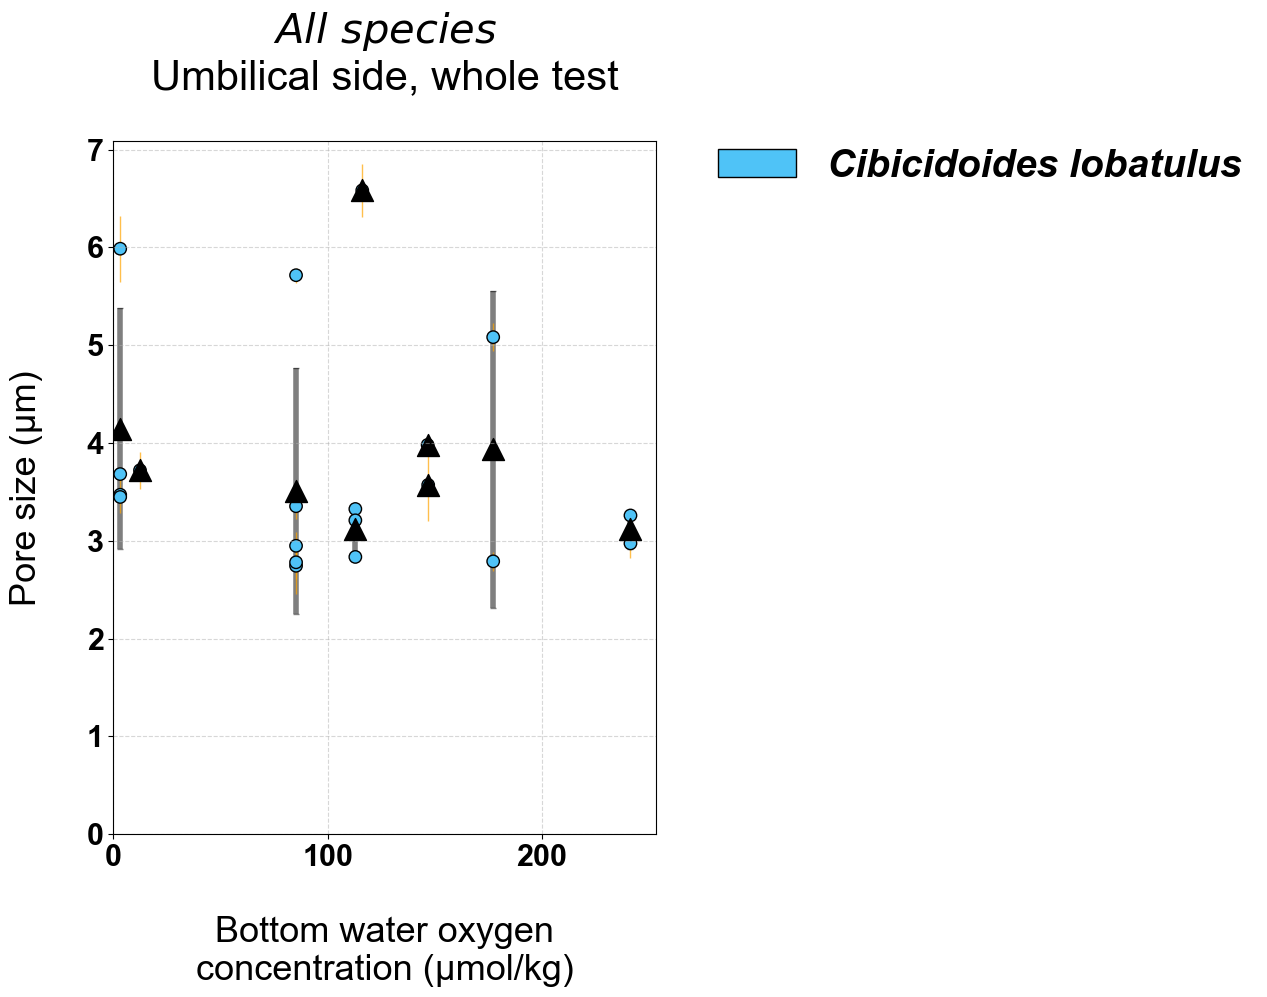

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Create a dictionary mapping each species to a color
species_colors = {
    'Cibicidoides lobatulus': '#4FC3F7',
    'Cibicidoides ungerianus': '#FFD54F',
    'Cibicidoides wuellerstorfi': '#EC407A',
    'Cibicidoides wuellerstorfi forma plana': '#B98AB6',
    'Cibicidoides wuellerstorfi forma convexa': '#C53FE3',
    'Planulina ariminensis': '#26A69A',
    'Planulina limbata': '#6D4C41',
    'Planulina ornata': '#AB47BC'
}

# Define the unique species values
unique_species = subset_ventral_whole_test['Species'].unique()

# Define a color palette with five colors
color_palette = sns.color_palette('Set1', n_colors=len(unique_species))

# Get the species values from the dataframe
species = subset_ventral_whole_test['Species']

# Create a list of colors corresponding to each species value
colors = [species_colors.get(s, 'black') for s in species]

# First dataset with unique values from the 'Sample' column
listofsamples = subset_ventral_whole_test['Sample'].unique()

x = subset_ventral_whole_test['DIVA oxygen']
y = subset_ventral_whole_test['DIAMETER AVERAGE']
yerror = subset_ventral_whole_test['DIAMETER DEV STD']

porosity_avg = subset_ventral_whole_test.groupby('Sample')['DIAMETER AVERAGE'].mean().reset_index()
porosity_std = subset_ventral_whole_test.groupby('Sample')['DIAMETER AVERAGE'].std().reset_index()
o2_avg = subset_ventral_whole_test.groupby('Sample')['DIVA oxygen'].mean().reset_index()

a = o2_avg['DIVA oxygen'].to_numpy()  # Convert to numpy array
b = porosity_avg['DIAMETER AVERAGE'].to_numpy()  # Convert to numpy array
error_y = porosity_std['DIAMETER AVERAGE'].to_numpy()  # Convert to numpy array

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate weights with added epsilon to avoid division by zero for individual data points
weights_individual = 1 / (yerror ** 2 + epsilon)

# Replace any NaN or infinite values in the data arrays with zeros for individual data points
x = np.nan_to_num(x)
y = np.nan_to_num(y)
weights_individual = np.nan_to_num(weights_individual)

# Add a constant to the independent variable (if needed) for individual data points
X_individual = sm.add_constant(x)

# Perform WLS regression for individual data points
model_individual = sm.WLS(y, X_individual, weights=weights_individual, missing='drop')
results_individual = model_individual.fit()

# Get regression summary for individual data points
print("WLS Regression for Individual Data Points:")
print(results_individual.summary())

# Predicted values from the first WLS regression
predicted_values_individual = results_individual.predict(X_individual)

# Calculate RMSE
rmse_individual = np.sqrt(mean_squared_error(x, predicted_values_individual))
print("RMSE for WLS regression for individual data points:", rmse_individual)

# Define generic column names for coefficients
column_names = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_individual.shape[1])]

# Perform Monte Carlo by resampling residuals
num_simulations = 1000  # Number of Monte Carlo simulations
simulated_coefficients = []
simulated_rmse_values = []  # List to store RMSE values
prediction_intervals = []  # List to store prediction intervals

for _ in range(num_simulations):
    # Generate random residuals with the same distribution
    simulated_residuals = np.random.normal(0, np.std(results_individual.resid), len(results_individual.resid))
    simulated_y = results_individual.fittedvalues + simulated_residuals

    # Fit the WLS model to the simulated data
    simulated_model = sm.WLS(simulated_y, X_individual, weights=weights_individual, missing='drop')
    simulated_results = simulated_model.fit()

    # Store the coefficients for each simulation
    simulated_coefficients.append(simulated_results.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values = np.dot(X_individual, simulated_results.params)
    rmse = np.sqrt(mean_squared_error(x, simulated_predicted_values))
    simulated_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval = 1.96 * np.std(simulated_residuals)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients
confidence_intervals = np.percentile(simulated_coefficients, [2.5, 97.5], axis=0)
print("Monte Carlo Confidence Intervals for Coefficients:")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {confidence_intervals[0][i]} - {confidence_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse = np.mean(simulated_rmse_values)
std_rmse = np.std(simulated_rmse_values)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse}")

# Calculate and print prediction intervals
mean_prediction_interval = np.mean(prediction_intervals)
std_prediction_interval = np.std(prediction_intervals)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval}")

# Perform bootstrapping for the first WLS regression for individual data points
num_bootstraps = 1000  # Number of bootstraps
bootstrap_coefficients = []
bootstrap_rmse_values = []  # List to store RMSE values
bootstrap_prediction_intervals = []  # List to store prediction intervals

for _ in range(num_bootstraps):
    # Resample data with replacement
    indices = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample = x[indices]
    bootstrap_y_sample = y[indices]
    bootstrap_weights_sample = weights_individual[indices]
    X_bootstrap_sample = sm.add_constant(bootstrap_x_sample)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model = sm.WLS(bootstrap_y_sample, X_bootstrap_sample, weights=bootstrap_weights_sample, missing='drop')
    bootstrap_results = bootstrap_model.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients.append(bootstrap_results.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values = np.dot(X_bootstrap_sample, bootstrap_results.params)
    rmse = np.sqrt(mean_squared_error(bootstrap_x_sample, bootstrap_predicted_values))
    bootstrap_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals = bootstrap_y_sample - bootstrap_predicted_values
    prediction_interval = 1.96 * np.std(bootstrap_residuals)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals = np.percentile(bootstrap_coefficients, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (First Regression):")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {bootstrap_intervals[0][i]} - {bootstrap_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse = np.mean(bootstrap_rmse_values)
std_bootstrap_rmse = np.std(bootstrap_rmse_values)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval = np.mean(bootstrap_prediction_intervals)
std_bootstrap_prediction_interval = np.std(bootstrap_prediction_intervals)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval}")

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate the sample size (number of specimens) for each site
sample_sizes = subset_ventral_whole_test.groupby('Sample')['Species'].count().reset_index()

# Calculate the inverse of sample sizes to use as weights for mean values
weights_mean = 1 / (sample_sizes['Species'] + epsilon)  # Use epsilon to avoid division by zero

# Replace any NaN or infinite values in the data arrays with zeros for mean values
a = np.nan_to_num(a)
b = np.nan_to_num(b)
weights_mean = np.nan_to_num(weights_mean)

# Add a constant to the independent variable (if needed) for mean values
X_mean = sm.add_constant(a)

# Perform WLS regression for mean values with sample size-based weights
model_mean_weighted = sm.WLS(b, X_mean, weights=weights_mean, missing='drop')
results_mean_weighted = model_mean_weighted.fit()

# Get regression summary for mean values with sample size-based weights
print("\nLinear WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_mean_weighted.summary())

# Predicted values from the second WLS regression
predicted_values_mean_weighted = results_mean_weighted.predict(X_mean)

# Calculate RMSE for mean values with sample size-based weights
rmse_mean_weighted = np.sqrt(mean_squared_error(a, predicted_values_mean_weighted))
print("RMSE for WLS regression for mean values with sample size-based weights:", rmse_mean_weighted)

# Define generic column names for coefficients
column_names_mean = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_mean.shape[1])]

# Perform Monte Carlo by resampling residuals for mean values
num_simulations_mean = 1000  # Number of Monte Carlo simulations for mean values
simulated_coefficients_mean = []
simulated_rmse_values_mean = []  # List to store RMSE values for mean values
prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_simulations_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_mean = np.random.normal(0, np.std(results_mean_weighted.resid), len(results_mean_weighted.resid))
    simulated_b = results_mean_weighted.fittedvalues + simulated_residuals_mean

    # Fit the WLS model to the simulated data for mean values
    simulated_model_mean = sm.WLS(simulated_b, X_mean, weights=weights_mean, missing='drop')
    simulated_results_mean = simulated_model_mean.fit()

    # Store the coefficients for each simulation for mean values
    simulated_coefficients_mean.append(simulated_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    simulated_predicted_values_mean = np.dot(X_mean, simulated_results_mean.params)
    rmse_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_mean))
    simulated_rmse_values_mean.append(rmse_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    prediction_interval_mean = 1.96 * np.std(simulated_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_mean.append(prediction_interval_mean)

# Calculate and print confidence intervals for coefficients for mean values
confidence_intervals_mean = np.percentile(simulated_coefficients_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {confidence_intervals_mean[0][i]} - {confidence_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values for mean values
mean_rmse_mean = np.mean(simulated_rmse_values_mean)
std_rmse_mean = np.std(simulated_rmse_values_mean)
print(f"Mean RMSE across Monte Carlo runs (Mean Values): {mean_rmse_mean}")
print(f"Std RMSE across Monte Carlo runs (Mean Values): {std_rmse_mean}")

# Calculate and print prediction intervals for mean values
mean_prediction_interval_mean = np.mean(prediction_intervals_mean)
std_prediction_interval_mean = np.std(prediction_intervals_mean)
print(f"Mean Prediction Interval across Monte Carlo runs (Mean Values): {mean_prediction_interval_mean}")
print(f"Std Prediction Interval across Monte Carlo runs (Mean Values): {std_prediction_interval_mean}")

# Perform bootstrapping for the second WLS regression for mean values
num_bootstraps_mean = 1000  # Number of bootstraps for mean values
bootstrap_coefficients_mean = []
bootstrap_rmse_values_mean = []  # List to store RMSE values for mean values
bootstrap_prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_bootstraps_mean):
    # Resample data with replacement for mean values
    indices_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample = a[indices_mean]
    bootstrap_b_sample = b[indices_mean]
    bootstrap_weights_sample_mean = weights_mean[indices_mean]
    X_bootstrap_sample_mean = sm.add_constant(bootstrap_a_sample)

    # Fit the WLS model to the bootstrapped data for mean values
    bootstrap_model_mean = sm.WLS(bootstrap_b_sample, X_bootstrap_sample_mean, weights=bootstrap_weights_sample_mean, missing='drop')
    bootstrap_results_mean = bootstrap_model_mean.fit()

    # Store the coefficients for each bootstrap sample for mean values
    bootstrap_coefficients_mean.append(bootstrap_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    bootstrap_predicted_values_mean = np.dot(X_bootstrap_sample_mean, bootstrap_results_mean.params)
    rmse_mean_bootstrap = np.sqrt(mean_squared_error(bootstrap_a_sample, bootstrap_predicted_values_mean))
    bootstrap_rmse_values_mean.append(rmse_mean_bootstrap)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    bootstrap_residuals_mean = bootstrap_b_sample - bootstrap_predicted_values_mean
    prediction_interval_mean_bootstrap = 1.96 * np.std(bootstrap_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_mean.append(prediction_interval_mean_bootstrap)

# Calculate and print confidence intervals for coefficients for the second regression for mean values
bootstrap_intervals_mean = np.percentile(bootstrap_coefficients_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_mean[0][i]} - {bootstrap_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping for mean values
mean_bootstrap_rmse_mean = np.mean(bootstrap_rmse_values_mean)
std_bootstrap_rmse_mean = np.std(bootstrap_rmse_values_mean)
print(f"Mean RMSE across bootstraps (Mean Values): {mean_bootstrap_rmse_mean}")
print(f"Std RMSE across bootstraps (Mean Values): {std_bootstrap_rmse_mean}")

# Calculate and print prediction intervals for bootstrapping for mean values
mean_bootstrap_prediction_interval_mean = np.mean(bootstrap_prediction_intervals_mean)
std_bootstrap_prediction_interval_mean = np.std(bootstrap_prediction_intervals_mean)
print(f"Mean Prediction Interval across bootstraps (Mean Values): {mean_bootstrap_prediction_interval_mean}")
print(f"Std Prediction Interval across bootstraps (Mean Values): {std_bootstrap_prediction_interval_mean}")

# Define the logarithmic function for the regression model
def logarithmic_model(x, params):
    a, b = params
    return a * np.log(x) + b

# Fit the logarithmic model using WLS for individual data points
log_y = np.log(np.maximum(y, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_individual = np.nan_to_num(weights_individual)
log_weights_individual[log_y == -np.inf] = 0  # Set weights to zero for invalid values
log_X_individual = sm.add_constant(x)
results_log_individual = sm.WLS(log_y, log_X_individual, weights=log_weights_individual, missing='drop').fit()

# Get regression summary for individual data points
print("\nWLS Logarithmic Regression for Individual Data Points:")
print(results_log_individual.summary())

# Predicted values from the first logarithmic regression
predicted_values_log_individual = results_log_individual.predict(log_X_individual)

# Calculate RMSE
rmse_log_individual = np.sqrt(mean_squared_error(x, np.exp(predicted_values_log_individual)))
print("RMSE for logarithmic regression for individual data points:", rmse_log_individual)

# Define generic column names for coefficients
column_names_log = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log = []
simulated_rmse_values_log = []  # List to store RMSE values
prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_simulations_log):
    # Generate random residuals with the same distribution
    simulated_residuals_log = np.random.normal(0, np.std(results_log_individual.resid), len(results_log_individual.resid))
    simulated_log_y = results_log_individual.fittedvalues + simulated_residuals_log

    # Fit the WLS model to the simulated data
    simulated_model_log = sm.WLS(simulated_log_y, log_X_individual, weights=log_weights_individual, missing='drop')
    simulated_results_log = simulated_model_log.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log.append(simulated_results_log.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log = np.exp(simulated_results_log.predict(log_X_individual))
    rmse_log = np.sqrt(mean_squared_error(x, simulated_predicted_values_log))
    simulated_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log = 1.96 * np.std(simulated_residuals_log)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log = np.percentile(simulated_coefficients_log, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {confidence_intervals_log[0][i]} - {confidence_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log = np.mean(simulated_rmse_values_log)
std_rmse_log = np.std(simulated_rmse_values_log)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log}")

# Calculate and print prediction intervals
mean_prediction_interval_log = np.mean(prediction_intervals_log)
std_prediction_interval_log = np.std(prediction_intervals_log)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log}")

# Perform bootstrapping for the first WLS logarithmic regression for individual data points
num_bootstraps_log = 1000  # Number of bootstraps
bootstrap_coefficients_log = []
bootstrap_rmse_values_log = []  # List to store RMSE values
bootstrap_prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_bootstraps_log):
    # Resample data with replacement
    indices_log = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample_log = x[indices_log]
    bootstrap_y_sample_log = y[indices_log]
    bootstrap_weights_sample_log = log_weights_individual[indices_log]
    X_bootstrap_sample_log = sm.add_constant(bootstrap_x_sample_log)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log = sm.WLS(bootstrap_y_sample_log, X_bootstrap_sample_log, weights=bootstrap_weights_sample_log, missing='drop')
    bootstrap_results_log = bootstrap_model_log.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log.append(bootstrap_results_log.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log = np.exp(bootstrap_results_log.predict(X_bootstrap_sample_log))
    rmse_log = np.sqrt(mean_squared_error(bootstrap_x_sample_log, bootstrap_predicted_values_log))
    bootstrap_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log = bootstrap_y_sample_log - bootstrap_predicted_values_log
    prediction_interval_log = 1.96 * np.std(bootstrap_residuals_log)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals_log = np.percentile(bootstrap_coefficients_log, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - First Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {bootstrap_intervals_log[0][i]} - {bootstrap_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log = np.mean(bootstrap_rmse_values_log)
std_bootstrap_rmse_log = np.std(bootstrap_rmse_values_log)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log = np.mean(bootstrap_prediction_intervals_log)
std_bootstrap_prediction_interval_log = np.std(bootstrap_prediction_intervals_log)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log}")

# Fit the logarithmic model using WLS for mean values with sample size-based weights
log_b = np.log(np.maximum(b, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_mean = np.nan_to_num(weights_mean)
log_weights_mean[log_b == -np.inf] = 0  # Set weights to zero for invalid values
log_X_mean = sm.add_constant(a)
results_log_mean_weighted = sm.WLS(log_b, log_X_mean, weights=log_weights_mean, missing='drop').fit()

# Get regression summary for mean values with sample size-based weights
print("\nLogarithmic WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_log_mean_weighted.summary())

# Predicted values from the logarithmic regression
predicted_values_log_mean_weighted = results_log_mean_weighted.predict(log_X_mean)

# Calculate RMSE
rmse_log_mean_weighted = np.sqrt(mean_squared_error(a, np.exp(predicted_values_log_mean_weighted)))
print("RMSE for logarithmic regression for mean values with sample size-based weights:", rmse_log_mean_weighted)

# Define generic column names for coefficients
column_names_log_mean = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log_mean = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log_mean = []
simulated_rmse_values_log_mean = []  # List to store RMSE values
prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_simulations_log_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_log_mean = np.random.normal(0, np.std(results_log_mean_weighted.resid), len(results_log_mean_weighted.resid))
    simulated_log_b = results_log_mean_weighted.fittedvalues + simulated_residuals_log_mean

    # Fit the WLS model to the simulated data
    simulated_model_log_mean = sm.WLS(simulated_log_b, log_X_mean, weights=log_weights_mean, missing='drop')
    simulated_results_log_mean = simulated_model_log_mean.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log_mean.append(simulated_results_log_mean.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log_mean = np.exp(simulated_results_log_mean.predict(log_X_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_log_mean))
    simulated_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log_mean = 1.96 * np.std(simulated_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log_mean = np.percentile(simulated_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {confidence_intervals_log_mean[0][i]} - {confidence_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log_mean = np.mean(simulated_rmse_values_log_mean)
std_rmse_log_mean = np.std(simulated_rmse_values_log_mean)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log_mean}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log_mean}")

# Calculate and print prediction intervals
mean_prediction_interval_log_mean = np.mean(prediction_intervals_log_mean)
std_prediction_interval_log_mean = np.std(prediction_intervals_log_mean)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log_mean}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log_mean}")

# Perform bootstrapping for the logarithmic regression for mean values with sample size-based weights
num_bootstraps_log_mean = 1000  # Number of bootstraps
bootstrap_coefficients_log_mean = []
bootstrap_rmse_values_log_mean = []  # List to store RMSE values
bootstrap_prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_bootstraps_log_mean):
    # Resample data with replacement
    indices_log_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample_log_mean = a[indices_log_mean]
    bootstrap_b_sample_log_mean = b[indices_log_mean]
    bootstrap_weights_sample_log_mean = log_weights_mean[indices_log_mean]
    X_bootstrap_sample_log_mean = sm.add_constant(bootstrap_a_sample_log_mean)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log_mean = sm.WLS(bootstrap_b_sample_log_mean, X_bootstrap_sample_log_mean, weights=bootstrap_weights_sample_log_mean, missing='drop')
    bootstrap_results_log_mean = bootstrap_model_log_mean.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log_mean.append(bootstrap_results_log_mean.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log_mean = np.exp(bootstrap_results_log_mean.predict(X_bootstrap_sample_log_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(bootstrap_a_sample_log_mean, bootstrap_predicted_values_log_mean))
    bootstrap_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log_mean = bootstrap_b_sample_log_mean - bootstrap_predicted_values_log_mean
    prediction_interval_log_mean = 1.96 * np.std(bootstrap_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients for the bootstrapped regression
bootstrap_intervals_log_mean = np.percentile(bootstrap_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_log_mean[0][i]} - {bootstrap_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log_mean = np.mean(bootstrap_rmse_values_log_mean)
std_bootstrap_rmse_log_mean = np.std(bootstrap_rmse_values_log_mean)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log_mean}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log_mean}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log_mean = np.mean(bootstrap_prediction_intervals_log_mean)
std_bootstrap_prediction_interval_log_mean = np.std(bootstrap_prediction_intervals_log_mean)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log_mean}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log_mean}")

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(7, 9))
ax.scatter(x, y, c=colors, s=80, alpha=1, marker='o', label="Individual measurement", zorder=0, edgecolors='black', linewidths=1)
ax.errorbar(x, y, yerr=yerror, fmt='none', color='orange', alpha=0.7, capsize=0, zorder=-1, linewidth=1, label="Porosity dev. std.")
ax.scatter(a, b, color='black', s=250, alpha=1, marker='^', label="Mean by site", zorder=1)  # Customize marker color, transparency, and edge color
ax.errorbar(a, b, yerr=error_y, fmt='none', color='black', alpha=0.5, capsize=2, zorder=-5, linewidth=4, label="Porosity dev. std.")

# Add error bars on the y-axis
#ax.set_ylim(0, 42)
ax.set_xlabel('\nBottom water oxygen\nconcentration (µmol/kg)', fontsize=26, fontname='Arial')
ax.set_ylabel('Pore size (µm)\n', fontsize=26, fontname='Arial')
ax.set_title(r'$\mathit{All\ species}$' + '\nUmbilical side, whole test\n', fontsize=30, fontname='Arial')

# Customize tick label font size
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)

# Change tick label font to Arial
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontname('Arial')
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontname('Arial')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5, zorder=-5)

# Create color-coded patches (circles) with italic labels for the legend
legend_patches = [mpatches.Circle((0.5, 0.5), radius=0.25, facecolor=species_colors[species], edgecolor='black') for species in unique_species]
legend_labels = [f"{species}" for species in unique_species]

# Customize legend patches and labels
for patch in legend_patches:
    patch.set_label('')  # Clear default label
    patch.set_facecolor(patch.get_facecolor())
    patch.set_edgecolor(patch.get_edgecolor())

# Add legend with color-coded labels in italic
ax.legend(handles=legend_patches, labels=legend_labels, bbox_to_anchor=(1.05, 1.04), loc='upper left', frameon=False, prop={'family': 'Arial', 'size': 28, 'style': 'italic'})

ax.set_xlim(left=0)  # Set the left limit of the x-axis to 0
ax.set_ylim(bottom=-0.001)  # Set the bottom limit of the y-axis to 0

save_path = f"Datasets/Created Figures/Pore size {species_name} All chamers Umbilical.jpg"
plt.savefig(save_path, dpi=999, bbox_inches='tight')

plt.show()

## Spiral side (dorsal) - pore size

WLS Regression for Individual Data Points:
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.373
Model:                            WLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     8.928
Date:                Tue, 11 Jun 2024   Prob (F-statistic):            0.00919
Time:                        18:27:04   Log-Likelihood:                -42.397
No. Observations:                  17   AIC:                             88.79
Df Residuals:                      15   BIC:                             90.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Monte Carlo Confidence Intervals for Coefficients:
Intercept: 1.586343797047801 - 7.1040825239726
Coefficient_1: -0.010733517661842738 - 0.05785662391845723
Mean RMSE across Monte Carlo runs: 114.33576284790391
Std RMSE across Monte Carlo runs: 2.0017686836873723
Mean Prediction Interval across Monte Carlo runs: 3.7716581346596594
Std Prediction Interval across Monte Carlo runs: 0.6729975615907965

Bootstrapping Confidence Intervals for Coefficients (First Regression):
Intercept: 2.1431396674349754 - 9.01372929697422
Coefficient_1: -0.017212692078812614 - 0.04169213597432956
Mean RMSE across bootstraps: 114.20526614486215
Std RMSE across bootstraps: 17.201537450254257
Mean Prediction Interval across bootstraps: 3.048501466357951
Std Prediction Interval across bootstraps: 0.9381047662702159

Linear WLS Regression for Mean Values (Sample Size-Based Weights):
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:  

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Mean Values):
Intercept: 2.9487800316096355 - 6.131024269054077
Coefficient_1: -0.009097208438204635 - 0.014320696284206843
Mean RMSE across Monte Carlo runs (Mean Values): 125.87454607612679
Std RMSE across Monte Carlo runs (Mean Values): 0.4407587450867357
Mean Prediction Interval across Monte Carlo runs (Mean Values): 2.0093626725357137
Std Prediction Interval across Monte Carlo runs (Mean Values): 0.5554830094711065

Bootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):
Intercept: 3.6111538368355163 - 8.561271968647294
Coefficient_1: -0.020610341241724516 - 0.020791986568565658
Mean RMSE across bootstraps (Mean Values): 124.260087175975
Std RMSE across bootstraps (Mean Values): 23.912639698521357
Mean Prediction Interval across bootstraps (Mean Values): 1.8815021016667084
Std Prediction Interval across bootstraps (Mean Values): 0.5500929474771298

WLS Logarithmic Regression for Individual Data Poin

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Logarithmic Regression):
Intercept: 0.7004529616741005 - 1.9623069865238332
Coefficient_1: -0.0019494962260318232 - 0.011990936928716315
Mean RMSE across Monte Carlo runs: 111.66457204979405
Std RMSE across Monte Carlo runs: 6.169615387590769
Mean Prediction Interval across Monte Carlo runs: 0.842055026164738
Std Prediction Interval across Monte Carlo runs: 0.15098643281785798

Bootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - First Regression):
Intercept: 1.9321277708267852 - 8.99921297659099
Coefficient_1: -0.017181423163290483 - 0.04323574127682409
Mean RMSE across bootstraps: 5625.093644771874
Std RMSE across bootstraps: 9492.935454124805
Mean Prediction Interval across bootstraps: 10068.109722995006
Std Prediction Interval across bootstraps: 17806.50050957598

Logarithmic WLS Regression for Mean Values (Sample Size-Based Weights):
                            WLS Regression Results                      

C:\Users\sag15\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



Monte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 1.1339421139388364 - 1.8253026448235872
Coefficient_1: -0.0021923727414058817 - 0.003119057284184775
Mean RMSE across Monte Carlo runs: 125.99042370082316
Std RMSE across Monte Carlo runs: 0.4240847819399504
Mean Prediction Interval across Monte Carlo runs: 0.4117420252523009
Std Prediction Interval across Monte Carlo runs: 0.11568048639746079

Bootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):
Intercept: 3.6166829126426037 - 8.785062141360218
Coefficient_1: -0.022323340854812395 - 0.020583685577747084
Mean RMSE across bootstraps: 138.73743850745825
Std RMSE across bootstraps: 122.36065241955833
Mean Prediction Interval across bootstraps: 149.24483925869072
Std Prediction Interval across bootstraps: 182.81663950740975


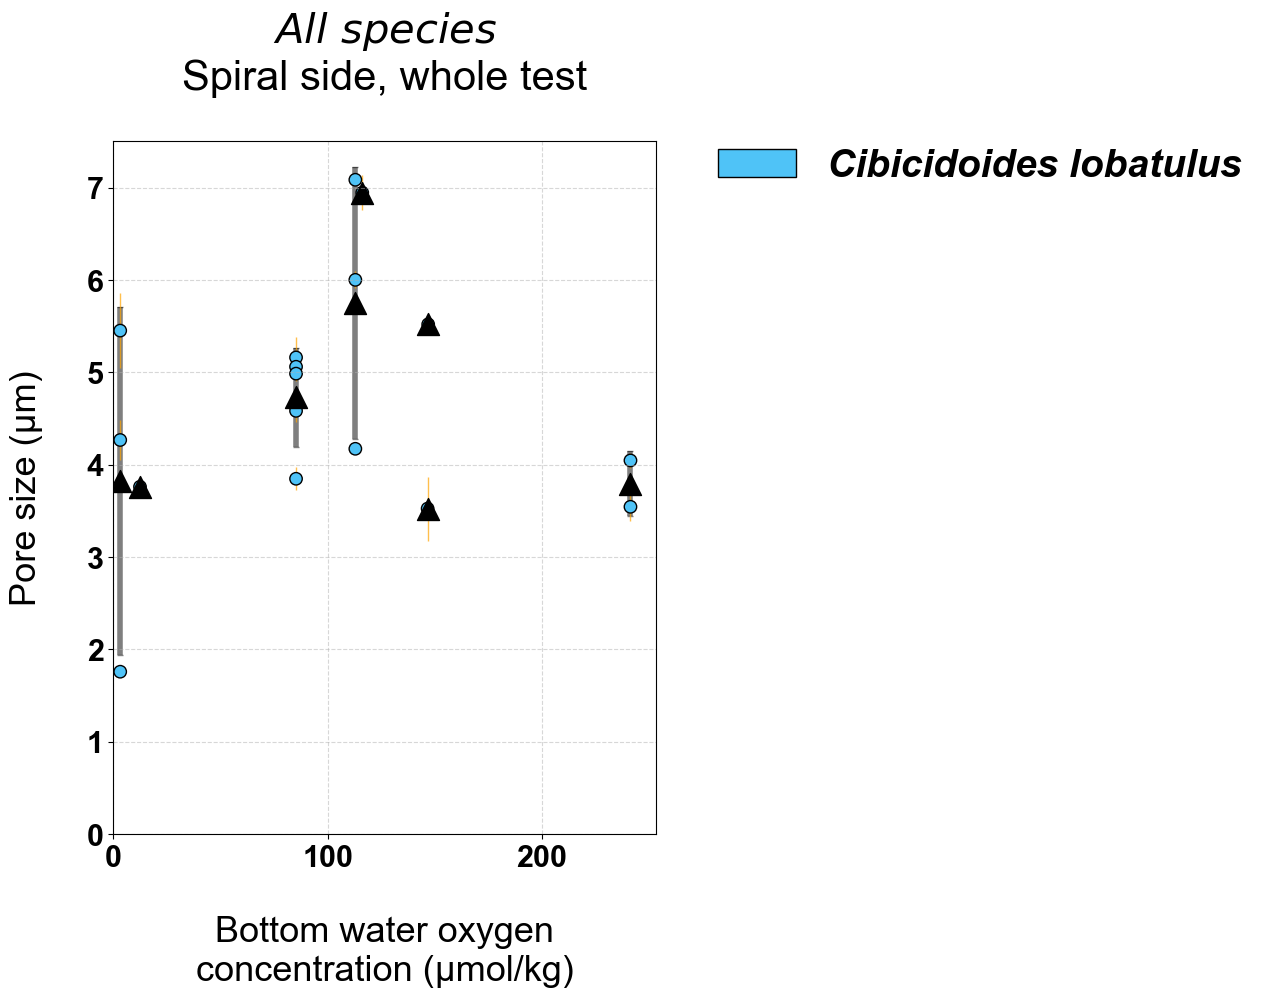

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Create a dictionary mapping each species to a color
species_colors = {
    'Cibicidoides lobatulus': '#4FC3F7',
    'Cibicidoides ungerianus': '#FFD54F',
    'Cibicidoides wuellerstorfi': '#EC407A',
    'Cibicidoides wuellerstorfi forma plana': '#B98AB6',
    'Cibicidoides wuellerstorfi forma convexa': '#C53FE3',
    'Planulina ariminensis': '#26A69A',
    'Planulina limbata': '#6D4C41',
    'Planulina ornata': '#AB47BC'
}

# Define the unique species values
unique_species = subset_dorsal_whole_test['Species'].unique()

# Define a color palette with five colors
color_palette = sns.color_palette('Set1', n_colors=len(unique_species))

# Get the species values from the dataframe
species = subset_dorsal_whole_test['Species']

# Create a list of colors corresponding to each species value
colors = [species_colors.get(s, 'black') for s in species]

# First dataset with unique values from the 'Sample' column
listofsamples = subset_dorsal_whole_test['Sample'].unique()

x = subset_dorsal_whole_test['DIVA oxygen']
y = subset_dorsal_whole_test['DIAMETER AVERAGE']
yerror = subset_dorsal_whole_test['DIAMETER DEV STD']

porosity_avg = subset_dorsal_whole_test.groupby('Sample')['DIAMETER AVERAGE'].mean().reset_index()
porosity_std = subset_dorsal_whole_test.groupby('Sample')['DIAMETER AVERAGE'].std().reset_index()
o2_avg = subset_dorsal_whole_test.groupby('Sample')['DIVA oxygen'].mean().reset_index()

a = o2_avg['DIVA oxygen'].to_numpy()  # Convert to numpy array
b = porosity_avg['DIAMETER AVERAGE'].to_numpy()  # Convert to numpy array
error_y = porosity_std['DIAMETER AVERAGE'].to_numpy()  # Convert to numpy array

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate weights with added epsilon to avoid division by zero for individual data points
weights_individual = 1 / (yerror ** 2 + epsilon)

# Replace any NaN or infinite values in the data arrays with zeros for individual data points
x = np.nan_to_num(x)
y = np.nan_to_num(y)
weights_individual = np.nan_to_num(weights_individual)

# Add a constant to the independent variable (if needed) for individual data points
X_individual = sm.add_constant(x)

# Perform WLS regression for individual data points
model_individual = sm.WLS(y, X_individual, weights=weights_individual, missing='drop')
results_individual = model_individual.fit()

# Get regression summary for individual data points
print("WLS Regression for Individual Data Points:")
print(results_individual.summary())

# Predicted values from the first WLS regression
predicted_values_individual = results_individual.predict(X_individual)

# Calculate RMSE
rmse_individual = np.sqrt(mean_squared_error(x, predicted_values_individual))
print("RMSE for WLS regression for individual data points:", rmse_individual)

# Define generic column names for coefficients
column_names = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_individual.shape[1])]

# Perform Monte Carlo by resampling residuals
num_simulations = 1000  # Number of Monte Carlo simulations
simulated_coefficients = []
simulated_rmse_values = []  # List to store RMSE values
prediction_intervals = []  # List to store prediction intervals

for _ in range(num_simulations):
    # Generate random residuals with the same distribution
    simulated_residuals = np.random.normal(0, np.std(results_individual.resid), len(results_individual.resid))
    simulated_y = results_individual.fittedvalues + simulated_residuals

    # Fit the WLS model to the simulated data
    simulated_model = sm.WLS(simulated_y, X_individual, weights=weights_individual, missing='drop')
    simulated_results = simulated_model.fit()

    # Store the coefficients for each simulation
    simulated_coefficients.append(simulated_results.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values = np.dot(X_individual, simulated_results.params)
    rmse = np.sqrt(mean_squared_error(x, simulated_predicted_values))
    simulated_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval = 1.96 * np.std(simulated_residuals)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients
confidence_intervals = np.percentile(simulated_coefficients, [2.5, 97.5], axis=0)
print("Monte Carlo Confidence Intervals for Coefficients:")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {confidence_intervals[0][i]} - {confidence_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse = np.mean(simulated_rmse_values)
std_rmse = np.std(simulated_rmse_values)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse}")

# Calculate and print prediction intervals
mean_prediction_interval = np.mean(prediction_intervals)
std_prediction_interval = np.std(prediction_intervals)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval}")

# Perform bootstrapping for the first WLS regression for individual data points
num_bootstraps = 1000  # Number of bootstraps
bootstrap_coefficients = []
bootstrap_rmse_values = []  # List to store RMSE values
bootstrap_prediction_intervals = []  # List to store prediction intervals

for _ in range(num_bootstraps):
    # Resample data with replacement
    indices = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample = x[indices]
    bootstrap_y_sample = y[indices]
    bootstrap_weights_sample = weights_individual[indices]
    X_bootstrap_sample = sm.add_constant(bootstrap_x_sample)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model = sm.WLS(bootstrap_y_sample, X_bootstrap_sample, weights=bootstrap_weights_sample, missing='drop')
    bootstrap_results = bootstrap_model.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients.append(bootstrap_results.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values = np.dot(X_bootstrap_sample, bootstrap_results.params)
    rmse = np.sqrt(mean_squared_error(bootstrap_x_sample, bootstrap_predicted_values))
    bootstrap_rmse_values.append(rmse)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals = bootstrap_y_sample - bootstrap_predicted_values
    prediction_interval = 1.96 * np.std(bootstrap_residuals)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals.append(prediction_interval)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals = np.percentile(bootstrap_coefficients, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (First Regression):")
for i, coefficient_name in enumerate(column_names):
    print(f"{coefficient_name}: {bootstrap_intervals[0][i]} - {bootstrap_intervals[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse = np.mean(bootstrap_rmse_values)
std_bootstrap_rmse = np.std(bootstrap_rmse_values)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval = np.mean(bootstrap_prediction_intervals)
std_bootstrap_prediction_interval = np.std(bootstrap_prediction_intervals)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval}")

# Small constant to avoid division by zero
epsilon = 1e-6

# Calculate the sample size (number of specimens) for each site
sample_sizes = subset_dorsal_whole_test.groupby('Sample')['Species'].count().reset_index()

# Calculate the inverse of sample sizes to use as weights for mean values
weights_mean = 1 / (sample_sizes['Species'] + epsilon)  # Use epsilon to avoid division by zero

# Replace any NaN or infinite values in the data arrays with zeros for mean values
a = np.nan_to_num(a)
b = np.nan_to_num(b)
weights_mean = np.nan_to_num(weights_mean)

# Add a constant to the independent variable (if needed) for mean values
X_mean = sm.add_constant(a)

# Perform WLS regression for mean values with sample size-based weights
model_mean_weighted = sm.WLS(b, X_mean, weights=weights_mean, missing='drop')
results_mean_weighted = model_mean_weighted.fit()

# Get regression summary for mean values with sample size-based weights
print("\nLinear WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_mean_weighted.summary())

# Predicted values from the second WLS regression
predicted_values_mean_weighted = results_mean_weighted.predict(X_mean)

# Calculate RMSE for mean values with sample size-based weights
rmse_mean_weighted = np.sqrt(mean_squared_error(a, predicted_values_mean_weighted))
print("RMSE for WLS regression for mean values with sample size-based weights:", rmse_mean_weighted)

# Define generic column names for coefficients
column_names_mean = ['Intercept'] + [f'Coefficient_{i}' for i in range(1, X_mean.shape[1])]

# Perform Monte Carlo by resampling residuals for mean values
num_simulations_mean = 1000  # Number of Monte Carlo simulations for mean values
simulated_coefficients_mean = []
simulated_rmse_values_mean = []  # List to store RMSE values for mean values
prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_simulations_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_mean = np.random.normal(0, np.std(results_mean_weighted.resid), len(results_mean_weighted.resid))
    simulated_b = results_mean_weighted.fittedvalues + simulated_residuals_mean

    # Fit the WLS model to the simulated data for mean values
    simulated_model_mean = sm.WLS(simulated_b, X_mean, weights=weights_mean, missing='drop')
    simulated_results_mean = simulated_model_mean.fit()

    # Store the coefficients for each simulation for mean values
    simulated_coefficients_mean.append(simulated_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    simulated_predicted_values_mean = np.dot(X_mean, simulated_results_mean.params)
    rmse_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_mean))
    simulated_rmse_values_mean.append(rmse_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    prediction_interval_mean = 1.96 * np.std(simulated_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_mean.append(prediction_interval_mean)

# Calculate and print confidence intervals for coefficients for mean values
confidence_intervals_mean = np.percentile(simulated_coefficients_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {confidence_intervals_mean[0][i]} - {confidence_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values for mean values
mean_rmse_mean = np.mean(simulated_rmse_values_mean)
std_rmse_mean = np.std(simulated_rmse_values_mean)
print(f"Mean RMSE across Monte Carlo runs (Mean Values): {mean_rmse_mean}")
print(f"Std RMSE across Monte Carlo runs (Mean Values): {std_rmse_mean}")

# Calculate and print prediction intervals for mean values
mean_prediction_interval_mean = np.mean(prediction_intervals_mean)
std_prediction_interval_mean = np.std(prediction_intervals_mean)
print(f"Mean Prediction Interval across Monte Carlo runs (Mean Values): {mean_prediction_interval_mean}")
print(f"Std Prediction Interval across Monte Carlo runs (Mean Values): {std_prediction_interval_mean}")

# Perform bootstrapping for the second WLS regression for mean values
num_bootstraps_mean = 1000  # Number of bootstraps for mean values
bootstrap_coefficients_mean = []
bootstrap_rmse_values_mean = []  # List to store RMSE values for mean values
bootstrap_prediction_intervals_mean = []  # List to store prediction intervals for mean values

for _ in range(num_bootstraps_mean):
    # Resample data with replacement for mean values
    indices_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample = a[indices_mean]
    bootstrap_b_sample = b[indices_mean]
    bootstrap_weights_sample_mean = weights_mean[indices_mean]
    X_bootstrap_sample_mean = sm.add_constant(bootstrap_a_sample)

    # Fit the WLS model to the bootstrapped data for mean values
    bootstrap_model_mean = sm.WLS(bootstrap_b_sample, X_bootstrap_sample_mean, weights=bootstrap_weights_sample_mean, missing='drop')
    bootstrap_results_mean = bootstrap_model_mean.fit()

    # Store the coefficients for each bootstrap sample for mean values
    bootstrap_coefficients_mean.append(bootstrap_results_mean.params)

    # Calculate RMSE for the predicted values for mean values
    bootstrap_predicted_values_mean = np.dot(X_bootstrap_sample_mean, bootstrap_results_mean.params)
    rmse_mean_bootstrap = np.sqrt(mean_squared_error(bootstrap_a_sample, bootstrap_predicted_values_mean))
    bootstrap_rmse_values_mean.append(rmse_mean_bootstrap)

    # Calculate prediction intervals (e.g., 95% prediction intervals) for mean values
    # You can adjust the confidence level as needed
    bootstrap_residuals_mean = bootstrap_b_sample - bootstrap_predicted_values_mean
    prediction_interval_mean_bootstrap = 1.96 * np.std(bootstrap_residuals_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_mean.append(prediction_interval_mean_bootstrap)

# Calculate and print confidence intervals for coefficients for the second regression for mean values
bootstrap_intervals_mean = np.percentile(bootstrap_coefficients_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Second Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_mean[0][i]} - {bootstrap_intervals_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping for mean values
mean_bootstrap_rmse_mean = np.mean(bootstrap_rmse_values_mean)
std_bootstrap_rmse_mean = np.std(bootstrap_rmse_values_mean)
print(f"Mean RMSE across bootstraps (Mean Values): {mean_bootstrap_rmse_mean}")
print(f"Std RMSE across bootstraps (Mean Values): {std_bootstrap_rmse_mean}")

# Calculate and print prediction intervals for bootstrapping for mean values
mean_bootstrap_prediction_interval_mean = np.mean(bootstrap_prediction_intervals_mean)
std_bootstrap_prediction_interval_mean = np.std(bootstrap_prediction_intervals_mean)
print(f"Mean Prediction Interval across bootstraps (Mean Values): {mean_bootstrap_prediction_interval_mean}")
print(f"Std Prediction Interval across bootstraps (Mean Values): {std_bootstrap_prediction_interval_mean}")

# Define the logarithmic function for the regression model
def logarithmic_model(x, params):
    a, b = params
    return a * np.log(x) + b

# Fit the logarithmic model using WLS for individual data points
log_y = np.log(np.maximum(y, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_individual = np.nan_to_num(weights_individual)
log_weights_individual[log_y == -np.inf] = 0  # Set weights to zero for invalid values
log_X_individual = sm.add_constant(x)
results_log_individual = sm.WLS(log_y, log_X_individual, weights=log_weights_individual, missing='drop').fit()

# Get regression summary for individual data points
print("\nWLS Logarithmic Regression for Individual Data Points:")
print(results_log_individual.summary())

# Predicted values from the first logarithmic regression
predicted_values_log_individual = results_log_individual.predict(log_X_individual)

# Calculate RMSE
rmse_log_individual = np.sqrt(mean_squared_error(x, np.exp(predicted_values_log_individual)))
print("RMSE for logarithmic regression for individual data points:", rmse_log_individual)

# Define generic column names for coefficients
column_names_log = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log = []
simulated_rmse_values_log = []  # List to store RMSE values
prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_simulations_log):
    # Generate random residuals with the same distribution
    simulated_residuals_log = np.random.normal(0, np.std(results_log_individual.resid), len(results_log_individual.resid))
    simulated_log_y = results_log_individual.fittedvalues + simulated_residuals_log

    # Fit the WLS model to the simulated data
    simulated_model_log = sm.WLS(simulated_log_y, log_X_individual, weights=log_weights_individual, missing='drop')
    simulated_results_log = simulated_model_log.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log.append(simulated_results_log.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log = np.exp(simulated_results_log.predict(log_X_individual))
    rmse_log = np.sqrt(mean_squared_error(x, simulated_predicted_values_log))
    simulated_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log = 1.96 * np.std(simulated_residuals_log)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log = np.percentile(simulated_coefficients_log, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {confidence_intervals_log[0][i]} - {confidence_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log = np.mean(simulated_rmse_values_log)
std_rmse_log = np.std(simulated_rmse_values_log)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log}")

# Calculate and print prediction intervals
mean_prediction_interval_log = np.mean(prediction_intervals_log)
std_prediction_interval_log = np.std(prediction_intervals_log)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log}")

# Perform bootstrapping for the first WLS logarithmic regression for individual data points
num_bootstraps_log = 1000  # Number of bootstraps
bootstrap_coefficients_log = []
bootstrap_rmse_values_log = []  # List to store RMSE values
bootstrap_prediction_intervals_log = []  # List to store prediction intervals

for _ in range(num_bootstraps_log):
    # Resample data with replacement
    indices_log = np.random.choice(len(x), len(x), replace=True)
    bootstrap_x_sample_log = x[indices_log]
    bootstrap_y_sample_log = y[indices_log]
    bootstrap_weights_sample_log = log_weights_individual[indices_log]
    X_bootstrap_sample_log = sm.add_constant(bootstrap_x_sample_log)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log = sm.WLS(bootstrap_y_sample_log, X_bootstrap_sample_log, weights=bootstrap_weights_sample_log, missing='drop')
    bootstrap_results_log = bootstrap_model_log.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log.append(bootstrap_results_log.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log = np.exp(bootstrap_results_log.predict(X_bootstrap_sample_log))
    rmse_log = np.sqrt(mean_squared_error(bootstrap_x_sample_log, bootstrap_predicted_values_log))
    bootstrap_rmse_values_log.append(rmse_log)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log = bootstrap_y_sample_log - bootstrap_predicted_values_log
    prediction_interval_log = 1.96 * np.std(bootstrap_residuals_log)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log.append(prediction_interval_log)

# Calculate and print confidence intervals for coefficients for the first regression
bootstrap_intervals_log = np.percentile(bootstrap_coefficients_log, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - First Regression):")
for i, coefficient_name in enumerate(column_names_log):
    print(f"{coefficient_name}: {bootstrap_intervals_log[0][i]} - {bootstrap_intervals_log[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log = np.mean(bootstrap_rmse_values_log)
std_bootstrap_rmse_log = np.std(bootstrap_rmse_values_log)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log = np.mean(bootstrap_prediction_intervals_log)
std_bootstrap_prediction_interval_log = np.std(bootstrap_prediction_intervals_log)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log}")

# Fit the logarithmic model using WLS for mean values with sample size-based weights
log_b = np.log(np.maximum(b, 1e-6))  # Add a small constant to avoid zero/negative values before taking the logarithm
log_weights_mean = np.nan_to_num(weights_mean)
log_weights_mean[log_b == -np.inf] = 0  # Set weights to zero for invalid values
log_X_mean = sm.add_constant(a)
results_log_mean_weighted = sm.WLS(log_b, log_X_mean, weights=log_weights_mean, missing='drop').fit()

# Get regression summary for mean values with sample size-based weights
print("\nLogarithmic WLS Regression for Mean Values (Sample Size-Based Weights):")
print(results_log_mean_weighted.summary())

# Predicted values from the logarithmic regression
predicted_values_log_mean_weighted = results_log_mean_weighted.predict(log_X_mean)

# Calculate RMSE
rmse_log_mean_weighted = np.sqrt(mean_squared_error(a, np.exp(predicted_values_log_mean_weighted)))
print("RMSE for logarithmic regression for mean values with sample size-based weights:", rmse_log_mean_weighted)

# Define generic column names for coefficients
column_names_log_mean = ['Intercept', 'Coefficient_1']

# Perform Monte Carlo by resampling residuals
num_simulations_log_mean = 1000  # Number of Monte Carlo simulations
simulated_coefficients_log_mean = []
simulated_rmse_values_log_mean = []  # List to store RMSE values
prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_simulations_log_mean):
    # Generate random residuals with the same distribution
    simulated_residuals_log_mean = np.random.normal(0, np.std(results_log_mean_weighted.resid), len(results_log_mean_weighted.resid))
    simulated_log_b = results_log_mean_weighted.fittedvalues + simulated_residuals_log_mean

    # Fit the WLS model to the simulated data
    simulated_model_log_mean = sm.WLS(simulated_log_b, log_X_mean, weights=log_weights_mean, missing='drop')
    simulated_results_log_mean = simulated_model_log_mean.fit()

    # Store the coefficients for each simulation
    simulated_coefficients_log_mean.append(simulated_results_log_mean.params)

    # Calculate RMSE for the predicted values
    simulated_predicted_values_log_mean = np.exp(simulated_results_log_mean.predict(log_X_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(a, simulated_predicted_values_log_mean))
    simulated_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    prediction_interval_log_mean = 1.96 * np.std(simulated_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients
confidence_intervals_log_mean = np.percentile(simulated_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nMonte Carlo Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {confidence_intervals_log_mean[0][i]} - {confidence_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values
mean_rmse_log_mean = np.mean(simulated_rmse_values_log_mean)
std_rmse_log_mean = np.std(simulated_rmse_values_log_mean)
print(f"Mean RMSE across Monte Carlo runs: {mean_rmse_log_mean}")
print(f"Std RMSE across Monte Carlo runs: {std_rmse_log_mean}")

# Calculate and print prediction intervals
mean_prediction_interval_log_mean = np.mean(prediction_intervals_log_mean)
std_prediction_interval_log_mean = np.std(prediction_intervals_log_mean)
print(f"Mean Prediction Interval across Monte Carlo runs: {mean_prediction_interval_log_mean}")
print(f"Std Prediction Interval across Monte Carlo runs: {std_prediction_interval_log_mean}")

# Perform bootstrapping for the logarithmic regression for mean values with sample size-based weights
num_bootstraps_log_mean = 1000  # Number of bootstraps
bootstrap_coefficients_log_mean = []
bootstrap_rmse_values_log_mean = []  # List to store RMSE values
bootstrap_prediction_intervals_log_mean = []  # List to store prediction intervals

for _ in range(num_bootstraps_log_mean):
    # Resample data with replacement
    indices_log_mean = np.random.choice(len(a), len(a), replace=True)
    bootstrap_a_sample_log_mean = a[indices_log_mean]
    bootstrap_b_sample_log_mean = b[indices_log_mean]
    bootstrap_weights_sample_log_mean = log_weights_mean[indices_log_mean]
    X_bootstrap_sample_log_mean = sm.add_constant(bootstrap_a_sample_log_mean)

    # Fit the WLS model to the bootstrapped data
    bootstrap_model_log_mean = sm.WLS(bootstrap_b_sample_log_mean, X_bootstrap_sample_log_mean, weights=bootstrap_weights_sample_log_mean, missing='drop')
    bootstrap_results_log_mean = bootstrap_model_log_mean.fit()

    # Store the coefficients for each bootstrap sample
    bootstrap_coefficients_log_mean.append(bootstrap_results_log_mean.params)

    # Calculate RMSE for the predicted values
    bootstrap_predicted_values_log_mean = np.exp(bootstrap_results_log_mean.predict(X_bootstrap_sample_log_mean))
    rmse_log_mean = np.sqrt(mean_squared_error(bootstrap_a_sample_log_mean, bootstrap_predicted_values_log_mean))
    bootstrap_rmse_values_log_mean.append(rmse_log_mean)

    # Calculate prediction intervals (e.g., 95% prediction intervals)
    # You can adjust the confidence level as needed
    bootstrap_residuals_log_mean = bootstrap_b_sample_log_mean - bootstrap_predicted_values_log_mean
    prediction_interval_log_mean = 1.96 * np.std(bootstrap_residuals_log_mean)  # 1.96 corresponds to a 95% confidence level
    bootstrap_prediction_intervals_log_mean.append(prediction_interval_log_mean)

# Calculate and print confidence intervals for coefficients for the bootstrapped regression
bootstrap_intervals_log_mean = np.percentile(bootstrap_coefficients_log_mean, [2.5, 97.5], axis=0)
print("\nBootstrapping Confidence Intervals for Coefficients (Logarithmic Regression - Mean Values):")
for i, coefficient_name in enumerate(column_names_log_mean):
    print(f"{coefficient_name}: {bootstrap_intervals_log_mean[0][i]} - {bootstrap_intervals_log_mean[1][i]}")

# Calculate and print summary statistics for RMSE values in bootstrapping
mean_bootstrap_rmse_log_mean = np.mean(bootstrap_rmse_values_log_mean)
std_bootstrap_rmse_log_mean = np.std(bootstrap_rmse_values_log_mean)
print(f"Mean RMSE across bootstraps: {mean_bootstrap_rmse_log_mean}")
print(f"Std RMSE across bootstraps: {std_bootstrap_rmse_log_mean}")

# Calculate and print prediction intervals for bootstrapping
mean_bootstrap_prediction_interval_log_mean = np.mean(bootstrap_prediction_intervals_log_mean)
std_bootstrap_prediction_interval_log_mean = np.std(bootstrap_prediction_intervals_log_mean)
print(f"Mean Prediction Interval across bootstraps: {mean_bootstrap_prediction_interval_log_mean}")
print(f"Std Prediction Interval across bootstraps: {std_bootstrap_prediction_interval_log_mean}")

# Plotting the scatter plot
fig, ax = plt.subplots(figsize=(7, 9))
ax.scatter(x, y, c=colors, s=80, alpha=1, marker='o', label="Individual measurement", zorder=0, edgecolors='black', linewidths=1)
ax.errorbar(x, y, yerr=yerror, fmt='none', color='orange', alpha=0.7, capsize=0, zorder=-1, linewidth=1, label="Porosity dev. std.")
ax.scatter(a, b, color='black', s=250, alpha=1, marker='^', label="Mean by site", zorder=1)  # Customize marker color, transparency, and edge color
ax.errorbar(a, b, yerr=error_y, fmt='none', color='black', alpha=0.5, capsize=2, zorder=-5, linewidth=4, label="Porosity dev. std.")

# Add error bars on the y-axis
#ax.set_ylim(0, 42)
ax.set_xlabel('\nBottom water oxygen\nconcentration (µmol/kg)', fontsize=26, fontname='Arial')
ax.set_ylabel('Pore size (µm)\n', fontsize=26, fontname='Arial')
ax.set_title(r'$\mathit{All\ species}$' + '\nSpiral side, whole test\n', fontsize=30, fontname='Arial')

# Customize tick label font size
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)

# Change tick label font to Arial
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontname('Arial')
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontname('Arial')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5, zorder=-5)

# Create color-coded patches (circles) with italic labels for the legend
legend_patches = [mpatches.Circle((0.5, 0.5), radius=0.25, facecolor=species_colors[species], edgecolor='black') for species in unique_species]
legend_labels = [f"{species}" for species in unique_species]

# Customize legend patches and labels
for patch in legend_patches:
    patch.set_label('')  # Clear default label
    patch.set_facecolor(patch.get_facecolor())
    patch.set_edgecolor(patch.get_edgecolor())

# Add legend with color-coded labels in italic
ax.legend(handles=legend_patches, labels=legend_labels, bbox_to_anchor=(1.05, 1.04), loc='upper left', frameon=False, prop={'family': 'Arial', 'size': 28, 'style': 'italic'})

ax.set_xlim(left=0)  # Set the left limit of the x-axis to 0
ax.set_ylim(bottom=-0.001)  # Set the bottom limit of the y-axis to 0

save_path = f"Datasets/Created Figures/Pore size {species_name} All chamers Spiral.jpg"
plt.savefig(save_path, dpi=999, bbox_inches='tight')

plt.show()

# Principal Component Analysis

In [55]:
import numpy as np
import pandas as pd

# Define the mapping of subset names to their titles and filenames
filenames_and_titles = {
    "ventral_penultimate_antepenultimate": ("umbilical penultimate and antepenultimate chambers", filename_ventral_penultimate_antepenultimate),
    "ventral_whole_test": ("umbilical whole test", filename_ventral_whole_test),
    "dorsal_penultimate_antepenultimate": ("spiral penultimate and antepenultimate chambers", filename_dorsal_penultimate_antepenultimate),
    "dorsal_whole_test": ("spiral whole test", filename_dorsal_whole_test)
}

# Ensure columns_to_include is defined with correct column names from your dataset
columns_to_include = [
    'POROSITY AVERAGE', 'PORE DENSITY AVERAGE', 'DIAMETER AVERAGE', 'Water depth (m)',
    'DIVA oxygen', 'Temp', 'Salinity', 'pH', 'NO3', 'SeaWiFS Updated CbPM'
]

abbreviations = ['Porosity', 'Pore density', 'Pore size', 'Water depth', 'BW Oxygen', 'BW Temperature', 'BW Salinity', 'BW pH', 'BW Nitrate', 'Net primary productivity']

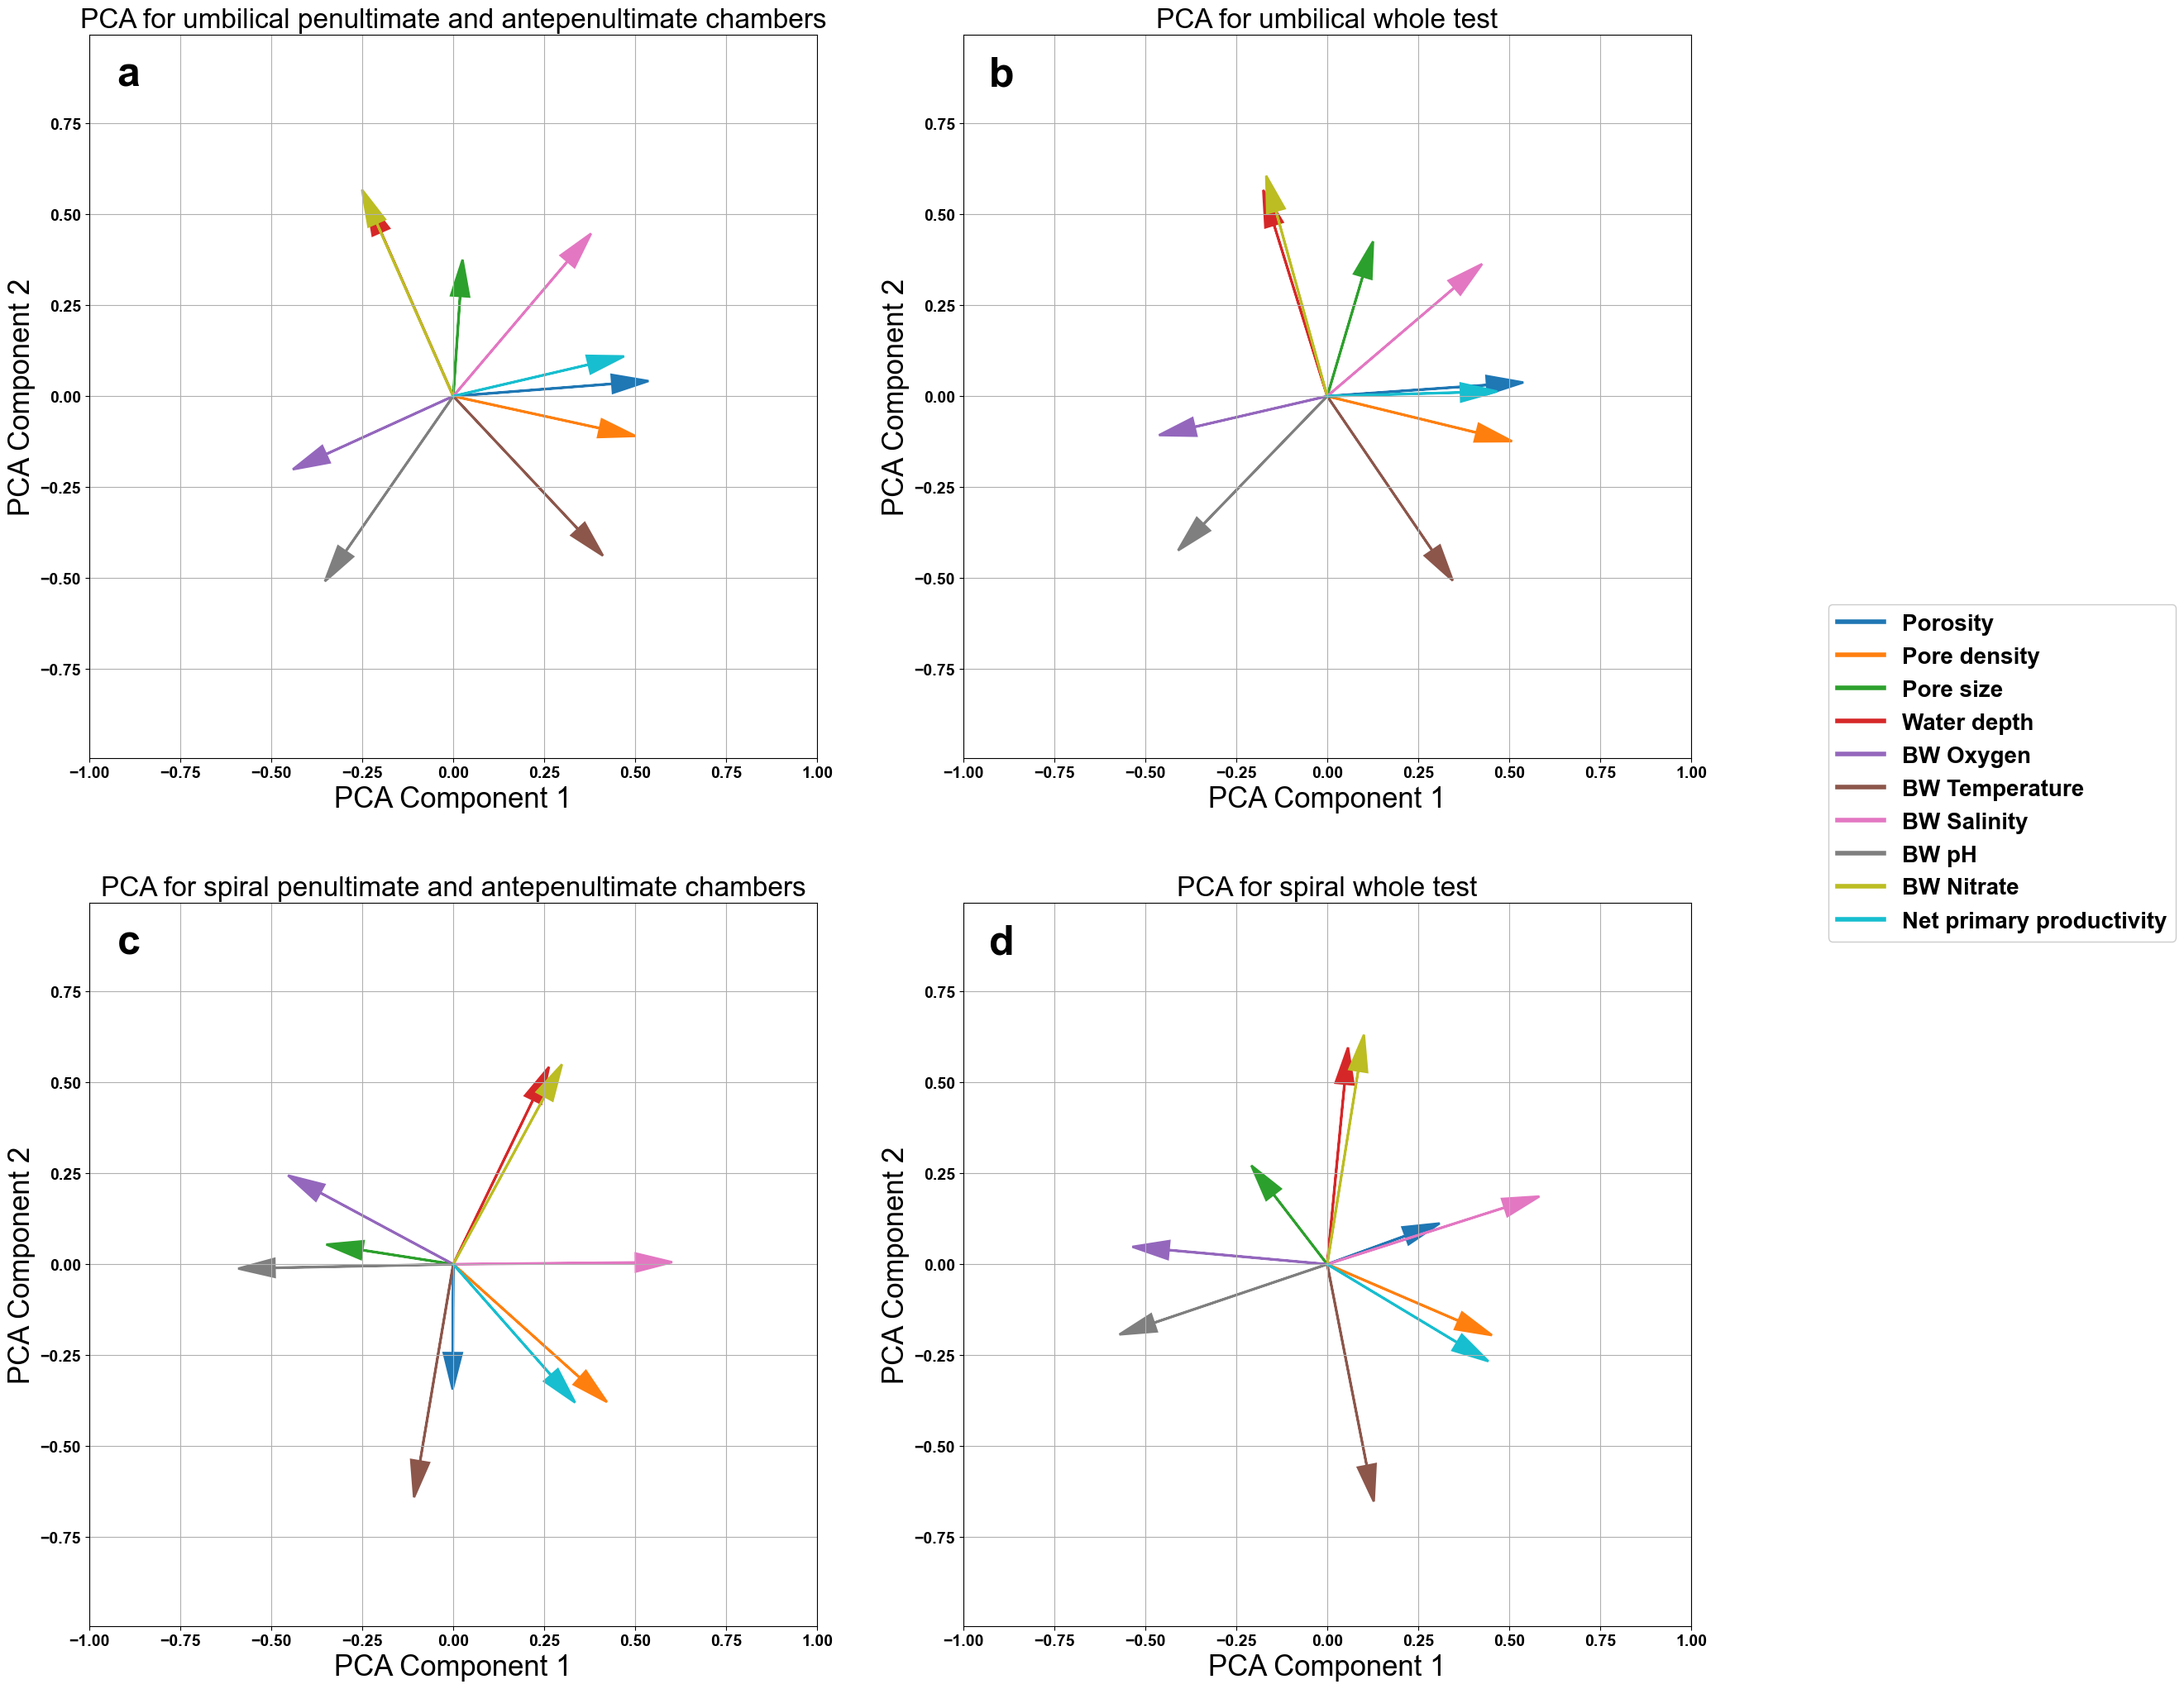

In [56]:
#let's create the PCA plots

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D  # Import for custom legend

# Set global parameters for matplotlib
plt.rcParams.update({
    'font.size': 14,
    'font.family': 'Arial',
    'font.weight': 'bold'
})

def perform_pca_and_plot_with_vectors_on_subplot(ax, subset_df, subset_name, species_name, abbreviations, colors, letter):
    # Standardizing the data
    scaler = StandardScaler()
    subset_standardized = scaler.fit_transform(subset_df[abbreviations])

    # Performing PCA analysis
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(subset_standardized)

    # Adding eigenvectors to the plot with colors
    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, color=colors[i])

    # Set title, labels, and limits
    ax.set_title(f'PCA for {subset_name}', fontsize=24, fontname='Arial')
    #ax.text(0.5, 1.06, species_name, ha='center', va='center', fontsize=25, fontstyle='italic', fontname='Arial', transform=ax.transAxes)
 
    #ax.text(0.5, 1.06, 'Cibicidids', ha='center',  fontstyle='italic', va='center', fontsize=25, fontname='Arial', transform=ax.transAxes)
    #ax.text(0.35, 1.06, 'Cibicidoides wuellerstorfi', ha='center', fontstyle='italic', va='center', fontsize=25, fontname='Arial', transform=ax.transAxes)
    #ax.text(0.794, 1.06, 'convexa', ha='center', fontstyle='italic', va='center', fontsize=25, fontname='Arial', transform=ax.transAxes, zorder=2)
    # Non-italic part
    # You will need to adjust the x position for "forma" manually to fit between the italic parts
    #ax.text(0.6535, 1.06, ' forma ', ha='center', fontstyle='normal', va='center', fontsize=25, fontname='Arial', transform=ax.transAxes, zorder=1)
    
    ax.set_xlabel('PCA Component 1', fontsize=25)
    ax.set_ylabel('PCA Component 2', fontsize=25)
    ax.axis('equal')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.grid(True)
    ax.text(0.07, 0.97, letter, transform=ax.transAxes, fontsize=36, fontweight='bold', va='top', ha='right')

# Tableau Color Blind 10 color palette
tableau_colorblind10 = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle grayNo 
    '#bcbd22',  # curry yellow-green
    '#17becf'   # blue-teal
]

# Ensure there are enough colors for abbreviations, repeat the palette if necessary
colors = [tableau_colorblind10[i % len(tableau_colorblind10)] for i in range(len(abbreviations))]

# Custom legend items using the colors and abbreviations defined
legend_elements = [Line2D([0], [0], color=colors[i], lw=4, label=abbreviations[i]) for i in range(len(abbreviations))]

# Creating subplots and plots
fig, axs = plt.subplots(2, 2, figsize=(25, 25), dpi=100)
axs = axs.flatten()

letters = ['a', 'b', 'c', 'd']  # Define letters for each subplot
for i, (subset_name, (title, filename)) in enumerate(filenames_and_titles.items()):
    subset_df = pd.read_csv(filename)
    subset_df = subset_df.rename(columns=dict(zip(columns_to_include, abbreviations)))[abbreviations]
    perform_pca_and_plot_with_vectors_on_subplot(axs[i], subset_df, title, species_name, abbreviations, colors, letters[i])

# Adjust layout and add universal legend to the figure
plt.subplots_adjust(wspace=0.2, hspace=0.2)
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.14, 0.61), fontsize=20, framealpha=1.0)

# Save and show plot
filename = f"Datasets/Created Figures/{species_name}_PCA_plots.jpg"
plt.savefig(filename, dpi=1000, format='jpg', bbox_inches='tight')
plt.show()